In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import tree
import graphviz 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import random
import array
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pickle
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer

In [2]:
df_july = pd.read_csv("Data_july.csv",encoding='cp1252')
df_june = pd.read_csv("Data_june.csv",encoding='cp1252') 
df_may = pd.read_csv("Data_may.csv",encoding='cp1252')
df_apr = pd.read_csv("Data_april.csv",encoding='cp1252')
df_march = pd.read_csv("Data_march.csv",encoding='cp1252')
df_feb = pd.read_csv("Data_feb.csv",encoding='cp1252')
df_jan = pd.read_csv("Data_jan.csv",encoding='cp1252')
df_results = pd.read_csv("lab_results.csv",encoding='cp1252')

In [3]:
def get_required_data(x):
    y = x.copy()
    y.drop(['APS FEED','11FC101.PV','Unnamed: 2','Unnamed: 19'], axis=1,inplace = True)
    y.drop(y.index[[0,1,2,3,4,5,6]], inplace=True)
    y.columns = df_july.columns
#     y = y.iloc[:-1,:]
    return y

In [4]:
df_june = get_required_data(df_june)
df_june = df_june.iloc[:-1]
df_may = get_required_data(df_may)
df_may = df_may.iloc[:-1]
df_april = get_required_data(df_apr)
df_april = df_april.iloc[:-1]
df_mar = get_required_data(df_march)
df_mar = df_mar.iloc[:-1]
df_feb = get_required_data(df_feb)
df_feb = df_feb.iloc[:-1]
df_jan = get_required_data(df_jan)
df_jan = df_jan.iloc[:-1]

In [5]:
df_june

,Timestamp,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –
7,01-06-2023,800.57,92.12,1.35,159.25,29.79,5.72,180.24,123.83,1643.98,110.89,32.02,2.8,215.24,192.61,167.84,25.45784195
8,01-06-2023 00:10,799.29,92,1.35,159.51,29.8,5.72,181.33,124.21,1643.87,112.38,31.99,2.91,215.45,193,167.88,25.83010326
9,01-06-2023 00:20,799.17,92.24,1.36,159.34,29.79,5.71,180.91,123.89,1649.99,110.78,32.02,2.8,215.17,192.61,168.01,25.2848222
10,01-06-2023 00:30,799.86,92.03,1.34,159.25,29.8,5.74,179.46,124.05,1647.29,113.49,31.96,2.74,215.18,192.72,167.8,25.58869934
11,01-06-2023 00:40,798.87,92.09,1.33,159.19,29.8,5.71,179.84,123.91,1646.13,112.23,31.73,2.84,214.93,192.43,167.75,25.37388642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4322,30-06-2023 23:10,873.93,105.82,1.65,161.92,34.99,5.74,169.01,122.9,1960.49,130.08,56.03,2.11,216.28,193.38,168.69,25.14661501
4323,30-06-2023 23:20,875.48,105.76,1.65,162.5,34.98,5.8,170.49,122.84,1948.31,126.73,55.9,2.8,216.33,193.77,169.05,25.31727685
4324,30-06-2023 23:30,874.52,105.99,1.65,162.66,34.98,5.82,171.22,123.23,1962.7,128.23,56.09,3.21,216.63,193.96,169.4,25.24658081
4325,30-06-2023 23:40,874.77,106.11,1.65,162.87,34.97,5.82,173.38,123.41,1957.66,125.74,56.13,3.18,217.12,194.24,169.55,25.37568844


In [6]:
concatenated_df = pd.concat([df_jan,df_feb,df_mar,df_april,df_may,df_june,df_july], axis=0)


In [7]:
concatenated_df

,Timestamp,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –
7,01-01-2023,812.01,131.87,1.63,163.97,38.35,5.81,182.23,124.03,2121.2,150.62,58.02,38.01,221.13,192.75,177.05,23.88020626
8,01-01-2023 00:10,810.48,131.73,1.64,164.08,38.36,5.67,181.62,123.79,2120.4,147.83,57.97,37.91,220.77,192.38,177.15,23.40023381
9,01-01-2023 00:20,808.1,131.91,1.66,163.42,38.32,5.7,179.97,123.46,2121.38,142.36,58.04,37.96,220.26,191.88,176.67,23.37696839
10,01-01-2023 00:30,809.95,132.01,1.62,163.89,38.33,5.78,177.46,124.14,2121.42,152.42,58.07,38.05,220.58,192.24,176.45,23.95860086
11,01-01-2023 00:40,808.9,131.79,1.64,164.35,38.33,5.61,179.06,123.99,2122.34,150.98,57.99,38.02,220.45,191.98,176.99,23.20328932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,26-07-2023 23:20,874.0,97.59,1.45,161.18,30.78,5.19,148.84,123.35,1765.5,113.19,40.41,3.47,219.43,195.19,172.22,23.8319
3741,26-07-2023 23:30,875.26,97.54,1.45,161.31,30.78,5.27,148.44,123.24,1764.12,113.69,40.43,3.5,219.3,195.16,172.4,23.626209
3742,26-07-2023 23:40,874.41,97.36,1.45,161.4,30.78,5.28,146.88,123.4,1767.06,114.18,40.4,3.81,219.05,195.14,172.42,23.655673
3743,26-07-2023 23:50,875.14,97.34,1.45,161.35,30.79,5.2,147.22,123.36,1769.28,114.6,40.36,3.7,218.95,195.13,172.3,23.735424


In [8]:
concatenated_df.shape

(30385, 17)

In [9]:
concatenated_df.reset_index(drop = True,inplace = True)

In [10]:
concatenated_df.isna().sum()

Timestamp                                                                   574
TOTAL CRUDE FLOW                                                            574
TOTAL ATF KERO/DHDS FLOW                                                    574
APS Overhead Pressure                                                       574
FBS D/O TEMP                                                                574
CRUDE API AT 15 DEGC                                                        574
ATF- TOP SECTION PDT                                                        574
11-T-1 REFLUX FLOW                                                          574
 APS O/H TEMP                                                               574
ATF STRIPPING STEAM                                                         574
Nphtha Total flow                                                           574
FBS TOTAL FLOW                                                              574
TPA TO ATF STRIPPER FLOW                

In [11]:
concatenated_df.dropna(inplace = True)

In [12]:
concatenated_df

,Timestamp,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –
0,01-01-2023,812.01,131.87,1.63,163.97,38.35,5.81,182.23,124.03,2121.2,150.62,58.02,38.01,221.13,192.75,177.05,23.88020626
1,01-01-2023 00:10,810.48,131.73,1.64,164.08,38.36,5.67,181.62,123.79,2120.4,147.83,57.97,37.91,220.77,192.38,177.15,23.40023381
2,01-01-2023 00:20,808.1,131.91,1.66,163.42,38.32,5.7,179.97,123.46,2121.38,142.36,58.04,37.96,220.26,191.88,176.67,23.37696839
3,01-01-2023 00:30,809.95,132.01,1.62,163.89,38.33,5.78,177.46,124.14,2121.42,152.42,58.07,38.05,220.58,192.24,176.45,23.95860086
4,01-01-2023 00:40,808.9,131.79,1.64,164.35,38.33,5.61,179.06,123.99,2122.34,150.98,57.99,38.02,220.45,191.98,176.99,23.20328932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30380,26-07-2023 23:20,874.0,97.59,1.45,161.18,30.78,5.19,148.84,123.35,1765.5,113.19,40.41,3.47,219.43,195.19,172.22,23.8319
30381,26-07-2023 23:30,875.26,97.54,1.45,161.31,30.78,5.27,148.44,123.24,1764.12,113.69,40.43,3.5,219.3,195.16,172.4,23.626209
30382,26-07-2023 23:40,874.41,97.36,1.45,161.4,30.78,5.28,146.88,123.4,1767.06,114.18,40.4,3.81,219.05,195.14,172.42,23.655673
30383,26-07-2023 23:50,875.14,97.34,1.45,161.35,30.79,5.2,147.22,123.36,1769.28,114.6,40.36,3.7,218.95,195.13,172.3,23.735424


In [13]:
concatenated_df.shape

(29811, 17)

In [14]:
concatenated_df.reset_index(drop = True,inplace = True)

In [15]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29811 entries, 0 to 29810
Data columns (total 17 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   Timestamp                                                                 29811 non-null  object
 1   TOTAL CRUDE FLOW                                                          29811 non-null  object
 2   TOTAL ATF KERO/DHDS FLOW                                                  29811 non-null  object
 3   APS Overhead Pressure                                                     29811 non-null  object
 4   FBS D/O TEMP                                                              29811 non-null  object
 5   CRUDE API AT 15 DEGC                                                      29811 non-null  object
 6   ATF- TOP SECTION PDT                                                  

In [16]:
df_results

,Sampled Date,Result Value
0,01-01-2023 07:00,39.0
1,01-01-2023 17:00,41.5
2,02-01-2023 07:00,38.0
3,02-01-2023 17:00,38.5
4,03-01-2023 07:00,39.0
...,...,...
434,24-07-2023 17:00,39.0
435,25-07-2023 07:00,40.0
436,25-07-2023 17:00,39.0
437,26-07-2023 07:00,39.5


In [17]:

new_column_names = {'Sampled Date': 'Timestamp'}
df_results.rename(columns=new_column_names, inplace=True)


In [18]:
df_results

,Timestamp,Result Value
0,01-01-2023 07:00,39.0
1,01-01-2023 17:00,41.5
2,02-01-2023 07:00,38.0
3,02-01-2023 17:00,38.5
4,03-01-2023 07:00,39.0
...,...,...
434,24-07-2023 17:00,39.0
435,25-07-2023 07:00,40.0
436,25-07-2023 17:00,39.0
437,26-07-2023 07:00,39.5


In [19]:
merged_df = pd.merge(concatenated_df, df_results, on='Timestamp')


In [20]:
merged_df.iloc[[250]]

,Timestamp,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –,Result Value
250,03-05-2023 17:00,799.73,135.76,1.78,161.69,38.36,5.84,202.51,120.67,2138.9,131.6,59.97,28,220.83,194.62,177.12,22.90571597,38.5


In [21]:
merged_df

,Timestamp,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –,Result Value
0,01-01-2023 07:00,812.32,131.95,1.66,164.26,38.3,5.82,188.13,123.7,2133.27,143.44,57.89,38.01,220.52,192.96,177.03,23.86903448,39.0
1,01-01-2023 17:00,811.88,132.23,1.65,163.36,38.41,5.73,183.09,123.29,2225.82,143.5,57.93,37.98,219.87,191.51,175.65,24.0057521,41.5
2,02-01-2023 07:00,807.45,131.99,1.64,163.31,38.34,5.7,179.98,123.19,2207.5,145.54,57.99,38.04,219.35,191.37,175.64,23.79393818,38.0
3,02-01-2023 17:00,800.78,134.09,1.63,164.36,38.49,6.03,187.31,124.29,2271.21,146.6,58.54,38.01,222.32,193.59,176.55,25.18398762,38.5
4,03-01-2023 07:00,811.73,133.98,1.63,162.91,38.41,5.85,176.66,123.89,2289.31,148.37,56.95,38,220.24,190.97,173.85,25.42168682,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,24-07-2023 17:00,873.93,110.22,1.5,160.69,33.51,5.58,171.22,122.81,1563.09,124.37,47.12,3.38,220.86,194.62,173.03,22.394674,39.0
424,25-07-2023 07:00,875.07,94.07,1.4,159.79,32.48,5.56,155.03,122.9,1545.17,119.34,43.1,3.39,214.72,191.49,168.74,23.587139,40.0
425,25-07-2023 17:00,875.58,100.27,1.4,158.46,31.56,5.32,155.82,123.04,1535.01,118.06,34.92,3.29,216.8,192.37,170.28,22.891583,39.0
426,26-07-2023 07:00,876.73,97.97,1.4,158.44,31.79,5.55,166.03,123.4,1757.03,115.03,34.02,3.14,217.25,191.9,167.37,25.342483,39.5


In [22]:
merged_df.dtypes

Timestamp                                                                    object
TOTAL CRUDE FLOW                                                             object
TOTAL ATF KERO/DHDS FLOW                                                     object
APS Overhead Pressure                                                        object
FBS D/O TEMP                                                                 object
CRUDE API AT 15 DEGC                                                         object
ATF- TOP SECTION PDT                                                         object
11-T-1 REFLUX FLOW                                                           object
 APS O/H TEMP                                                                object
ATF STRIPPING STEAM                                                          object
Nphtha Total flow                                                            object
FBS TOTAL FLOW                                                              

In [23]:
merged_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
423    False
424    False
425    False
426    False
427    False
Length: 428, dtype: bool

In [24]:
merged_df.duplicated().sum()

2

In [25]:
duplicate_df=merged_df[merged_df.duplicated()]
duplicate_df

,Timestamp,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –,Result Value
28,14-01-2023 17:00,810.72,80.97,1.4,156.76,29.66,4.95,161.11,120.95,1160.69,98.14,26.02,2.36,212.16,192.04,169.61,23.01642954,37.0
222,19-04-2023 07:00,839.73,108.15,1.4,158.58,32.02,5.1,159.21,121.92,1646.54,112.67,45.92,15.01,214.76,190.53,172.44,21.45285067,39.0


In [26]:
merge_df = merged_df.drop(columns = "Timestamp")

In [27]:
merge_df = merge_df.astype(float)

In [28]:
merge_df

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –,Result Value
0,812.32,131.95,1.66,164.26,38.30,5.82,188.13,123.70,2133.27,143.44,57.89,38.01,220.52,192.96,177.03,23.869034,39.0
1,811.88,132.23,1.65,163.36,38.41,5.73,183.09,123.29,2225.82,143.50,57.93,37.98,219.87,191.51,175.65,24.005752,41.5
2,807.45,131.99,1.64,163.31,38.34,5.70,179.98,123.19,2207.50,145.54,57.99,38.04,219.35,191.37,175.64,23.793938,38.0
3,800.78,134.09,1.63,164.36,38.49,6.03,187.31,124.29,2271.21,146.60,58.54,38.01,222.32,193.59,176.55,25.183988,38.5
4,811.73,133.98,1.63,162.91,38.41,5.85,176.66,123.89,2289.31,148.37,56.95,38.00,220.24,190.97,173.85,25.421687,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,873.93,110.22,1.50,160.69,33.51,5.58,171.22,122.81,1563.09,124.37,47.12,3.38,220.86,194.62,173.03,22.394674,39.0
424,875.07,94.07,1.40,159.79,32.48,5.56,155.03,122.90,1545.17,119.34,43.10,3.39,214.72,191.49,168.74,23.587139,40.0
425,875.58,100.27,1.40,158.46,31.56,5.32,155.82,123.04,1535.01,118.06,34.92,3.29,216.80,192.37,170.28,22.891583,39.0
426,876.73,97.97,1.40,158.44,31.79,5.55,166.03,123.40,1757.03,115.03,34.02,3.14,217.25,191.90,167.37,25.342483,39.5


In [29]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 427
Data columns (total 17 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   TOTAL CRUDE FLOW                                                          428 non-null    float64
 1   TOTAL ATF KERO/DHDS FLOW                                                  428 non-null    float64
 2   APS Overhead Pressure                                                     428 non-null    float64
 3   FBS D/O TEMP                                                              428 non-null    float64
 4   CRUDE API AT 15 DEGC                                                      428 non-null    float64
 5   ATF- TOP SECTION PDT                                                      428 non-null    float64
 6   11-T-1 REFLUX FLOW                                                

In [30]:
merge_df.describe()

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –,Result Value
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,825.905748,110.227477,1.495023,160.281565,33.518995,5.381986,170.871332,121.216589,1685.445164,121.721262,49.271098,17.235888,216.437804,193.005140,173.336379,23.179478,39.753505
std,51.304255,17.760901,0.119677,2.114017,2.577176,0.373208,18.907664,2.534880,249.892469,13.184438,12.018916,12.884183,3.746572,1.515946,4.067084,1.985637,2.104553
min,522.900000,46.910000,1.350000,153.930000,28.810000,3.790000,82.170000,114.070000,1114.550000,72.290000,20.510000,1.090000,194.770000,188.100000,161.130000,17.469286,34.500000
25%,800.665000,97.160000,1.400000,158.647500,31.627500,5.140000,161.117500,120.437500,1548.237500,112.715000,39.967500,3.025000,214.650000,192.067500,169.987500,21.872386,39.000000
50%,839.470000,112.155000,1.450000,160.055000,33.395000,5.430000,171.645000,121.580000,1628.285000,122.375000,50.010000,18.000000,217.325000,193.070000,174.185000,22.916987,39.750000
75%,865.552500,124.282500,1.570000,161.980000,35.102500,5.680000,183.450000,122.662500,1810.945000,129.482500,58.877500,27.980000,218.782500,194.012500,176.980000,24.410985,40.500000
max,882.910000,140.140000,1.880000,168.410000,39.840000,6.210000,219.570000,127.940000,2505.330000,155.560000,75.090000,45.070000,223.370000,197.050000,181.300000,31.279997,74.000000


<AxesSubplot:>

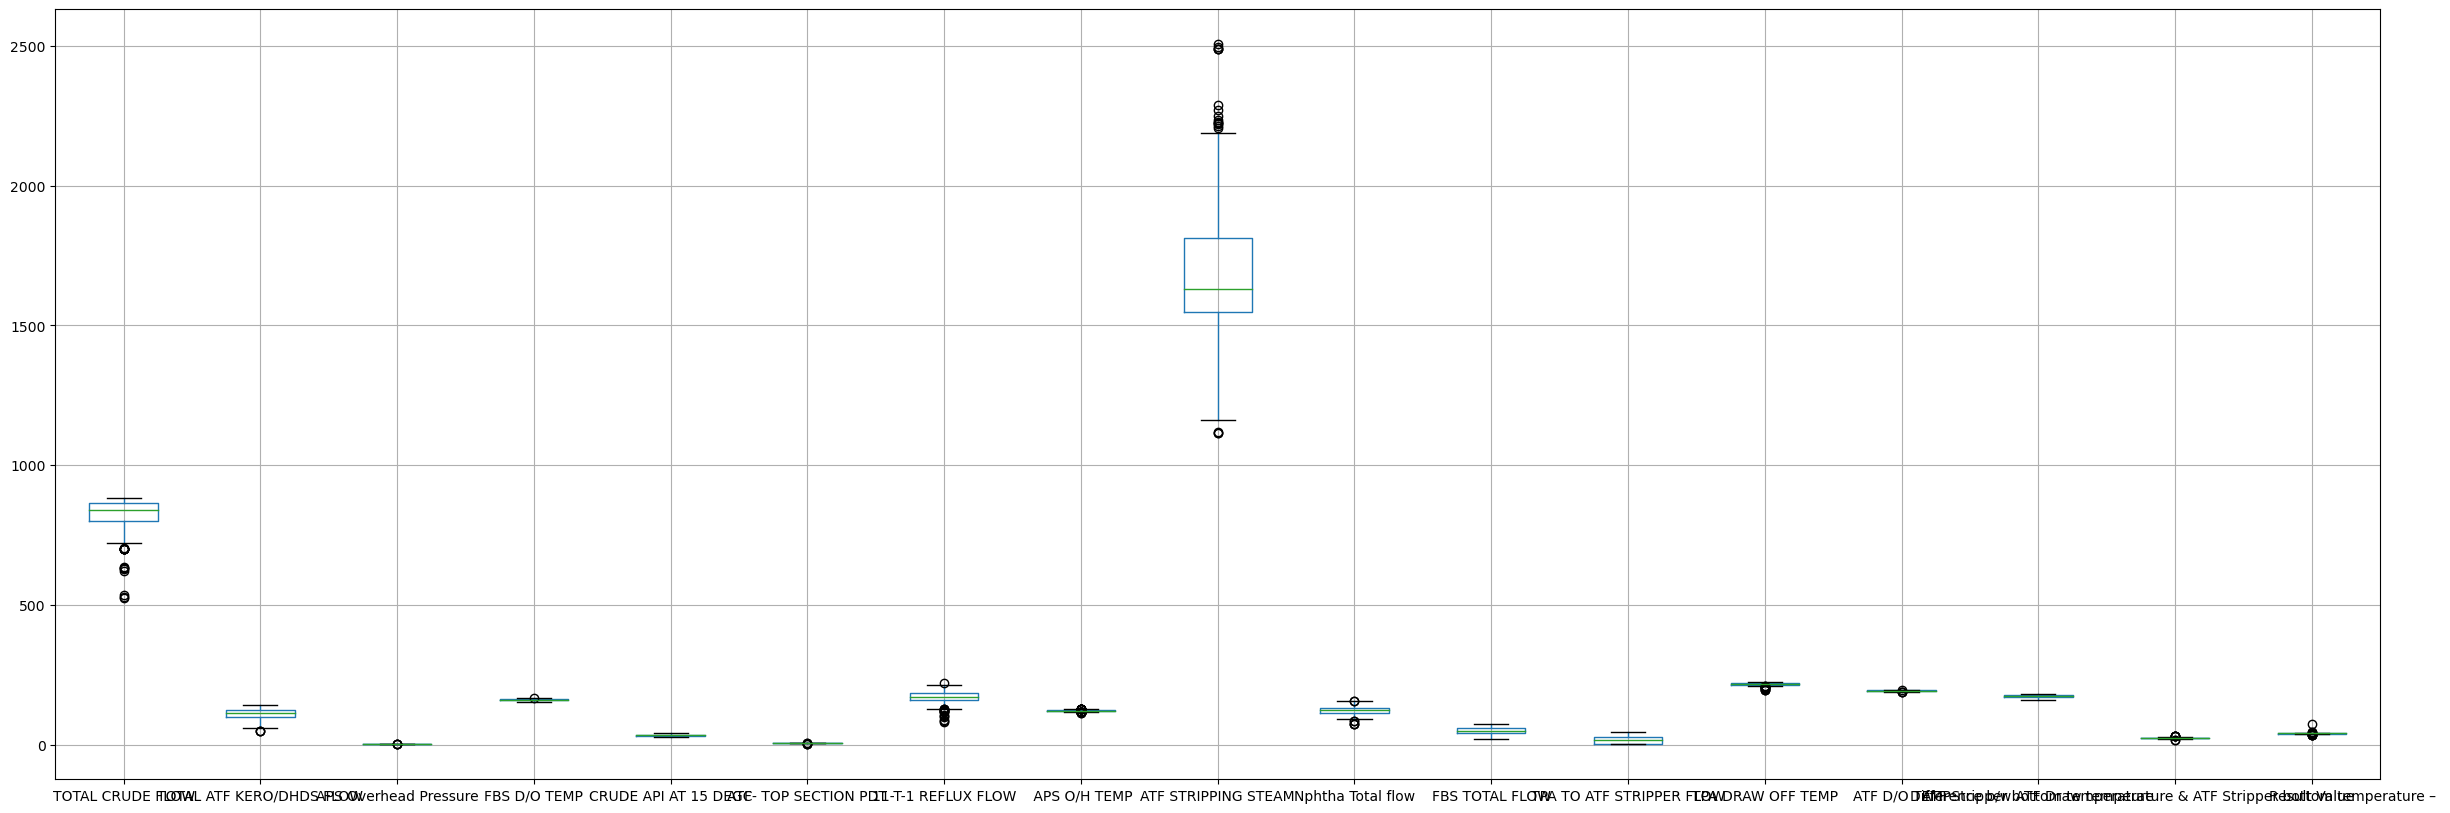

In [31]:
merge_df.boxplot(figsize=(30,10))

In [32]:
merge_df.corr()

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –,Result Value
TOTAL CRUDE FLOW,1.000000,0.570255,0.101656,0.314748,0.228135,0.584241,0.506504,0.276083,0.170962,0.625521,0.334145,0.271129,0.633517,0.344110,0.401281,-0.230884,-0.021757
TOTAL ATF KERO/DHDS FLOW,0.570255,1.000000,0.492897,0.410801,0.731537,0.689805,0.662630,-0.097527,0.388233,0.750970,0.738838,0.830979,0.830089,0.396547,0.834266,-0.364546,-0.029647
APS Overhead Pressure,0.101656,0.492897,1.000000,0.588367,0.836764,0.542971,0.394057,0.038392,0.692841,0.586129,0.709886,0.479037,0.337049,0.406334,0.271610,0.311793,-0.263979
FBS D/O TEMP,0.314748,0.410801,0.588367,1.000000,0.640325,0.388878,0.127417,0.464862,0.483025,0.674642,0.562256,0.494236,0.275265,0.488106,0.357670,0.226571,0.034249
CRUDE API AT 15 DEGC,0.228135,0.731537,0.836764,0.640325,1.000000,0.686224,0.513017,0.053464,0.680443,0.740269,0.880319,0.700103,0.574195,0.439096,0.521572,0.132866,-0.111256
ATF- TOP SECTION PDT,0.584241,0.689805,0.542971,0.388878,0.686224,1.000000,0.868588,0.075296,0.526421,0.719241,0.652139,0.411802,0.778988,0.500340,0.414679,0.050632,-0.117972
11-T-1 REFLUX FLOW,0.506504,0.662630,0.394057,0.127417,0.513017,0.868588,1.000000,-0.230232,0.288984,0.514963,0.538623,0.359702,0.792312,0.511240,0.492627,-0.160240,-0.105222
APS O/H TEMP,0.276083,-0.097527,0.038392,0.464862,0.053464,0.075296,-0.230232,1.000000,0.295527,0.337562,-0.137541,-0.121839,-0.058660,-0.093703,-0.308331,0.392342,-0.057404
ATF STRIPPING STEAM,0.170962,0.388233,0.692841,0.483025,0.680443,0.526421,0.288984,0.295527,1.000000,0.635669,0.579981,0.319621,0.322544,0.230382,-0.024095,0.612414,-0.082322
Nphtha Total flow,0.625521,0.750970,0.586129,0.674642,0.740269,0.719241,0.514963,0.337562,0.635669,1.000000,0.666352,0.619351,0.638977,0.377865,0.453317,0.118788,-0.110281


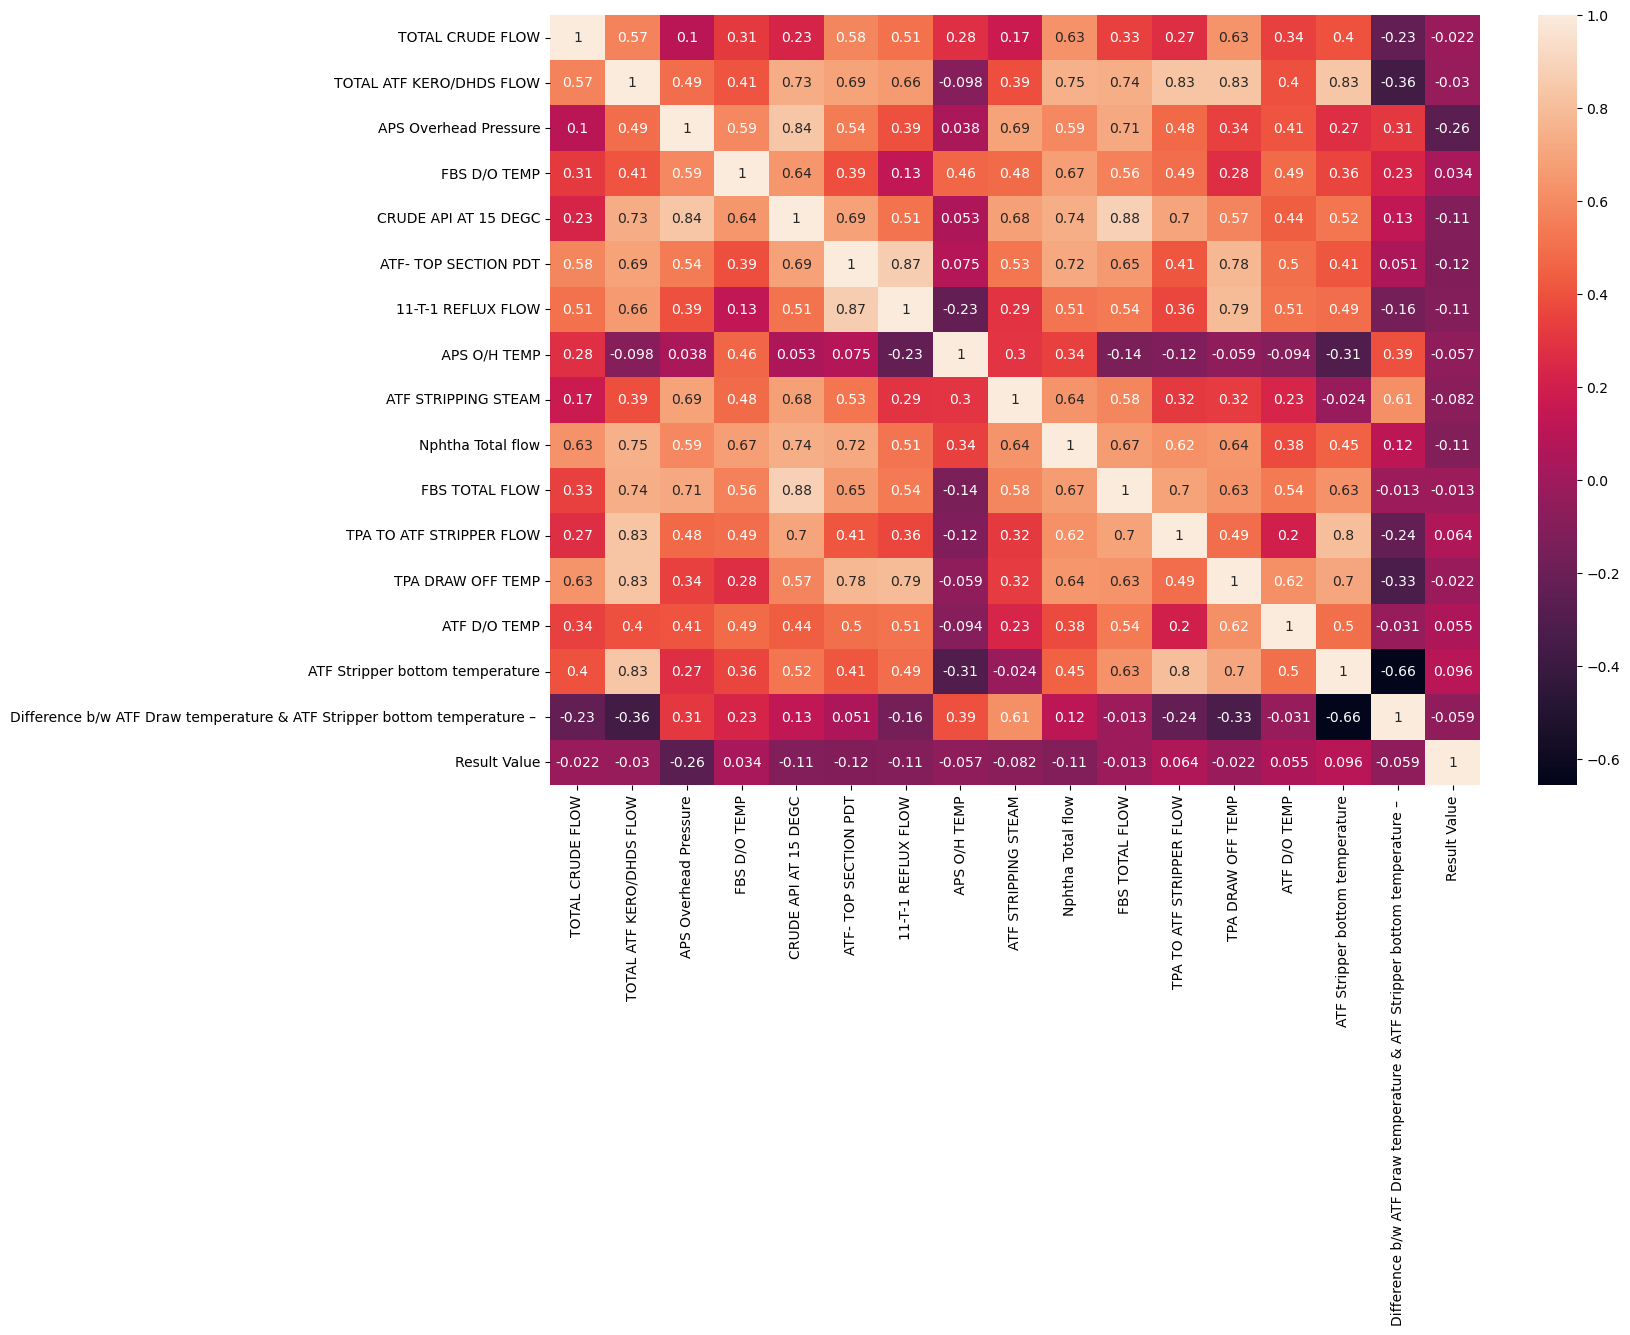

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(merge_df.corr(),annot=True)
plt.show()

In [34]:
merge_df.columns

Index(['TOTAL CRUDE FLOW', 'TOTAL ATF KERO/DHDS FLOW', 'APS Overhead Pressure',
       'FBS D/O TEMP', 'CRUDE API AT 15 DEGC', 'ATF- TOP SECTION PDT',
       '11-T-1 REFLUX FLOW', ' APS O/H TEMP', 'ATF STRIPPING STEAM',
       'Nphtha Total flow', 'FBS TOTAL FLOW', 'TPA TO ATF STRIPPER FLOW',
       'TPA DRAW OFF TEMP', 'ATF D/O TEMP', 'ATF Stripper bottom temperature',
       'Difference b/w ATF Draw temperature & ATF Stripper bottom temperature – ',
       'Result Value'],
      dtype='object')

<Figure size 100000x50000 with 0 Axes>

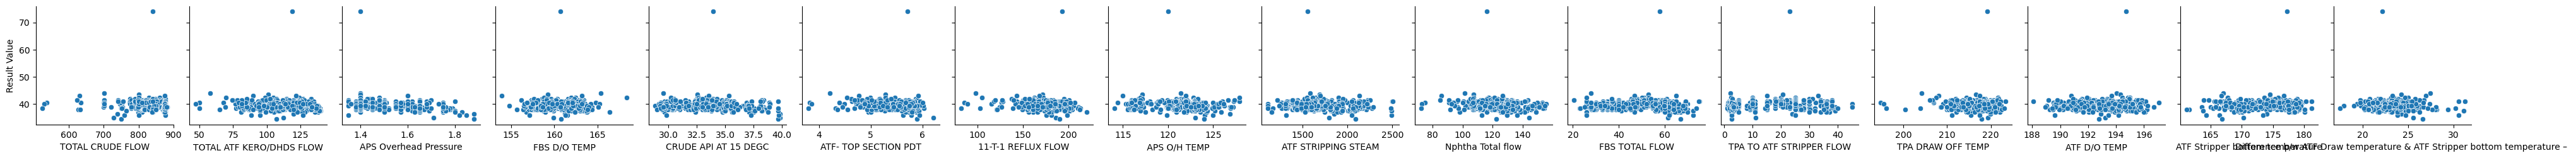

In [35]:
plt.figure(figsize=(1000,500))
sns.pairplot(x_vars = ['TOTAL CRUDE FLOW', 'TOTAL ATF KERO/DHDS FLOW', 'APS Overhead Pressure',
       'FBS D/O TEMP', 'CRUDE API AT 15 DEGC', 'ATF- TOP SECTION PDT',
       '11-T-1 REFLUX FLOW', ' APS O/H TEMP', 'ATF STRIPPING STEAM',
       'Nphtha Total flow', 'FBS TOTAL FLOW', 'TPA TO ATF STRIPPER FLOW',
       'TPA DRAW OFF TEMP', 'ATF D/O TEMP', 'ATF Stripper bottom temperature',
       'Difference b/w ATF Draw temperature & ATF Stripper bottom temperature – '],y_vars=['Result Value'],data=merge_df)
plt.show()

In [36]:
def get_model_evaluation(model, y_test, y_pred):
    mse=mean_squared_error(y_test,y_pred).round(3)
    mae=mean_absolute_error(y_test,y_pred).round(3)
    rmse=np.sqrt(mse).round(3)
    score=r2_score(ytest,ypred).round(3)
    print("Mean Squared Error =", mse)
    print("Mean Absolute Error =", mae)
    print("Root Mean Squared Error =", rmse)
    print("R2_Score Value =", score)

In [1220]:
def plot_graph(actual,predicted):
    residual = np.array(actual) - np.array(predicted)  
    fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
    sns.lineplot(x = range(len(predicted)), y = predicted,label='y_pred', ax = ax[0,0])
    sns.lineplot(x = range(len(predicted)),y =actual,label='y_test', ax = ax[0,0])
    ax[0,0].set_title('Y_pred and Y_test comparison graph')
    ax[0,0].legend()
    sns.histplot(residual, ax = ax[0,1])
    ax[0,1].set_title('Residual Histogram Plot')
    sns.scatterplot(x=actual,y=residual, ax=ax[1,0])
    ax[1,0].set_title('Actual vs Residual')
    ax[1,0].set_xlabel('Actual')
    ax[1,0].set_ylabel('Residual')
    sns.scatterplot(x=actual,y=predicted, ax=ax[1,1])
    ax[1,1].set_title('Actual vs Predicted')
    ax[1,1].set_xlabel('Actual')
    ax[1,1].set_ylabel('Predicted')
    plt.show()

In [38]:
merge_df.to_csv("merge_df")

In [1221]:
X = merge_df.drop(columns = "Result Value")
y = merge_df["Result Value"]

In [1222]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.10,random_state = 0)
merge_df = merge_df.sample(frac = 1, random_state =1)
N = int(len(merge_df)*0.9)
train_df = merge_df.iloc[0:N]
val_df =  merge_df.iloc[N:]
X_train,X_test,y_train,y_test = train_df.drop(['Result Value'], axis = 1),  val_df.drop(['Result Value'], axis = 1), train_df['Result Value'],val_df['Result Value'] 

In [1223]:
lr = LinearRegression()

In [1224]:
lr.fit(X_train,y_train)

LinearRegression()

In [1225]:
y_pred=lr.predict(X_test)
get_model_evaluation(lr, y_test, y_pred)


Mean Squared Error = 1.119
Mean Absolute Error = 0.832
Root Mean Squared Error = 1.058
R2_Score Value = 0.396


In [1226]:
y_pred=lr.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mn_val = np.mean(y_test)
100 -mae/mn_val*100

97.91084730712127

In [1227]:
type(np.array(y_test))

numpy.ndarray

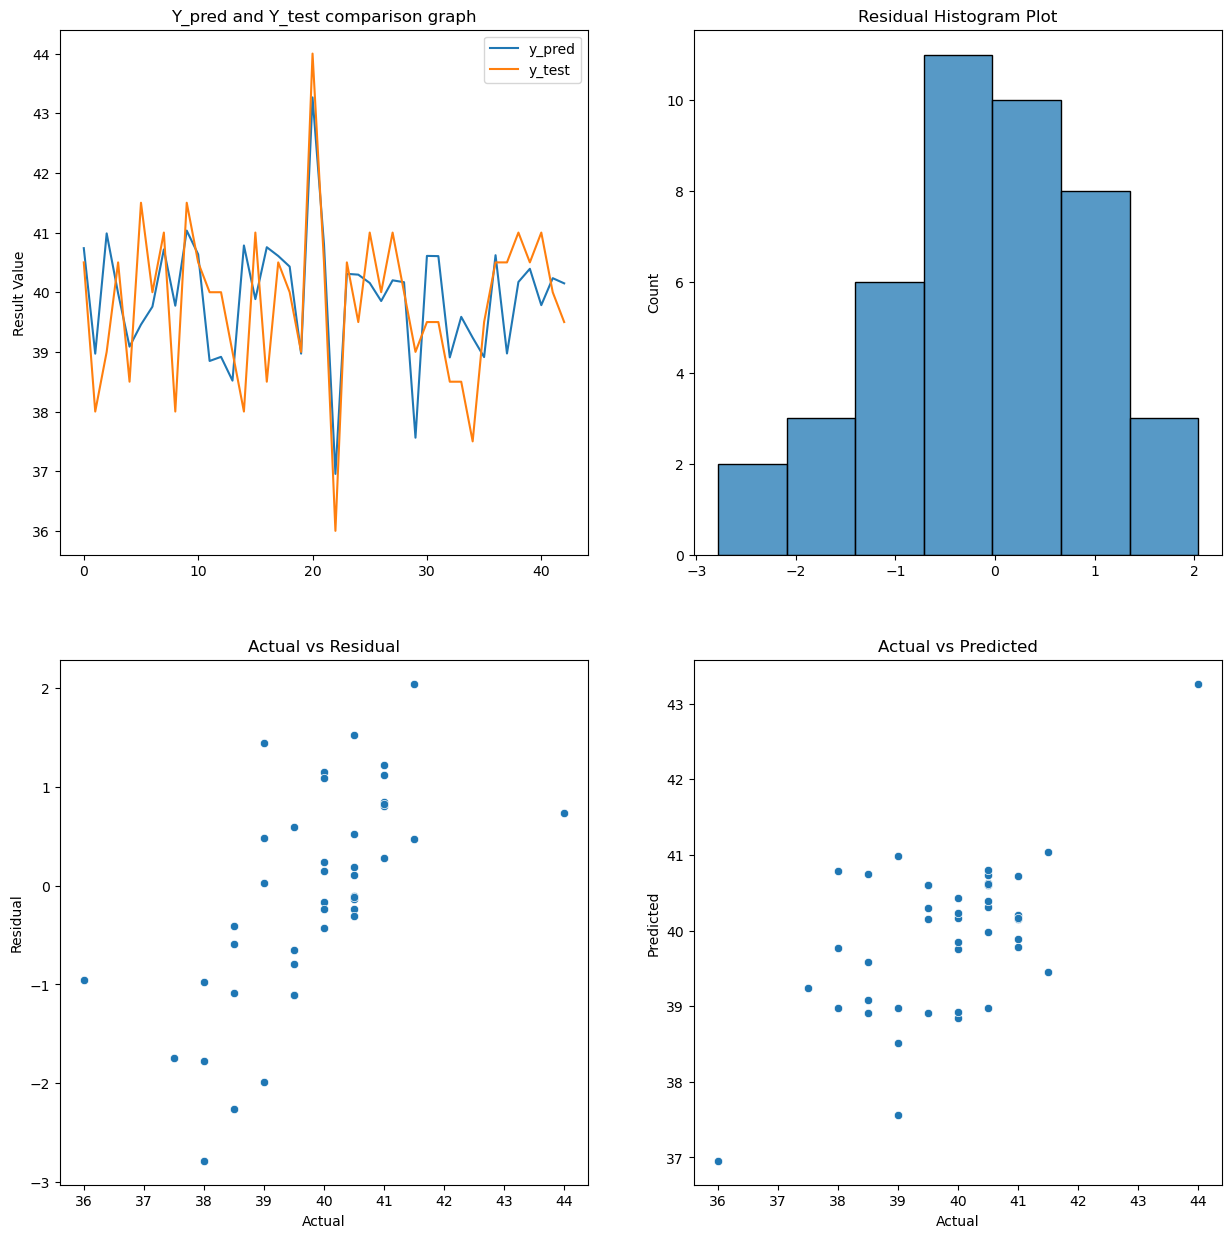

In [1228]:
# plt.plot(range(len(y_pred)), y_pred, label = "y_pred")
# plt.plot(range(len(y_pred)), y_test, label = "y_test")
# plt.legend()
# plt.show()
# plt.hist()
residual_list=[]
# y_test_list=list(y_test)
# y_pred_list=list(y_pred)
# for i in range(len(y_test_list)):
#     residual_list.append(y_test_list[i]-y_pred_list[i])
residual = np.array(y_test) - np.array(y_pred)
#residual=pd.Series(residual_list)   
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
sns.lineplot(x = range(len(y_pred)), y = y_pred,label='y_pred', ax = ax[0,0])
sns.lineplot(x = range(len(y_pred)),y =y_test,label='y_test', ax = ax[0,0])
ax[0,0].set_title('Y_pred and Y_test comparison graph')
ax[0,0].legend()
sns.histplot(residual, ax = ax[0,1])
ax[0,1].set_title('Residual Histogram Plot')
sns.scatterplot(x=y_test,y=residual, ax=ax[1,0])
ax[1,0].set_title('Actual vs Residual')
ax[1,0].set_xlabel('Actual')
ax[1,0].set_ylabel('Residual')
sns.scatterplot(x=y_test,y= y_pred, ax=ax[1,1])
ax[1,1].set_title('Actual vs Predicted')
ax[1,1].set_xlabel('Actual')
ax[1,1].set_ylabel('Predicted')
plt.show()

In [1229]:

sc=StandardScaler()
sc.fit(X_train)
sc.fit(X_test)
sc_xtrain=sc.transform(X_train)
sc_xtest=sc.transform(X_test)

In [1230]:
model=LinearRegression()
model.fit(sc_xtrain,y_train)

LinearRegression()

In [1231]:
sc_ypred=model.predict(sc_xtest)

In [1232]:

get_model_evaluation(lr,y_test,sc_ypred)

Mean Squared Error = 1.119
Mean Absolute Error = 0.832
Root Mean Squared Error = 1.058
R2_Score Value = 0.396


In [1233]:

mm=MinMaxScaler()
mm.fit(X_train)
mm.fit(X_test)
mm_xtrain=mm.transform(X_train)
mm_xtest=mm.transform(X_test)

In [1234]:
model=LinearRegression()
model.fit(mm_xtrain,y_train)

LinearRegression()

In [1235]:
mm_ypred=model.predict(mm_xtest)

In [1236]:
#transformed target regressor

In [1237]:
# model = TransformedTargetRegressor()

In [1238]:
# transformer = log
# model.fit(X_train, transformer.transform(y_train))

In [1239]:
# Apply log transformation to the target variable
y_train_transformed = np.log(y_train)  # Applying log transformation

# Define the base regressor (e.g., LinearRegression)
base_regressor = LinearRegression()

# Create the TransformedTargetRegressor with a FunctionTransformer
transformer = FunctionTransformer(func=np.exp, inverse_func=np.log)
model = TransformedTargetRegressor(regressor=base_regressor, transformer=transformer)

# Fit the model on the training data
model.fit(X_train, y_train_transformed)

# Make predictions
y_pred_transformed = model.predict(X_test)

# Inverse transform predictions to get them back to the original scale
y_pred = np.exp(y_pred_transformed)

In [1240]:
get_model_evaluation(model, y_test, y_pred)

Mean Squared Error = 1.119
Mean Absolute Error = 0.832
Root Mean Squared Error = 1.058
R2_Score Value = 0.396


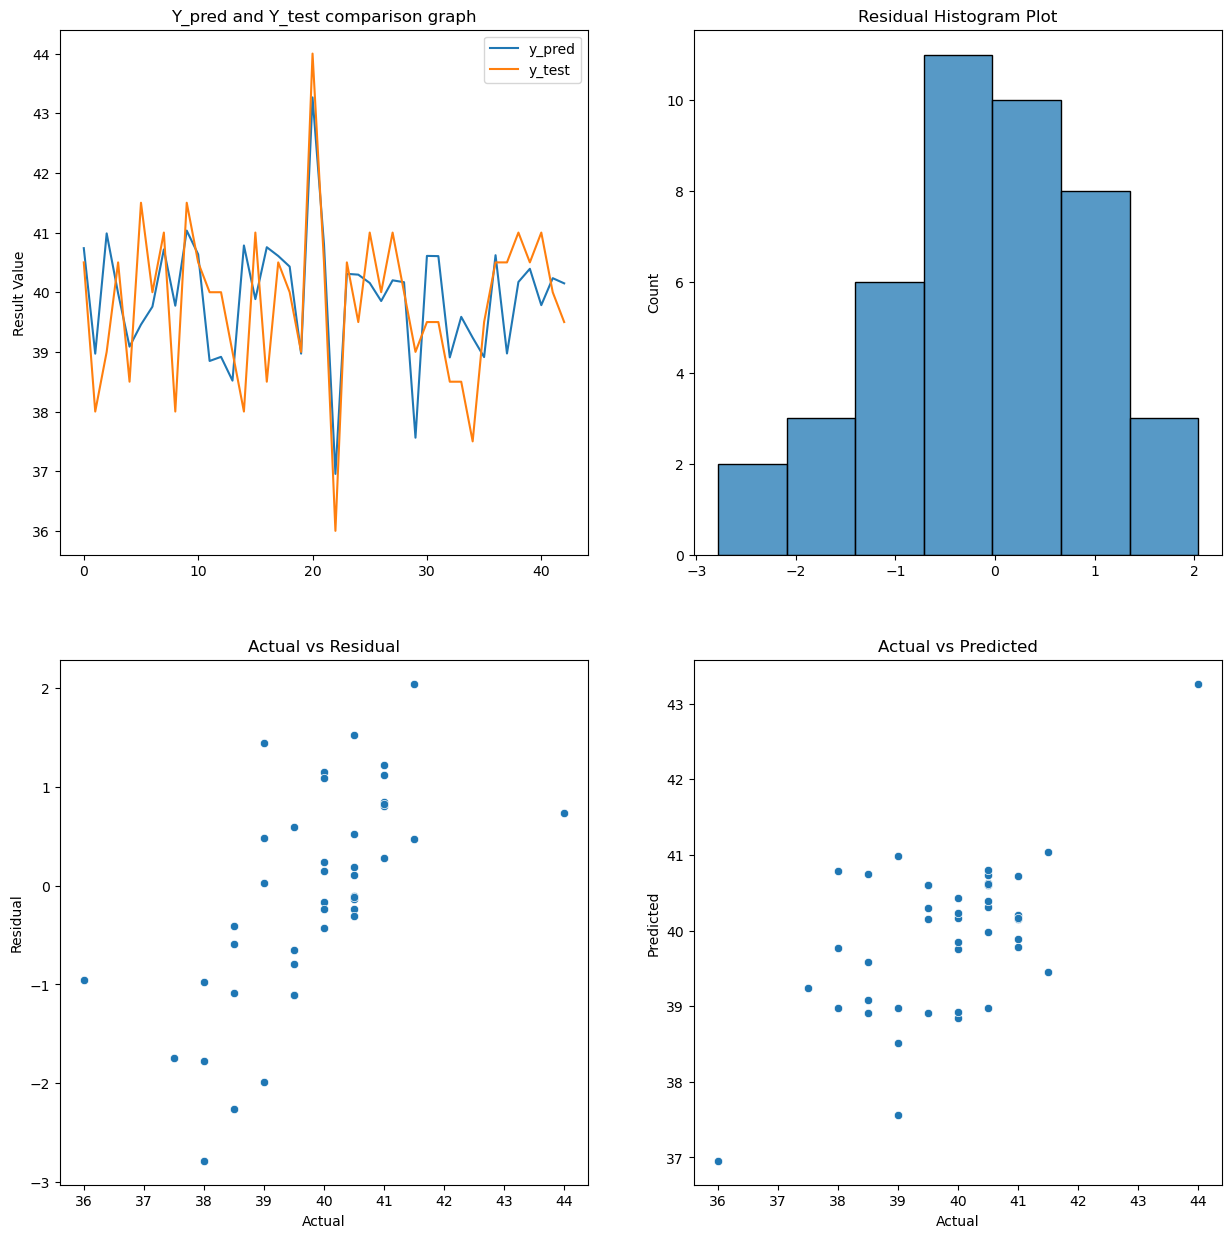

In [1241]:
plot_graph(y_test, y_pred)

In [1242]:
mse=mean_squared_error(y_test,mm_ypred)
print("MSE:",mse)

MSE: 1.1186854300284648


Mean Squared Error = 0.875
Mean Absolute Error = 0.729
Root Mean Squared Error = 0.935
R2_Score Value = 0.396


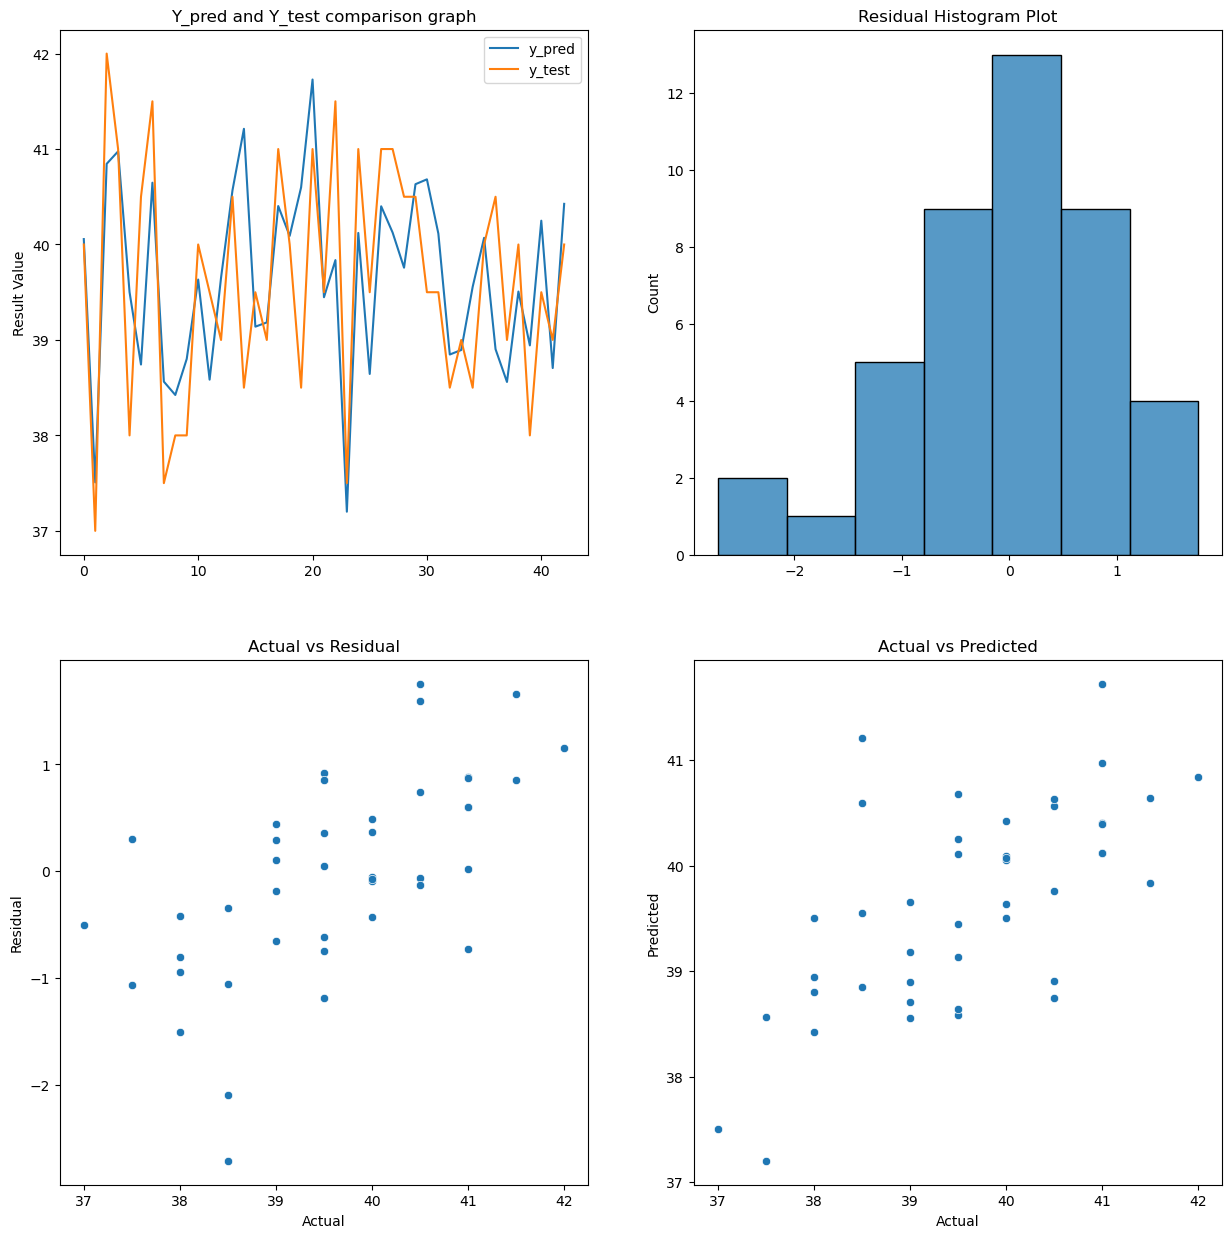

In [1243]:
# Log transformation
transformed_data = np.log(merge_df)
X = transformed_data.drop(columns = ["Result Value"])
y = transformed_data["Result Value"]
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.1,random_state=0)
mod = LinearRegression()
mod.fit(xtrain,ytrain)
ypred = mod.predict(xtest)
ypred = np.exp(ypred)
ypred
ytest = np.exp(ytest)
get_model_evaluation(mod, ytest, ypred)
plot_graph(ytest, ypred)

In [1244]:
# residual = np.array(ytest) - np.array(ypred)
# #residual=pd.Series(residual_list)   
# fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
# sns.lineplot(x = range(len(ypred)), y = ypred,label='ypred', ax = ax[0,0])
# sns.lineplot(x = range(len(ypred)),y =ytest,label='ytest', ax = ax[0,0])
# ax[0,0].set_title('Y_pred and Y_test comparison graph')
# ax[0,0].legend()
# sns.histplot(residual, ax = ax[0,1])
# ax[0,1].set_title('Residual Histogram Plot')
# sns.scatterplot(x=ytest,y=residual, ax=ax[1,0])
# ax[1,0].set_title('Actual vs Residual')
# ax[1,0].set_xlabel('Actual')
# ax[1,0].set_ylabel('Residual')
# sns.scatterplot(x=ytest,y= ypred, ax=ax[1,1])
# ax[1,1].set_title('Actual vs Predicted')
# ax[1,1].set_xlabel('Actual')
# ax[1,1].set_ylabel('Predicted')
# plt.show()

In [1245]:
# fig, ax = plt.subplots(figsize=(8, 6))
# sns.lineplot(x = range(len(y_pred)), y = y_pred,label='y_pred')
# sns.lineplot(x = range(len(y_pred)),y =y_test,label='y_test')
# ax.set_xlabel('X')
# ax.set_ylabel('Predicted y')
# ax.set_title('Linear Regression Predictions')
# ax.legend()
# plt.show()

In [1246]:
merged_df_right = pd.merge(concatenated_df, df_results, on='Timestamp',how = 'right')

In [1247]:
merged_df_right

,Timestamp,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –,Result Value
0,01-01-2023 07:00,812.32,131.95,1.66,164.26,38.3,5.82,188.13,123.7,2133.27,143.44,57.89,38.01,220.52,192.96,177.03,23.86903448,39.0
1,01-01-2023 17:00,811.88,132.23,1.65,163.36,38.41,5.73,183.09,123.29,2225.82,143.5,57.93,37.98,219.87,191.51,175.65,24.0057521,41.5
2,02-01-2023 07:00,807.45,131.99,1.64,163.31,38.34,5.7,179.98,123.19,2207.5,145.54,57.99,38.04,219.35,191.37,175.64,23.79393818,38.0
3,02-01-2023 17:00,800.78,134.09,1.63,164.36,38.49,6.03,187.31,124.29,2271.21,146.6,58.54,38.01,222.32,193.59,176.55,25.18398762,38.5
4,03-01-2023 07:00,811.73,133.98,1.63,162.91,38.41,5.85,176.66,123.89,2289.31,148.37,56.95,38,220.24,190.97,173.85,25.42168682,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,24-07-2023 17:00,873.93,110.22,1.5,160.69,33.51,5.58,171.22,122.81,1563.09,124.37,47.12,3.38,220.86,194.62,173.03,22.394674,39.0
435,25-07-2023 07:00,875.07,94.07,1.4,159.79,32.48,5.56,155.03,122.9,1545.17,119.34,43.1,3.39,214.72,191.49,168.74,23.587139,40.0
436,25-07-2023 17:00,875.58,100.27,1.4,158.46,31.56,5.32,155.82,123.04,1535.01,118.06,34.92,3.29,216.8,192.37,170.28,22.891583,39.0
437,26-07-2023 07:00,876.73,97.97,1.4,158.44,31.79,5.55,166.03,123.4,1757.03,115.03,34.02,3.14,217.25,191.9,167.37,25.342483,39.5


In [1248]:
merged_df_right.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 0 to 438
Data columns (total 18 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Timestamp                                                                 439 non-null    object 
 1   TOTAL CRUDE FLOW                                                          428 non-null    object 
 2   TOTAL ATF KERO/DHDS FLOW                                                  428 non-null    object 
 3   APS Overhead Pressure                                                     428 non-null    object 
 4   FBS D/O TEMP                                                              428 non-null    object 
 5   CRUDE API AT 15 DEGC                                                      428 non-null    object 
 6   ATF- TOP SECTION PDT                                              

In [1249]:
merged_df_right.isna().sum()

Timestamp                                                                    0
TOTAL CRUDE FLOW                                                            11
TOTAL ATF KERO/DHDS FLOW                                                    11
APS Overhead Pressure                                                       11
FBS D/O TEMP                                                                11
CRUDE API AT 15 DEGC                                                        11
ATF- TOP SECTION PDT                                                        11
11-T-1 REFLUX FLOW                                                          11
 APS O/H TEMP                                                               11
ATF STRIPPING STEAM                                                         11
Nphtha Total flow                                                           11
FBS TOTAL FLOW                                                              11
TPA TO ATF STRIPPER FLOW                            

In [1250]:
merged_df_right.iloc[:1]

,Timestamp,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –,Result Value
0,01-01-2023 07:00,812.32,131.95,1.66,164.26,38.3,5.82,188.13,123.7,2133.27,143.44,57.89,38.01,220.52,192.96,177.03,23.86903448,39.0


In [1251]:
df_droped_date = merged_df_right.drop(columns = "Timestamp")


In [1252]:
df_droped_date.shape

(439, 17)

In [1253]:
df_droped_date.dtypes

TOTAL CRUDE FLOW                                                             object
TOTAL ATF KERO/DHDS FLOW                                                     object
APS Overhead Pressure                                                        object
FBS D/O TEMP                                                                 object
CRUDE API AT 15 DEGC                                                         object
ATF- TOP SECTION PDT                                                         object
11-T-1 REFLUX FLOW                                                           object
 APS O/H TEMP                                                                object
ATF STRIPPING STEAM                                                          object
Nphtha Total flow                                                            object
FBS TOTAL FLOW                                                               object
TPA TO ATF STRIPPER FLOW                                                    

In [1254]:
df_droped_date = df_droped_date.astype(float)

In [1255]:
df_droped_date.dtypes

TOTAL CRUDE FLOW                                                            float64
TOTAL ATF KERO/DHDS FLOW                                                    float64
APS Overhead Pressure                                                       float64
FBS D/O TEMP                                                                float64
CRUDE API AT 15 DEGC                                                        float64
ATF- TOP SECTION PDT                                                        float64
11-T-1 REFLUX FLOW                                                          float64
 APS O/H TEMP                                                               float64
ATF STRIPPING STEAM                                                         float64
Nphtha Total flow                                                           float64
FBS TOTAL FLOW                                                              float64
TPA TO ATF STRIPPER FLOW                                                    

In [1256]:
for column in df_droped_date.columns:
    mean_value = df_droped_date[column].mean()
    df_droped_date[column].fillna(mean_value, inplace=True)


In [1257]:
df_droped_date

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –,Result Value
0,812.32,131.95,1.66,164.26,38.30,5.82,188.13,123.70,2133.27,143.44,57.89,38.01,220.52,192.96,177.03,23.869034,39.0
1,811.88,132.23,1.65,163.36,38.41,5.73,183.09,123.29,2225.82,143.50,57.93,37.98,219.87,191.51,175.65,24.005752,41.5
2,807.45,131.99,1.64,163.31,38.34,5.70,179.98,123.19,2207.50,145.54,57.99,38.04,219.35,191.37,175.64,23.793938,38.0
3,800.78,134.09,1.63,164.36,38.49,6.03,187.31,124.29,2271.21,146.60,58.54,38.01,222.32,193.59,176.55,25.183988,38.5
4,811.73,133.98,1.63,162.91,38.41,5.85,176.66,123.89,2289.31,148.37,56.95,38.00,220.24,190.97,173.85,25.421687,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,873.93,110.22,1.50,160.69,33.51,5.58,171.22,122.81,1563.09,124.37,47.12,3.38,220.86,194.62,173.03,22.394674,39.0
435,875.07,94.07,1.40,159.79,32.48,5.56,155.03,122.90,1545.17,119.34,43.10,3.39,214.72,191.49,168.74,23.587139,40.0
436,875.58,100.27,1.40,158.46,31.56,5.32,155.82,123.04,1535.01,118.06,34.92,3.29,216.80,192.37,170.28,22.891583,39.0
437,876.73,97.97,1.40,158.44,31.79,5.55,166.03,123.40,1757.03,115.03,34.02,3.14,217.25,191.90,167.37,25.342483,39.5


In [1258]:
df_droped_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 0 to 438
Data columns (total 17 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   TOTAL CRUDE FLOW                                                          439 non-null    float64
 1   TOTAL ATF KERO/DHDS FLOW                                                  439 non-null    float64
 2   APS Overhead Pressure                                                     439 non-null    float64
 3   FBS D/O TEMP                                                              439 non-null    float64
 4   CRUDE API AT 15 DEGC                                                      439 non-null    float64
 5   ATF- TOP SECTION PDT                                                      439 non-null    float64
 6   11-T-1 REFLUX FLOW                                                

In [1259]:
# df_droped_date.to_clipboard()

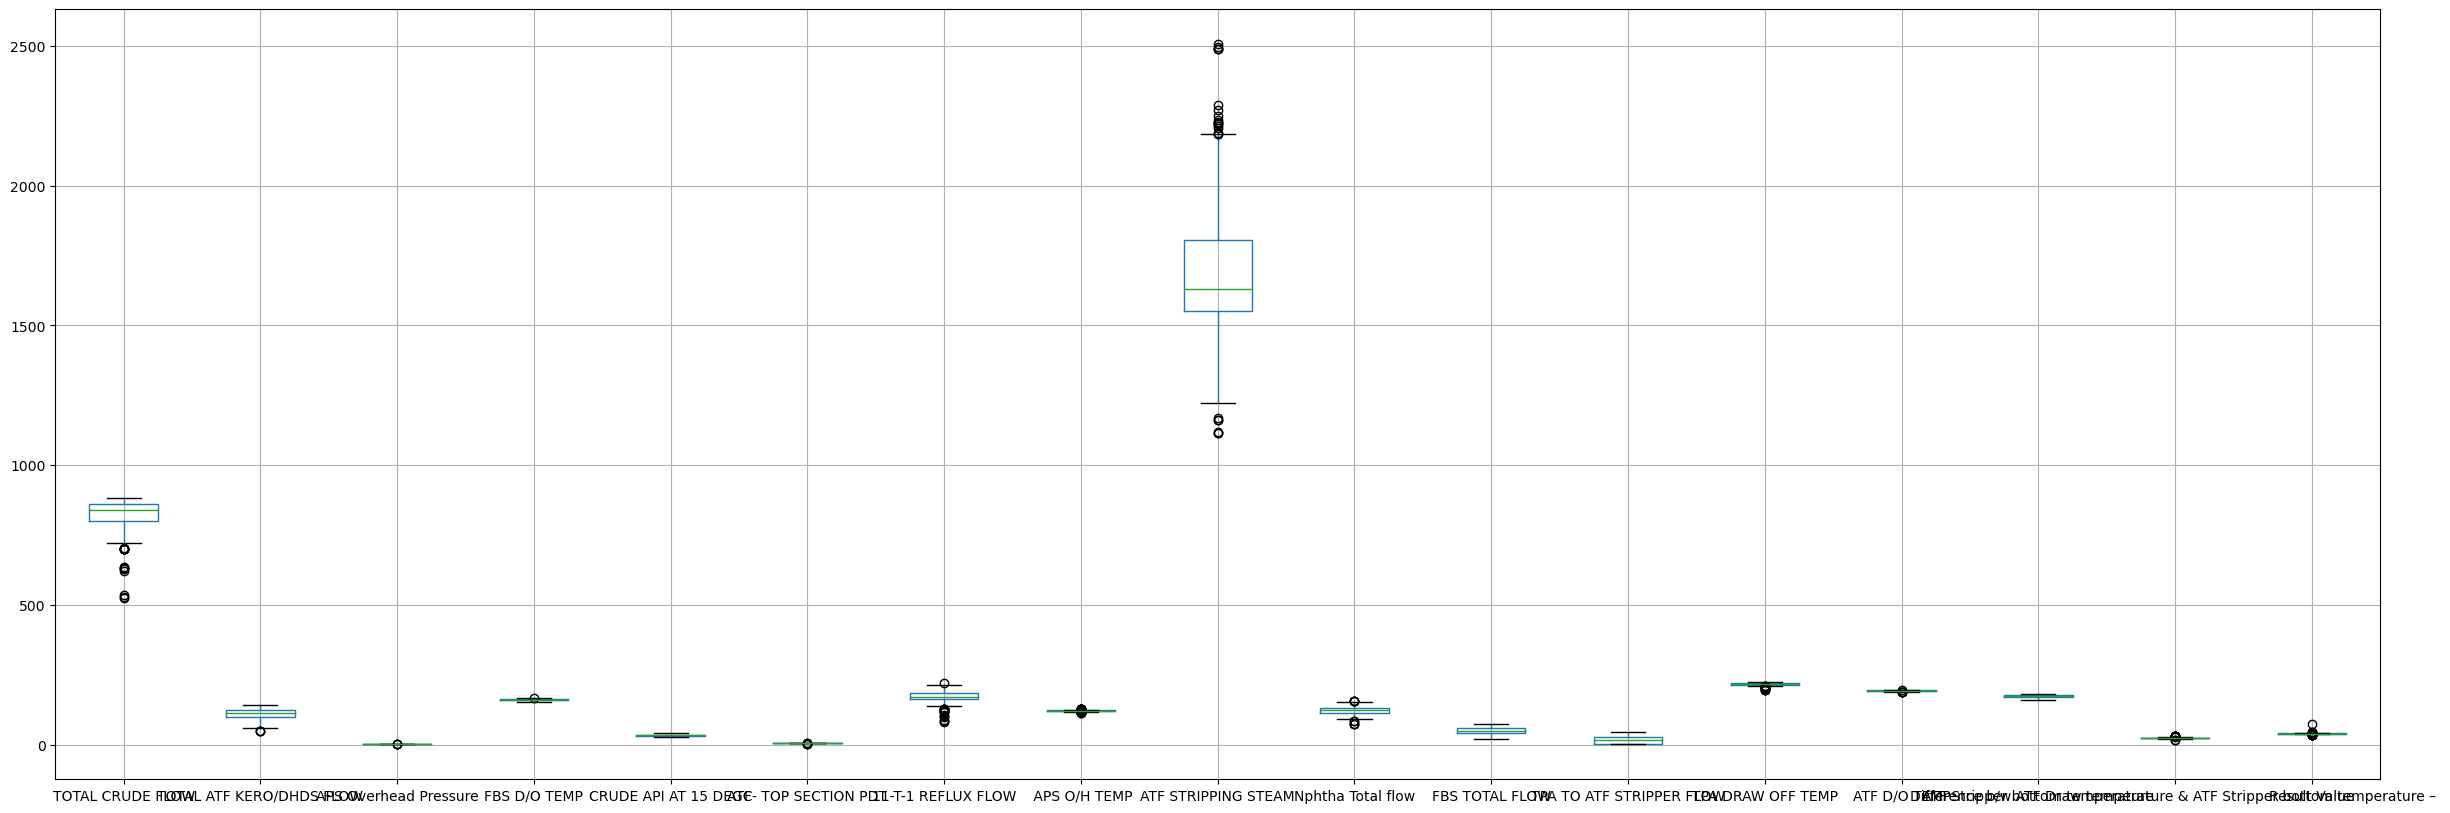

In [1260]:
df_droped_date.boxplot(figsize = (30,10))
plt.show()

In [1261]:
X = df_droped_date.drop(columns = "Result Value")
y = df_droped_date["Result Value"]

In [1262]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.10,random_state = 0)

In [1263]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
mean_absolute_error(y_test,y_pred)

0.8227945456125223

In [1264]:
y_pred=lr.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mn_val = np.mean(y_test)
100 -mae/mn_val*100

97.95000226461207

In [1265]:

get_model_evaluation(lr,y_test,y_pred)

Mean Squared Error = 1.076
Mean Absolute Error = 0.823
Root Mean Squared Error = 1.037
R2_Score Value = 0.396


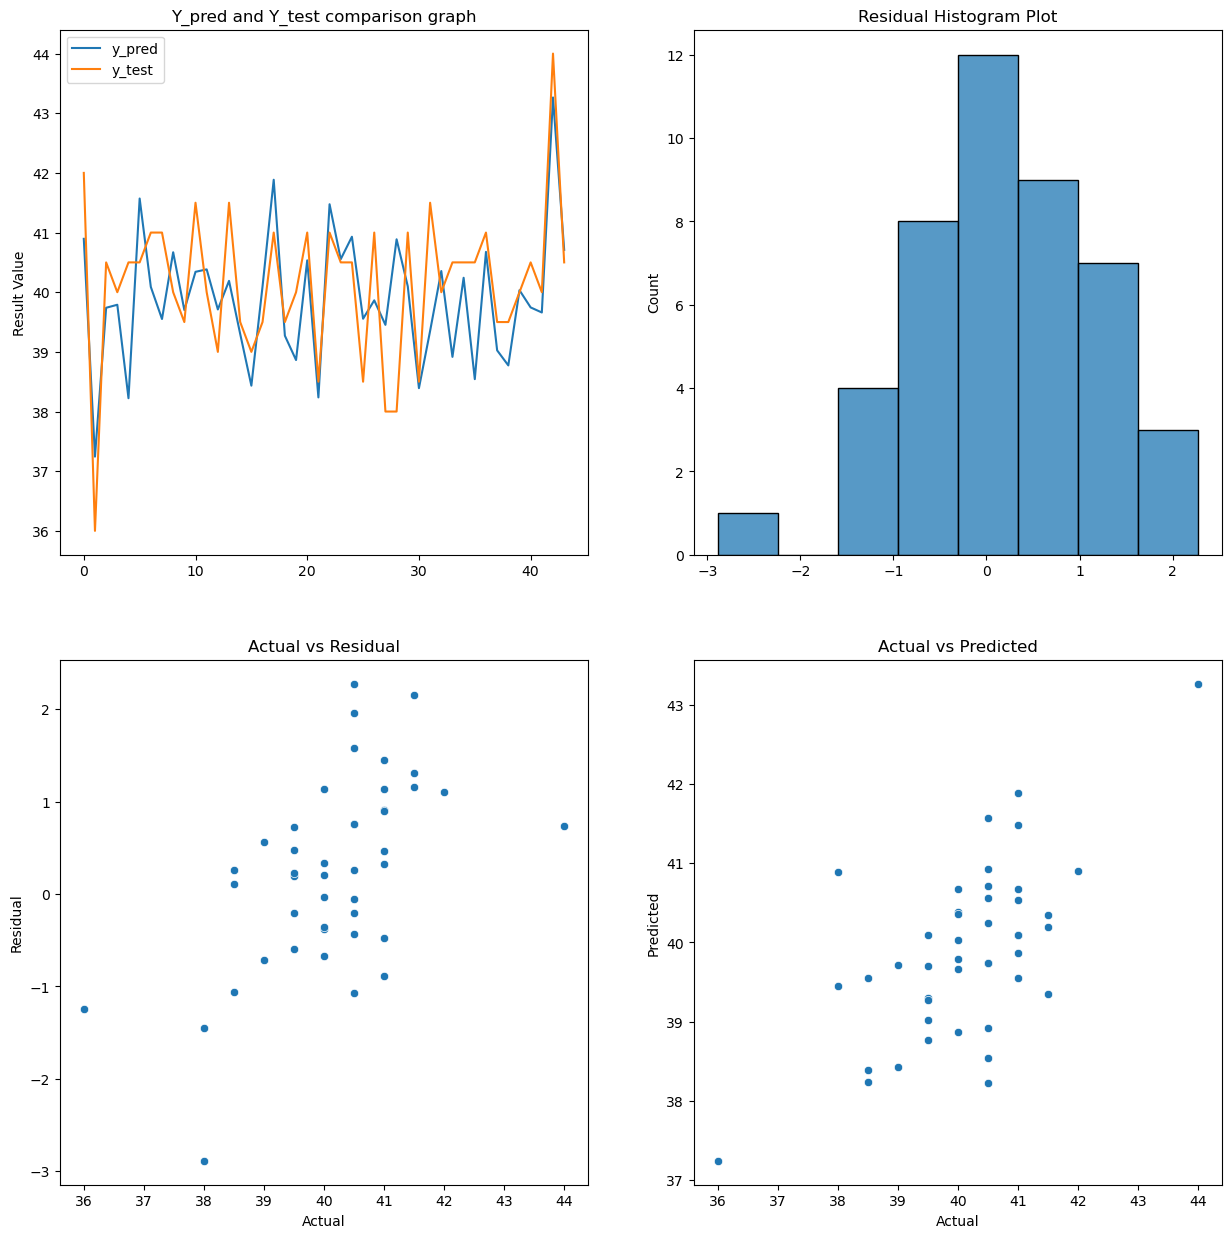

In [1266]:
plot_graph(y_test, y_pred)

In [1267]:
# # Log transformation
# log_transformed_data = np.log(df_droped_date)
# X = log_transformed_data.drop(columns = ["Result Value"])
# y = log_transformed_data["Result Value"]
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)
# mod = LinearRegression()
# mod.fit(X_train,y_train)
# y_pred = mod.predict(X_test)
# y_pred = np.exp(y_pred)
# y_pred
# y_test = np.exp(y_test)
# get_model_evaluation(mod, y_test, y_pred)
# plot_graph(y_test, y_pred)

In [1268]:
model=DecisionTreeRegressor()
rgr =  model.fit(X_train,y_train)

In [1269]:
y_pred=model.predict(X_test)
y_pred

array([40.  , 34.5 , 38.  , 39.  , 39.5 , 39.5 , 39.5 , 40.  , 40.5 ,
       39.  , 40.5 , 39.  , 39.05, 39.  , 39.  , 39.5 , 40.5 , 41.  ,
       40.  , 41.  , 40.5 , 39.5 , 40.5 , 39.  , 41.5 , 40.  , 39.  ,
       38.5 , 37.  , 40.5 , 40.  , 39.  , 39.5 , 39.  , 40.5 , 39.5 ,
       41.  , 39.5 , 38.  , 40.5 , 39.5 , 39.5 , 42.5 , 42.5 ])

In [1270]:
ma = mean_absolute_error(y_test,y_pred)
ma
get_model_evaluation(model,y_test, y_pred)
# mse=mean_squared_error(y_test,y_pred)
# print("MSE:",mse)
# print("RMSE:",np.sqrt(mse))
# mae=mean_absolute_error(y_test,y_pred)
# print("MAE:",mae)
# score=r2_score(y_test,y_pred)
# print("R-squared :",score)

Mean Squared Error = 1.472
Mean Absolute Error = 1.012
Root Mean Squared Error = 1.213
R2_Score Value = 0.396


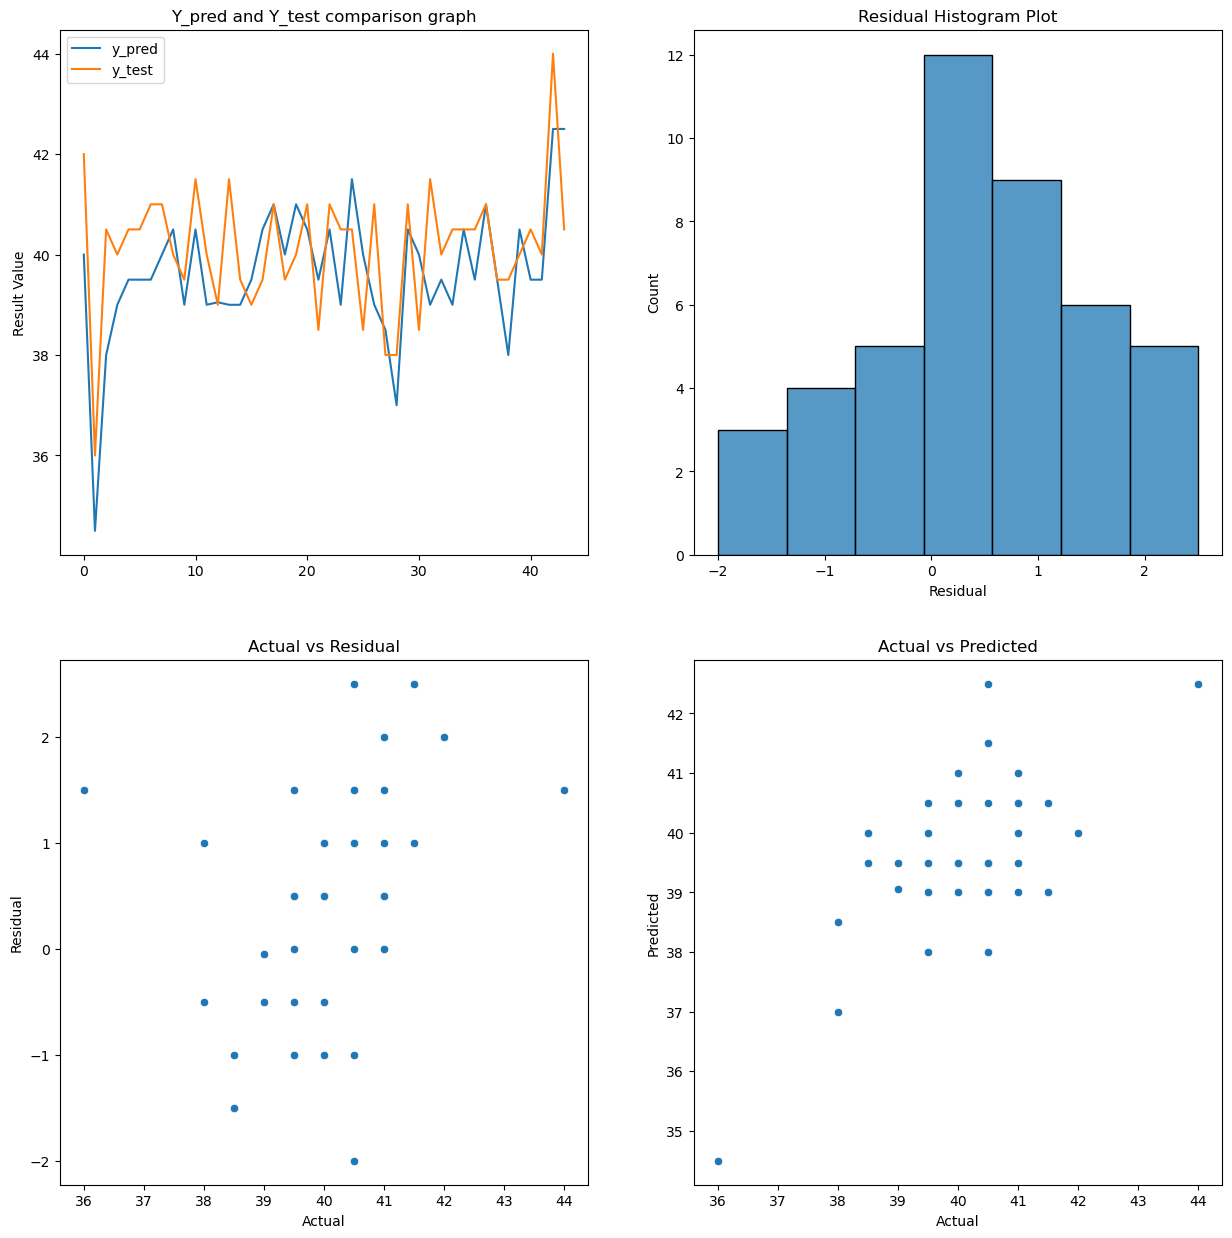

In [1271]:
residual = np.array(y_test) - np.array(y_pred)
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
sns.lineplot(x = range(len(y_pred)), y = y_pred,label='y_pred', ax = ax[0,0])
sns.lineplot(x = range(len(y_pred)),y =y_test,label='y_test', ax = ax[0,0])
ax[0,0].set_title('Y_pred and Y_test comparison graph')
ax[0,0].legend()
sns.histplot(residual, ax = ax[0,1])
ax[0,1].set_xlabel("Residual")
ax[0,1].set_title('Residual Histogram Plot')
sns.scatterplot(x=y_test,y=residual, ax=ax[1,0])
ax[1,0].set_title('Actual vs Residual')
ax[1,0].set_xlabel('Actual')
ax[1,0].set_ylabel('Residual')
sns.scatterplot(x=y_test,y= y_pred, ax=ax[1,1])
ax[1,1].set_title('Actual vs Predicted')
ax[1,1].set_xlabel('Actual')
ax[1,1].set_ylabel('Predicted')
plt.show()

In [1272]:
regressor = DecisionTreeRegressor()

In [1290]:
#Defining Hyperparameters for Grid SEarch
param_grid = {'max_depth':[None, 10, 20, 30],'min_samples_split': [2,5,10], 'min_samples_leaf': [1,2,4], 'max_features' : ['auto' , 'sqrt' , 'log2']}

In [1291]:
#creating Gridsearccv with cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv = 5, scoring = 'neg_mean_absolute_error')

In [1292]:
#fitting grid search to the data
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_absolute_error')

In [1293]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [1294]:
best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test)
test_score = best_regressor.score(X_test, y_test)
test_score

0.04649870168627801

In [1295]:
ma = mean_absolute_error(y_test,y_pred)
ma
get_model_evaluation(best_regressor, y_test, y_pred)

Mean Squared Error = 1.532
Mean Absolute Error = 0.918
Root Mean Squared Error = 1.238
R2_Score Value = 0.396


In [1296]:
y_pred = best_regressor.predict(X_test)

In [1297]:
def plot_graph(actual,predicted):
    residual = np.array(actual) - np.array(predicted)  
    fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
    sns.lineplot(x = range(len(predicted)), y = predicted,label='y_pred', ax = ax[0,0])
    sns.lineplot(x = range(len(predicted)),y =actual,label='y_test', ax = ax[0,0])
    ax[0,0].set_title('Y_pred and Y_test comparison graph')
    ax[0,0].legend()
    sns.histplot(residual, ax = ax[0,1])
    ax[0,1].set_title('Residual Histogram Plot')
    sns.scatterplot(x=actual,y=residual, ax=ax[1,0])
    ax[1,0].set_title('Actual vs Residual')
    ax[1,0].set_xlabel('Actual')
    ax[1,0].set_ylabel('Residual')
    sns.scatterplot(x=actual,y=predicted, ax=ax[1,1])
    ax[1,1].set_title('Actual vs Predicted')
    ax[1,1].set_xlabel('Actual')
    ax[1,1].set_ylabel('Predicted')
    plt.show()

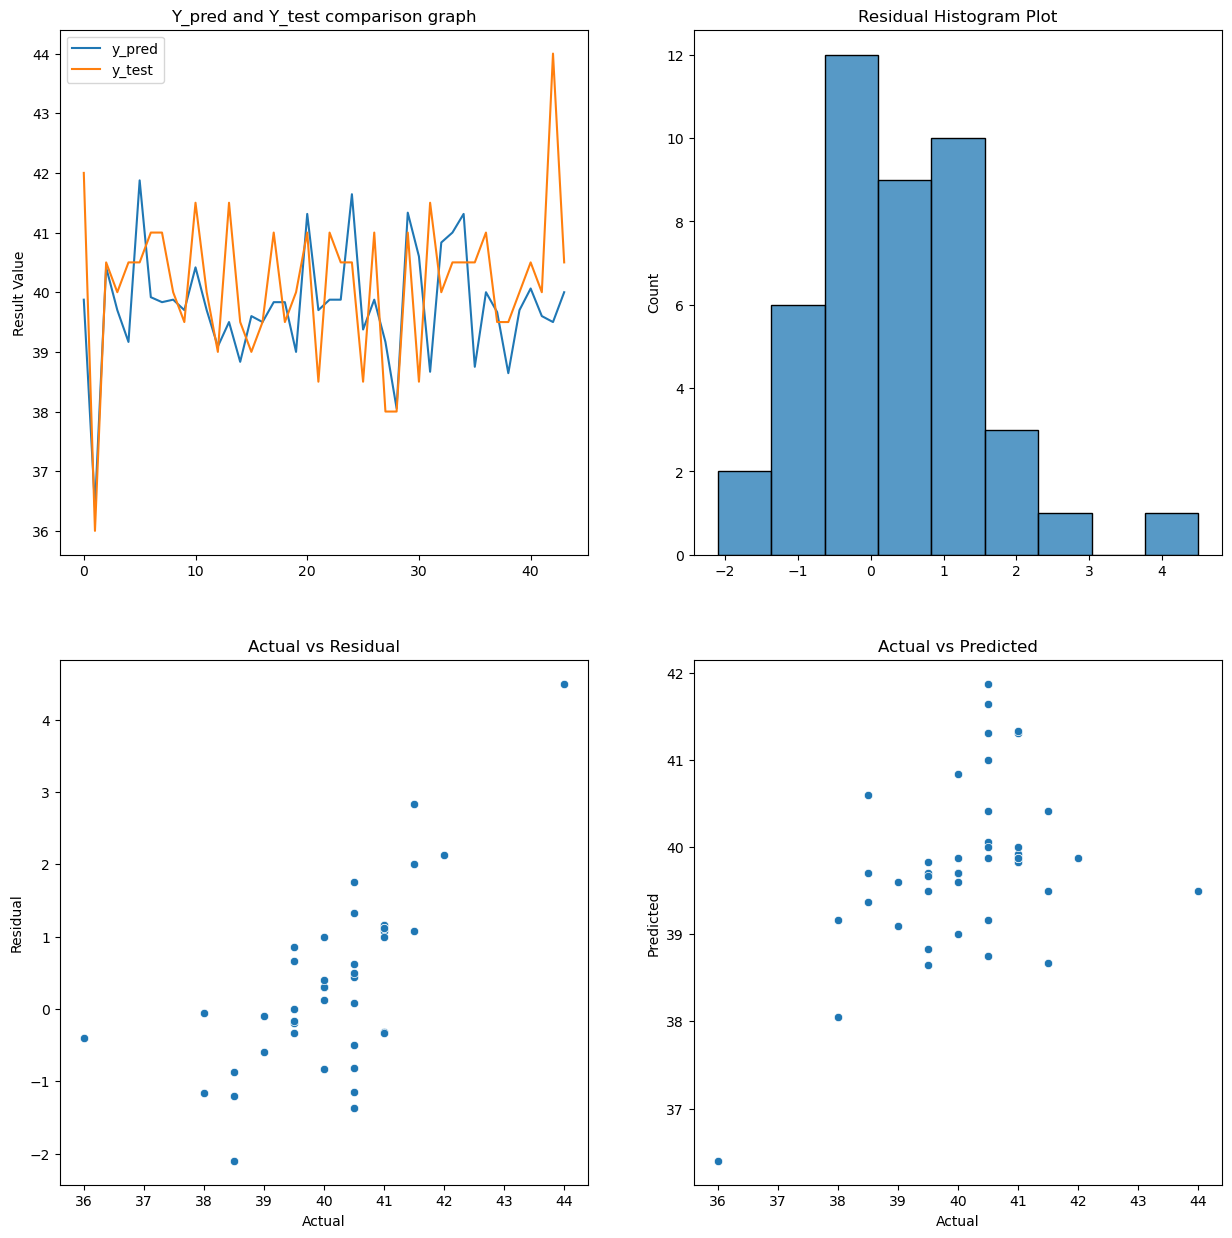

In [1298]:
plot_graph(y_test,y_pred)

In [973]:
# # Save the trained model as a pickle string.
# saved_model_dtree_gscv = pickle.dumps(best_regressor)

In [974]:
# # Load the pickled model
# _from_pickle = pickle.loads(saved_model_dtree_gscv)
  
# # Use the loaded pickled model to make predictions
# knn_from_pickle.predict(X_test)

In [975]:
# get_model_evaluation(saved_model_dtree_gscv, y_test, y_pred)

In [976]:
#bootstraping and random forest
#python function for bootstraping

In [1304]:
rfr = RandomForestRegressor(n_estimators = 10)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [1305]:
y_pred = rfr.predict(X_test)
y_pred

array([39.4       , 37.5       , 40.05      , 39.48      , 39.6       ,
       40.61363636, 39.45      , 39.5       , 40.45      , 39.8       ,
       39.85      , 38.95      , 38.99643218, 40.31428571, 39.1       ,
       39.55      , 39.2       , 41.15      , 39.85      , 40.        ,
       40.15      , 38.75      , 43.95      , 40.25      , 41.05      ,
       39.2       , 39.55      , 39.05      , 40.35      , 40.75      ,
       39.6       , 38.7       , 40.8       , 39.85      , 39.9       ,
       38.99545455, 39.7       , 39.75      , 38.7       , 39.35      ,
       39.7       , 39.5       , 39.9       , 40.95      ])

In [1306]:
mean_absolute_error(y_test, y_pred)

0.9653969073855433

In [1307]:
get_model_evaluation(rfr, y_test, y_pred)

Mean Squared Error = 1.676
Mean Absolute Error = 0.965
Root Mean Squared Error = 1.295
R2_Score Value = 0.396


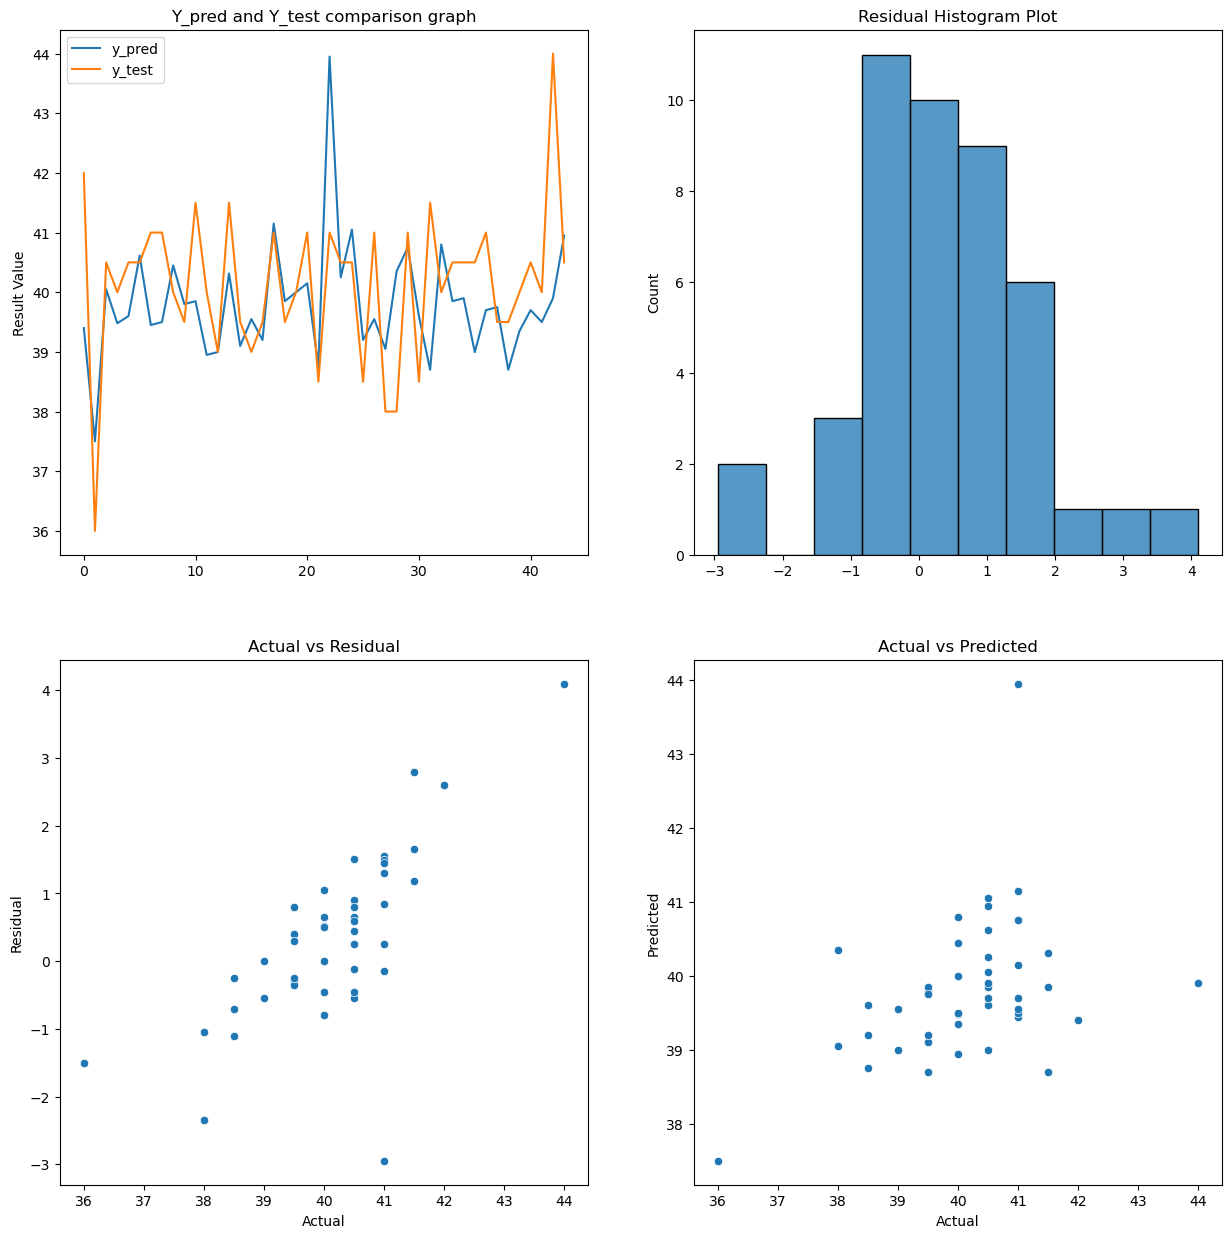

In [1308]:
plot_graph(y_test,y_pred)

In [1309]:
param_grid = {'max_depth':[None, 10, 20, 30],'min_samples_split': [2,5,10], 'min_samples_leaf': [1,2,4], 'max_features' : ['auto' , 'sqrt' , 'log2']}

In [1310]:
grid_search = GridSearchCV(rfr, param_grid, cv = 3, scoring = 'neg_mean_absolute_error')

In [1311]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=10),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_absolute_error')

In [1312]:
best_regressor = grid_search.best_estimator_
test_score = best_regressor.score(X_test, y_test)
test_score

0.16123450979449372

In [1313]:
y_pred = best_regressor.predict(X_test)

In [1314]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [987]:
mean_absolute_error(y_test, y_pred)

0.02121399923549787

In [1315]:
get_model_evaluation(best_regressor, y_test, y_pred)

Mean Squared Error = 1.347
Mean Absolute Error = 0.867
Root Mean Squared Error = 1.161
R2_Score Value = 0.396


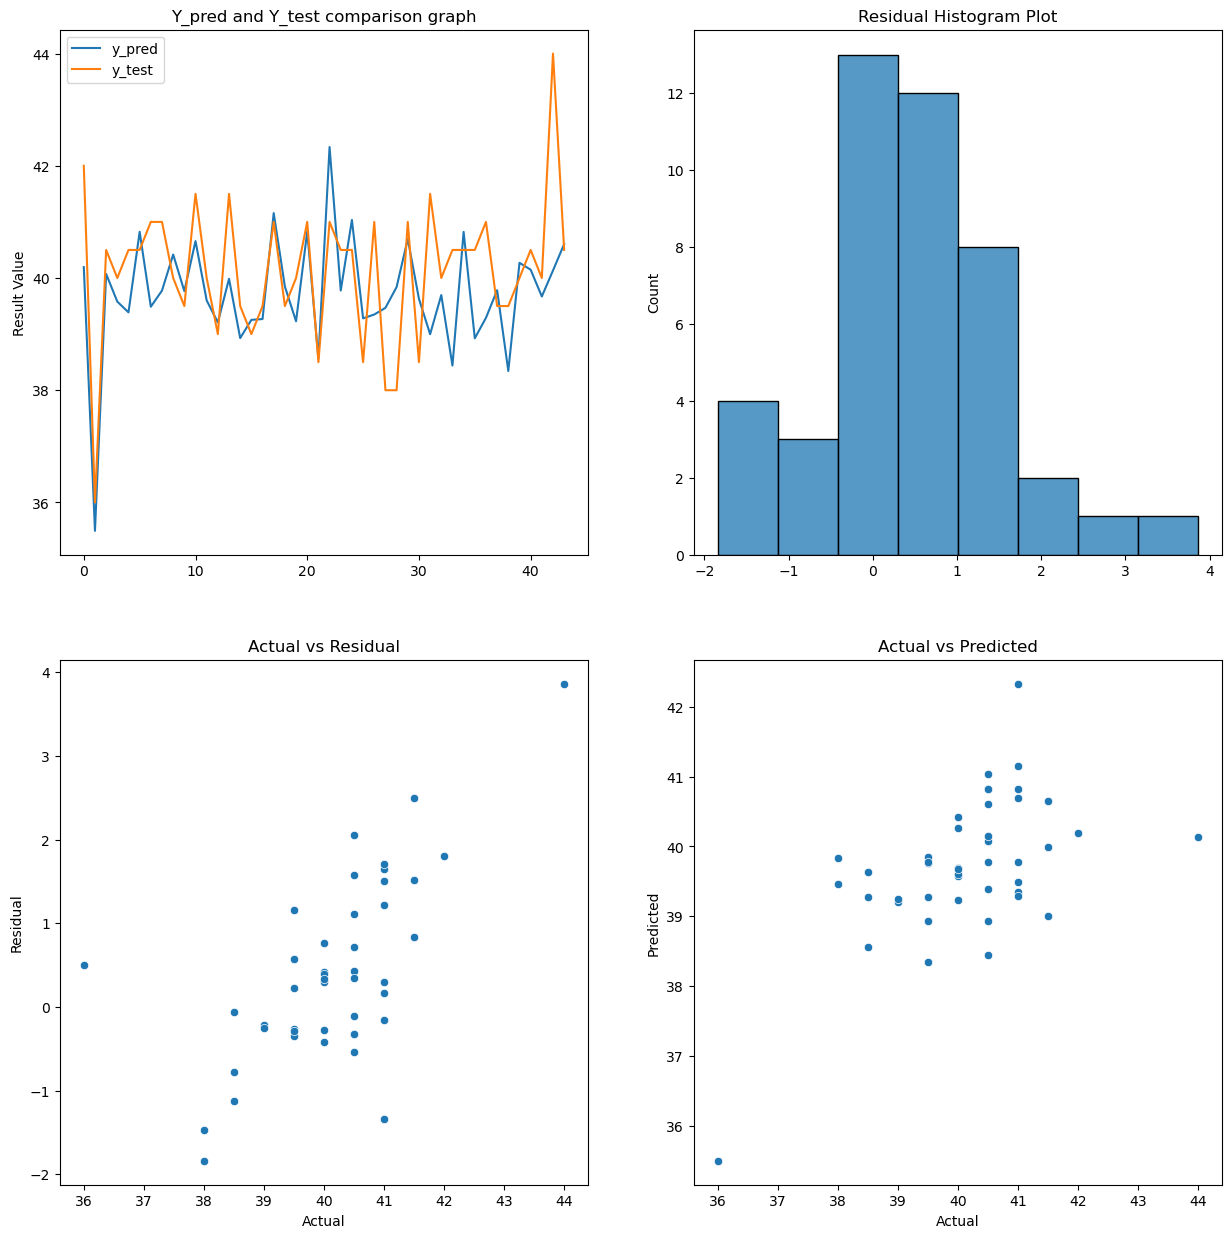

In [1316]:
plot_graph(y_test, y_pred)

In [989]:
# # Save the trained model as a pickle string.
# saved_model_rforrest_gscv = pickle.dumps(best_regressor)

In [990]:

def get_bootstap_samples(data,num_samples):
    bootstrap_samples = []
    for i in range(num_samples):
        boot = np.random.choice(data, size = len(lst), replace = True)
        bootstrap_samples.append(boot.tolist())
    return bootstrap_samples


In [991]:
def get_bootstap_df_samples(data,num_samples):
    bootstrap_samples = []
    for i in range(num_samples):
        bootstrap_sample = data.sample(len(data), replace = True)
        bootstrap_samples.append(bootstrap_sample)
    return bootstrap_samples

In [992]:
#list comprehension
lst = []
for i in range(10):
    random_integer = random.randint(1,100)
    lst.append(random_integer)

In [993]:
lst = [3,4,5,6]
get_bootstap_samples(lst, 2)

[[4, 6, 6, 4], [5, 3, 6, 3]]

In [994]:
#no. of estimators as parameter make random forest manually

In [995]:
# def random_forest(data,n_estimators):
#     mae_list =[]
#     y_pred_list = []
#     model_list = []
#     samples = get_bootstap_df_samples(data,n_estimators)
#     for sample in samples:
#         X = sample.drop(columns = "Result Value")
#         y = sample["Result Value"]
#         X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.10,random_state = 0)
#         model=DecisionTreeRegressor()
#         rgr =  model.fit(X_train,y_train)
#         model_list.append(rgr)
# #         y_pred = model.predict(X_test)
# #         y_pred_list.append(y_pred)
# #         for i in ypred:
# #             sum = sum + i
# #         avg_y_pred = sum/num_samples
# #         mae = mean_absolute_error(y_test,y_pred)
# #         mae_list.append(mae)
#     return model_list
        

In [996]:
# def random_forest(data,num_samples):
#     mae_list =[]
#     y_pred_list = []
#     model_list = []
#     sum = 0
#     samples = get_bootstap_df_samples(data,num_samples)
#     for sample in samples:
#         X_sample, y_sample = resample(X_train, y_train, random_state = 0) #?
#         model=DecisionTreeRegressor()
#         rgr =  model.fit(X_sample,y_sample)
#         model_list.append(rgr)
#         y_pred = model.predict(X_test)
#         y_pred_list.append(y_pred)
#         for i in ypred:
#             sum = sum + i
#         avg_y_pred = sum/num_samples
#         mae = mean_absolute_error(y_test,y_pred)
#         mae_list.append(mae)
#     return model_list
        

In [997]:
df = df_droped_date
df_train = df.sample(frac = 0.9, random_state = 0)
df_test = df.drop(df_train.index)
X_test = df_test.drop(columns = "Result Value")
y_test = df_test["Result Value"]

In [998]:
class random_forest:
    def __init__(self, n_estimators = 10):
        #self.df = df
        self.n_estimators = n_estimators
        self.model_list = []
    
    def get_bootstap_df_samples(self, df):
        bootstrap_samples = []
        for i in range(self.n_estimators):
            bootstrap_sample = self.df.sample(len(self.df), replace = True)
            bootstrap_samples.append(bootstrap_sample)
        return bootstrap_samples

    def fit(self, df):
        #Here models should be trained
        model_list = self.model_list
        samples = self.get_bootstap_df_samples()
        for sample in samples:
            X_train = sample.drop(columns = "Result Value")
            y_train = sample["Result Value"]
            model=DecisionTreeRegressor()
            rgr =  model.fit(X_train,y_train)
            model_list.append(rgr)
        return model_list
        
    def predict(self, X_test):
        #This can leverage self.model_list to make predictions
        #It should return predictions
        trees = self.model_list
        prediction_list = []
        for tree in trees:
            y_pred = tree.predict(X_test)
            prediction_list.append(y_pred)
        sum = 0
        for i in prediction_list:
            sum = sum + i
        avg = sum/len(trees)
#         #print(prediction_list)
#         #print(sum)
        return avg

In [999]:
# obj1 = random_forest(df_train)
# obj1.fit()

In [1000]:
# obj = random_forest()
# obj.fit()

In [1001]:
# y_pred = obj1.predict(X_test)
# y_pred

In [1002]:
# mean_absolute_error(y_test, y_pred)

In [1003]:
# plot_graph(y_test, y_pred)

----

In [1317]:
class random_forest:
    def __init__(self, n_estimators = 10):
        #self.df = df
        self.n_estimators = n_estimators
        self.model_list = []
    
    def get_bootstap_df_samples(self, df):
        bootstrap_samples = []
        for i in range(self.n_estimators):
            bootstrap_sample = df.sample(len(df), replace = True)
            bootstrap_samples.append(bootstrap_sample)
        return bootstrap_samples

    def fit(self, X, Y):
        #Here models should be trained
        df = pd.concat([X, Y], axis = 1)
        samples = self.get_bootstap_df_samples(df)
        for sample in samples:
            X_train = sample.drop(columns = "Result Value")
            y_train = sample["Result Value"]
            model=DecisionTreeRegressor()
            #model = LinearRegression()
            rgr =  model.fit(X_train,y_train)
            self.model_list.append(rgr)
        return self.model_list
        
    def predict(self, X_test):
        #This can leverage self.model_list to make predictions
        #It should return predictions
        prediction_list = []
        for tree in self.model_list:
            y_pred = tree.predict(X_test)
            prediction_list.append(y_pred)
        
        sum = 0
        for i in prediction_list:
            sum = sum + i
        avg = sum/len(self.model_list)
        #print(prediction_list)
        #print(sum)
        return avg

In [1323]:
N = int( len(df)*0.9)
df = df.sample(frac = 1)
df_test = df.iloc[N:]
df_train = df.iloc[0:N]
x_train, y_train = df_train.drop(['Result Value'], axis = 1),  df_train[['Result Value']]
x_test, y_test = df_test.drop(['Result Value'], axis = 1), df_test[['Result Value']]
mdl = random_forest(n_estimators=1000)
mdl.fit(x_train, y_train)

[DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTre

In [1324]:
y_pred = mdl.predict(x_test)
y_pred

array([39.14      , 39.90299177, 39.55487903, 40.8151131 , 39.55981667,
       39.143     , 39.796     , 39.41342922, 41.205     , 40.09605556,
       40.78379167, 37.759     , 38.196     , 39.079     , 39.20688889,
       39.257     , 39.48595455, 39.6595    , 39.40914423, 40.89056824,
       39.6323741 , 36.9305    , 40.603     , 39.133     , 40.517     ,
       40.1915    , 39.436     , 40.28242262, 38.2555    , 40.49903571,
       40.44171429, 40.18522423, 39.3375    , 39.41593152, 40.05038889,
       39.27572222, 40.0275    , 39.344     , 40.0079375 , 40.17374212,
       40.63972858, 39.4966875 , 41.104     , 40.76      ])

In [1325]:
mean_absolute_error(y_test["Result Value"], y_pred)
get_model_evaluation(mdl, y_test,y_pred)

Mean Squared Error = 0.881
Mean Absolute Error = 0.719
Root Mean Squared Error = 0.939
R2_Score Value = 0.396


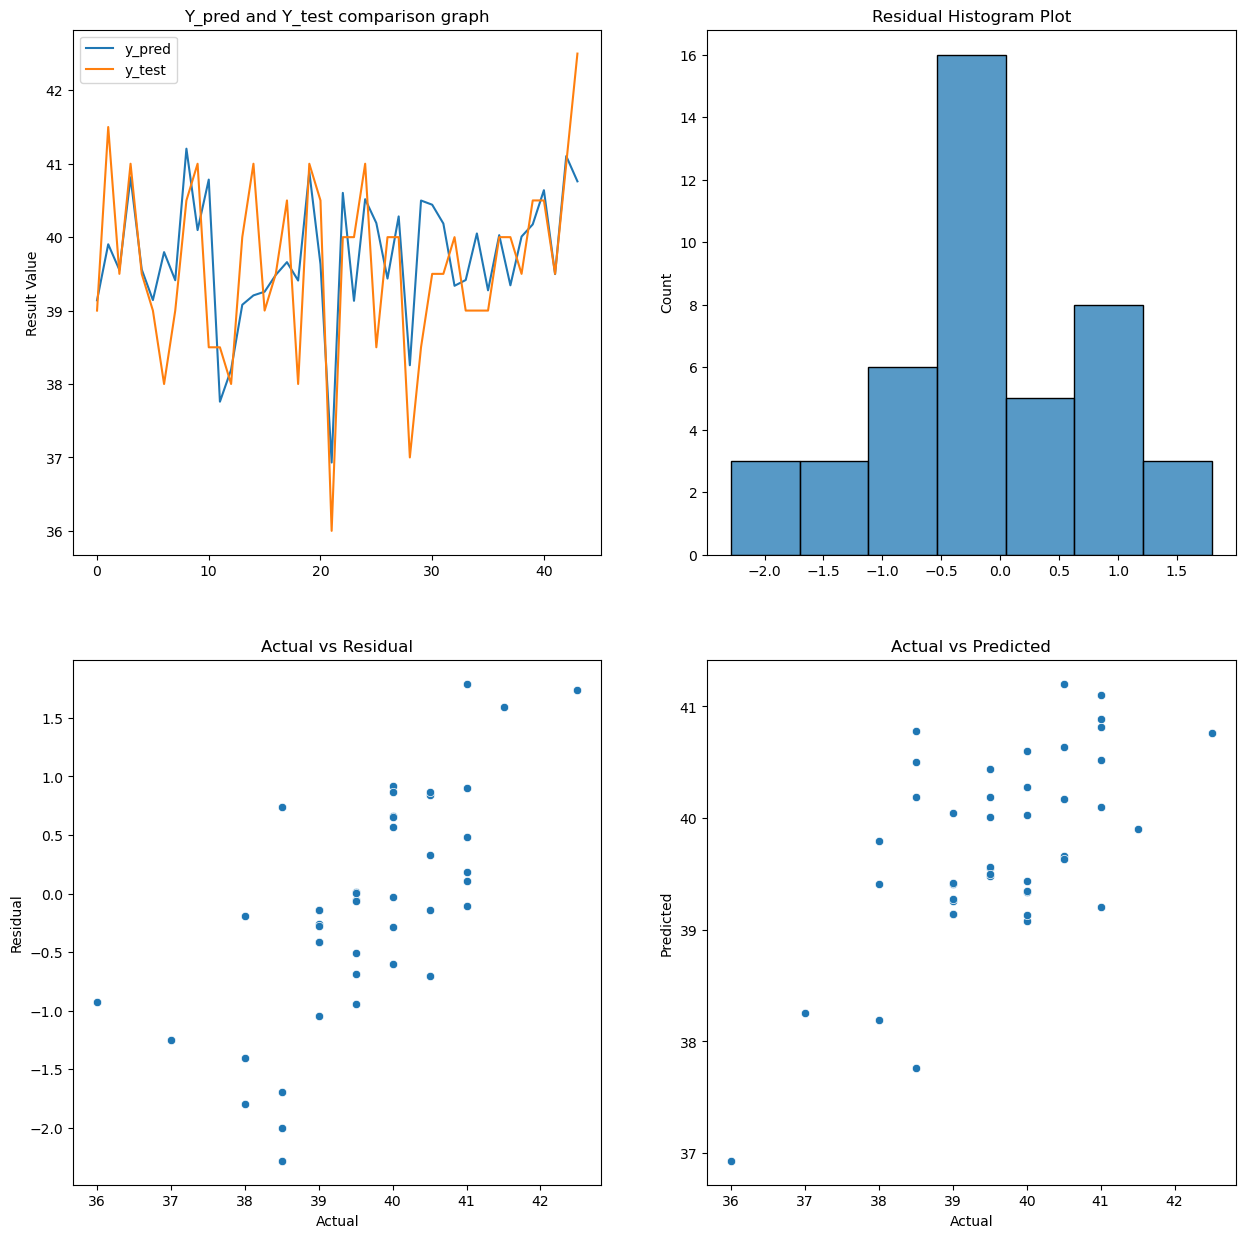

In [1326]:
plot_graph(y_test['Result Value'], y_pred)

In [1009]:
#threshold
lower_quantile = 0.25
upper_quantile = 0.75
lower_threshold = df_droped_date.quantile(lower_quantile)
upper_threshold = df_droped_date.quantile(upper_quantile)
outlier_percentage = ((df_droped_date<lower_threshold) | (df_droped_date>upper_threshold)).mean()*100

In [1010]:
print(outlier_percentage)

TOTAL CRUDE FLOW                                                            49.886105
TOTAL ATF KERO/DHDS FLOW                                                    50.113895
APS Overhead Pressure                                                       30.523918
FBS D/O TEMP                                                                49.658314
CRUDE API AT 15 DEGC                                                        50.113895
ATF- TOP SECTION PDT                                                        48.747153
11-T-1 REFLUX FLOW                                                          50.113895
 APS O/H TEMP                                                               49.886105
ATF STRIPPING STEAM                                                         50.113895
Nphtha Total flow                                                           50.113895
FBS TOTAL FLOW                                                              49.658314
TPA TO ATF STRIPPER FLOW                              

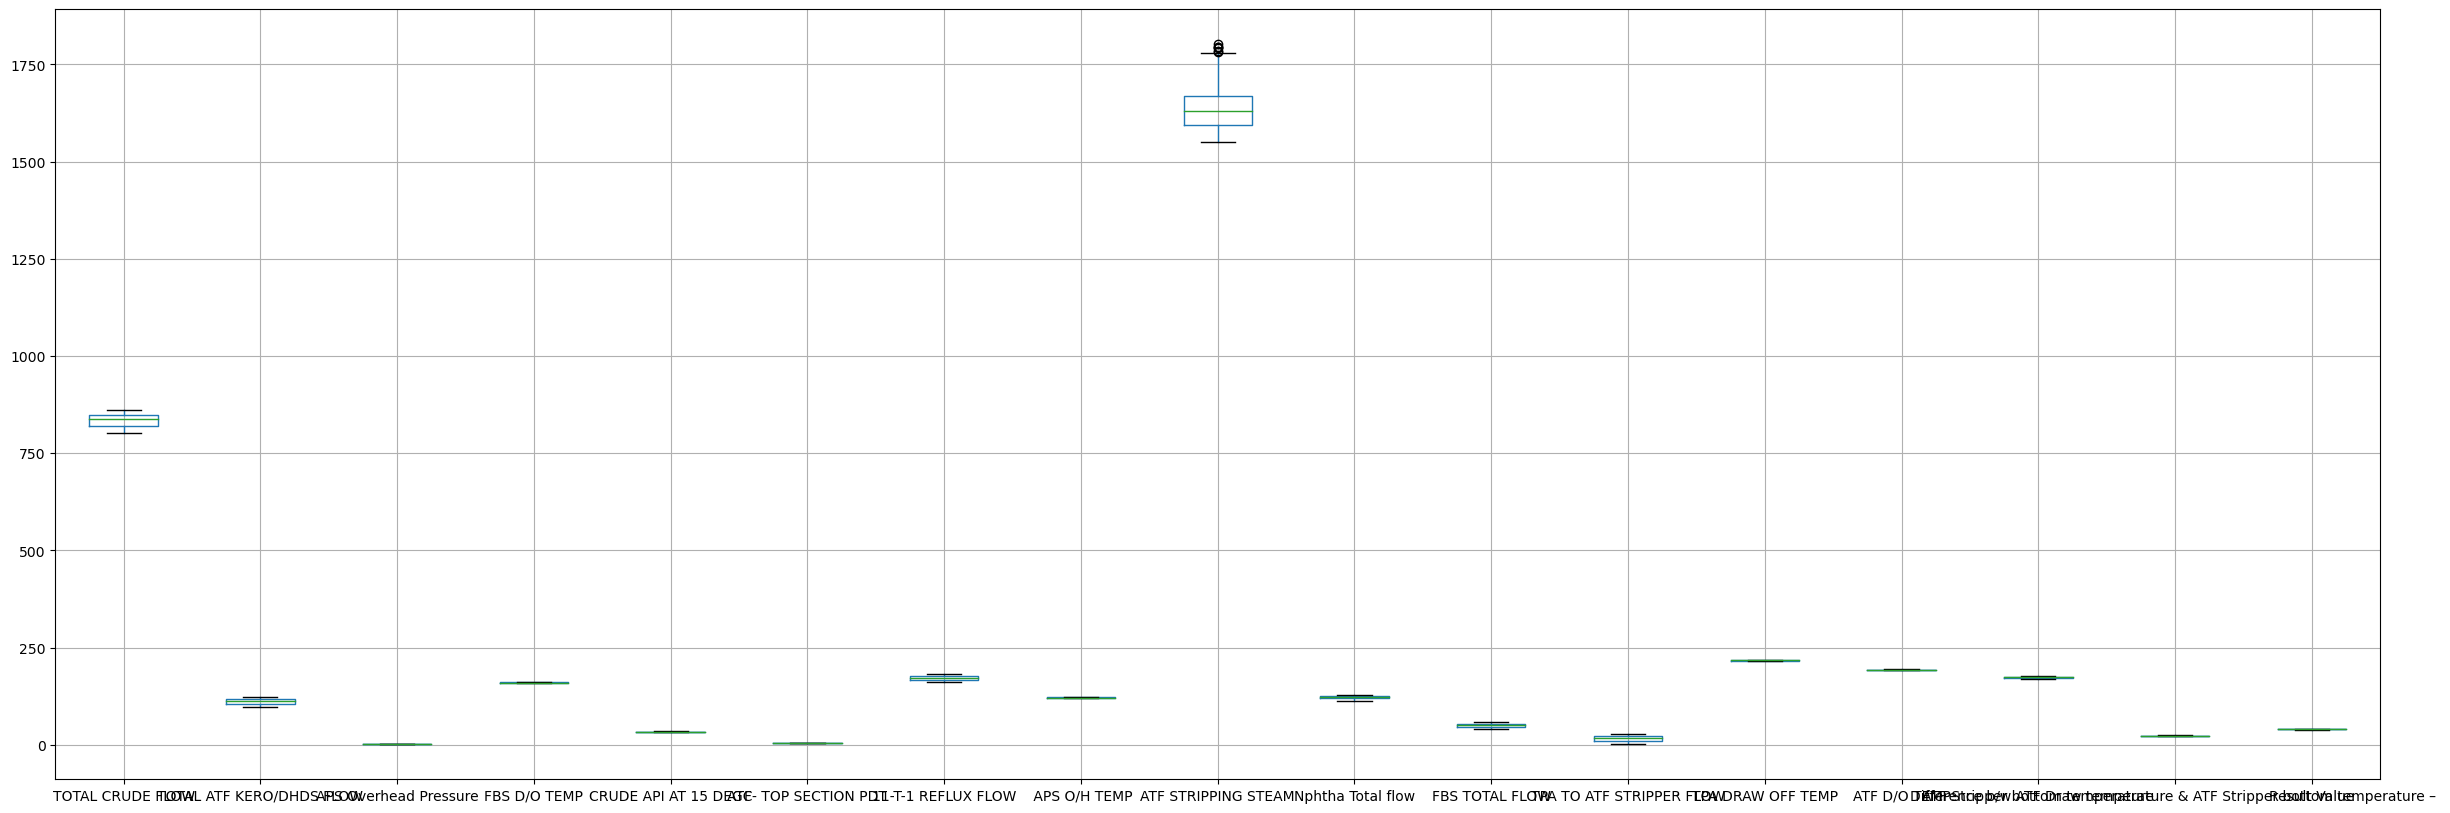

In [1011]:
df_cleaned = df[(df_droped_date >= lower_threshold) & (df_droped_date <= upper_threshold)]
df_cleaned.boxplot(figsize = (30,10))
plt.show()

In [1012]:
df_cleaned.shape

(439, 17)

In [1013]:
df_droped_date.shape

(439, 17)

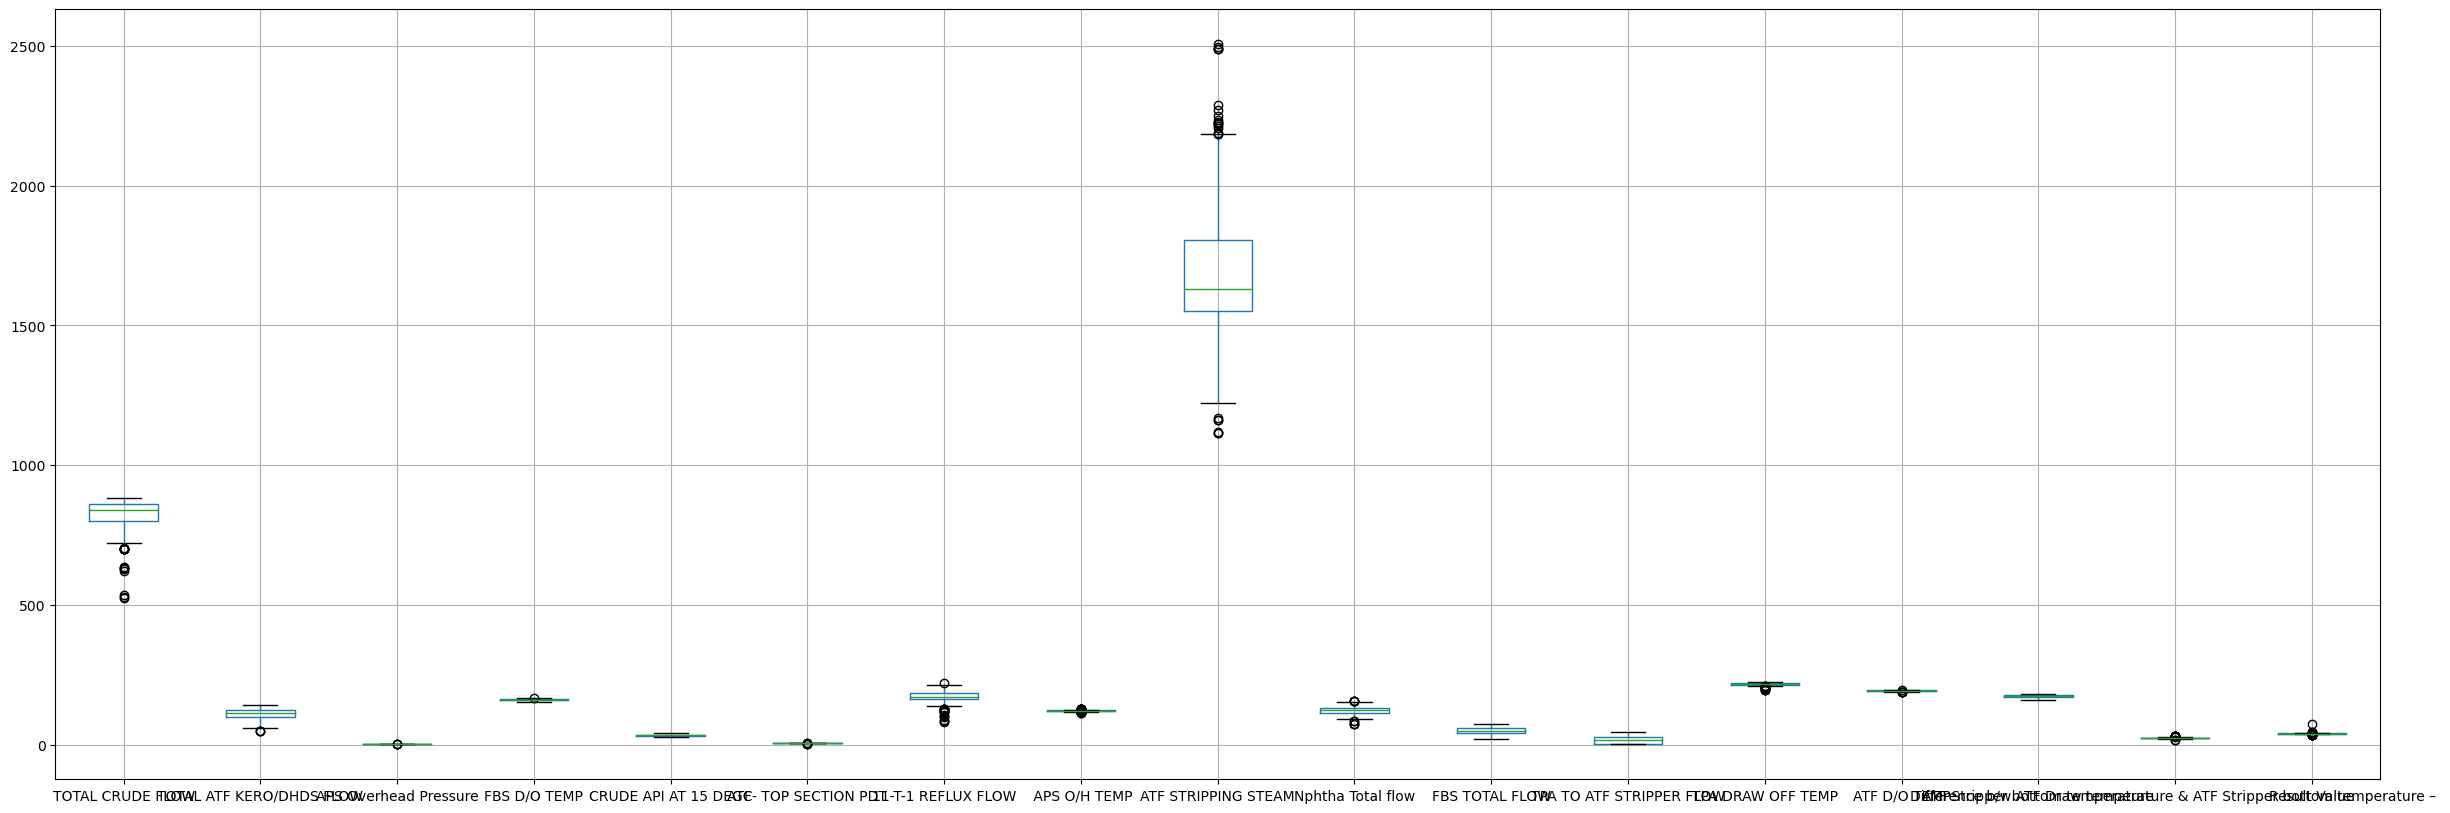

In [1014]:
df_droped_date.boxplot(figsize = (30,10))
plt.show()

In [1015]:
# pipe line, z-score(outlier detection) , bagging

In [1016]:

df_droped_date.dtypes

TOTAL CRUDE FLOW                                                            float64
TOTAL ATF KERO/DHDS FLOW                                                    float64
APS Overhead Pressure                                                       float64
FBS D/O TEMP                                                                float64
CRUDE API AT 15 DEGC                                                        float64
ATF- TOP SECTION PDT                                                        float64
11-T-1 REFLUX FLOW                                                          float64
 APS O/H TEMP                                                               float64
ATF STRIPPING STEAM                                                         float64
Nphtha Total flow                                                           float64
FBS TOTAL FLOW                                                              float64
TPA TO ATF STRIPPER FLOW                                                    

In [1017]:
def remove_outliers_zscore(df_droped_date, z_threshold):
    # Calculate z-scores for each column
    z_scores = np.abs((df_droped_date - df_droped_date.mean()) / df_droped_date.std())
    # Identify and remove outliers based on z-scores
    outliers = z_scores > z_threshold
    df = df_droped_date[~outliers]
    return df
    #df_cleaned = df_droped_date[~outliers.any(axis=1)]
    
    #return df_cleaned

In [1018]:
clean_df = remove_outliers_zscore(df_droped_date,2)
clean_df

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –,Result Value
0,812.32,131.95,1.66,164.26,38.30,5.82,188.13,123.70,2133.27,143.44,57.89,38.01,220.52,192.96,177.03,23.869034,39.0
1,811.88,132.23,1.65,163.36,38.41,5.73,183.09,123.29,NaN,143.50,57.93,37.98,219.87,191.51,175.65,24.005752,41.5
2,807.45,131.99,1.64,163.31,38.34,5.70,179.98,123.19,NaN,145.54,57.99,38.04,219.35,191.37,175.64,23.793938,38.0
3,800.78,134.09,1.63,164.36,38.49,6.03,187.31,124.29,NaN,146.60,58.54,38.01,222.32,193.59,176.55,25.183988,38.5
4,811.73,133.98,1.63,162.91,38.41,5.85,176.66,123.89,NaN,NaN,56.95,38.00,220.24,190.97,173.85,25.421687,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,873.93,110.22,1.50,160.69,33.51,5.58,171.22,122.81,1563.09,124.37,47.12,3.38,220.86,194.62,173.03,22.394674,39.0
435,875.07,94.07,1.40,159.79,32.48,5.56,155.03,122.90,1545.17,119.34,43.10,3.39,214.72,191.49,168.74,23.587139,40.0
436,875.58,100.27,1.40,158.46,31.56,5.32,155.82,123.04,1535.01,118.06,34.92,3.29,216.80,192.37,170.28,22.891583,39.0
437,876.73,97.97,1.40,158.44,31.79,5.55,166.03,123.40,1757.03,115.03,34.02,3.14,217.25,191.90,167.37,25.342483,39.5


In [1019]:
clean_df.isna().sum()

TOTAL CRUDE FLOW                                                            18
TOTAL ATF KERO/DHDS FLOW                                                    10
APS Overhead Pressure                                                       31
FBS D/O TEMP                                                                 9
CRUDE API AT 15 DEGC                                                        12
ATF- TOP SECTION PDT                                                        14
11-T-1 REFLUX FLOW                                                          21
 APS O/H TEMP                                                               40
ATF STRIPPING STEAM                                                         26
Nphtha Total flow                                                           32
FBS TOTAL FLOW                                                               8
TPA TO ATF STRIPPER FLOW                                                     2
TPA DRAW OFF TEMP                                   

In [1020]:
clean_df.fillna(0)

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –,Result Value
0,812.32,131.95,1.66,164.26,38.30,5.82,188.13,123.70,2133.27,143.44,57.89,38.01,220.52,192.96,177.03,23.869034,39.0
1,811.88,132.23,1.65,163.36,38.41,5.73,183.09,123.29,0.00,143.50,57.93,37.98,219.87,191.51,175.65,24.005752,41.5
2,807.45,131.99,1.64,163.31,38.34,5.70,179.98,123.19,0.00,145.54,57.99,38.04,219.35,191.37,175.64,23.793938,38.0
3,800.78,134.09,1.63,164.36,38.49,6.03,187.31,124.29,0.00,146.60,58.54,38.01,222.32,193.59,176.55,25.183988,38.5
4,811.73,133.98,1.63,162.91,38.41,5.85,176.66,123.89,0.00,0.00,56.95,38.00,220.24,190.97,173.85,25.421687,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,873.93,110.22,1.50,160.69,33.51,5.58,171.22,122.81,1563.09,124.37,47.12,3.38,220.86,194.62,173.03,22.394674,39.0
435,875.07,94.07,1.40,159.79,32.48,5.56,155.03,122.90,1545.17,119.34,43.10,3.39,214.72,191.49,168.74,23.587139,40.0
436,875.58,100.27,1.40,158.46,31.56,5.32,155.82,123.04,1535.01,118.06,34.92,3.29,216.80,192.37,170.28,22.891583,39.0
437,876.73,97.97,1.40,158.44,31.79,5.55,166.03,123.40,1757.03,115.03,34.02,3.14,217.25,191.90,167.37,25.342483,39.5


In [1021]:
clean_df.shape

(439, 17)

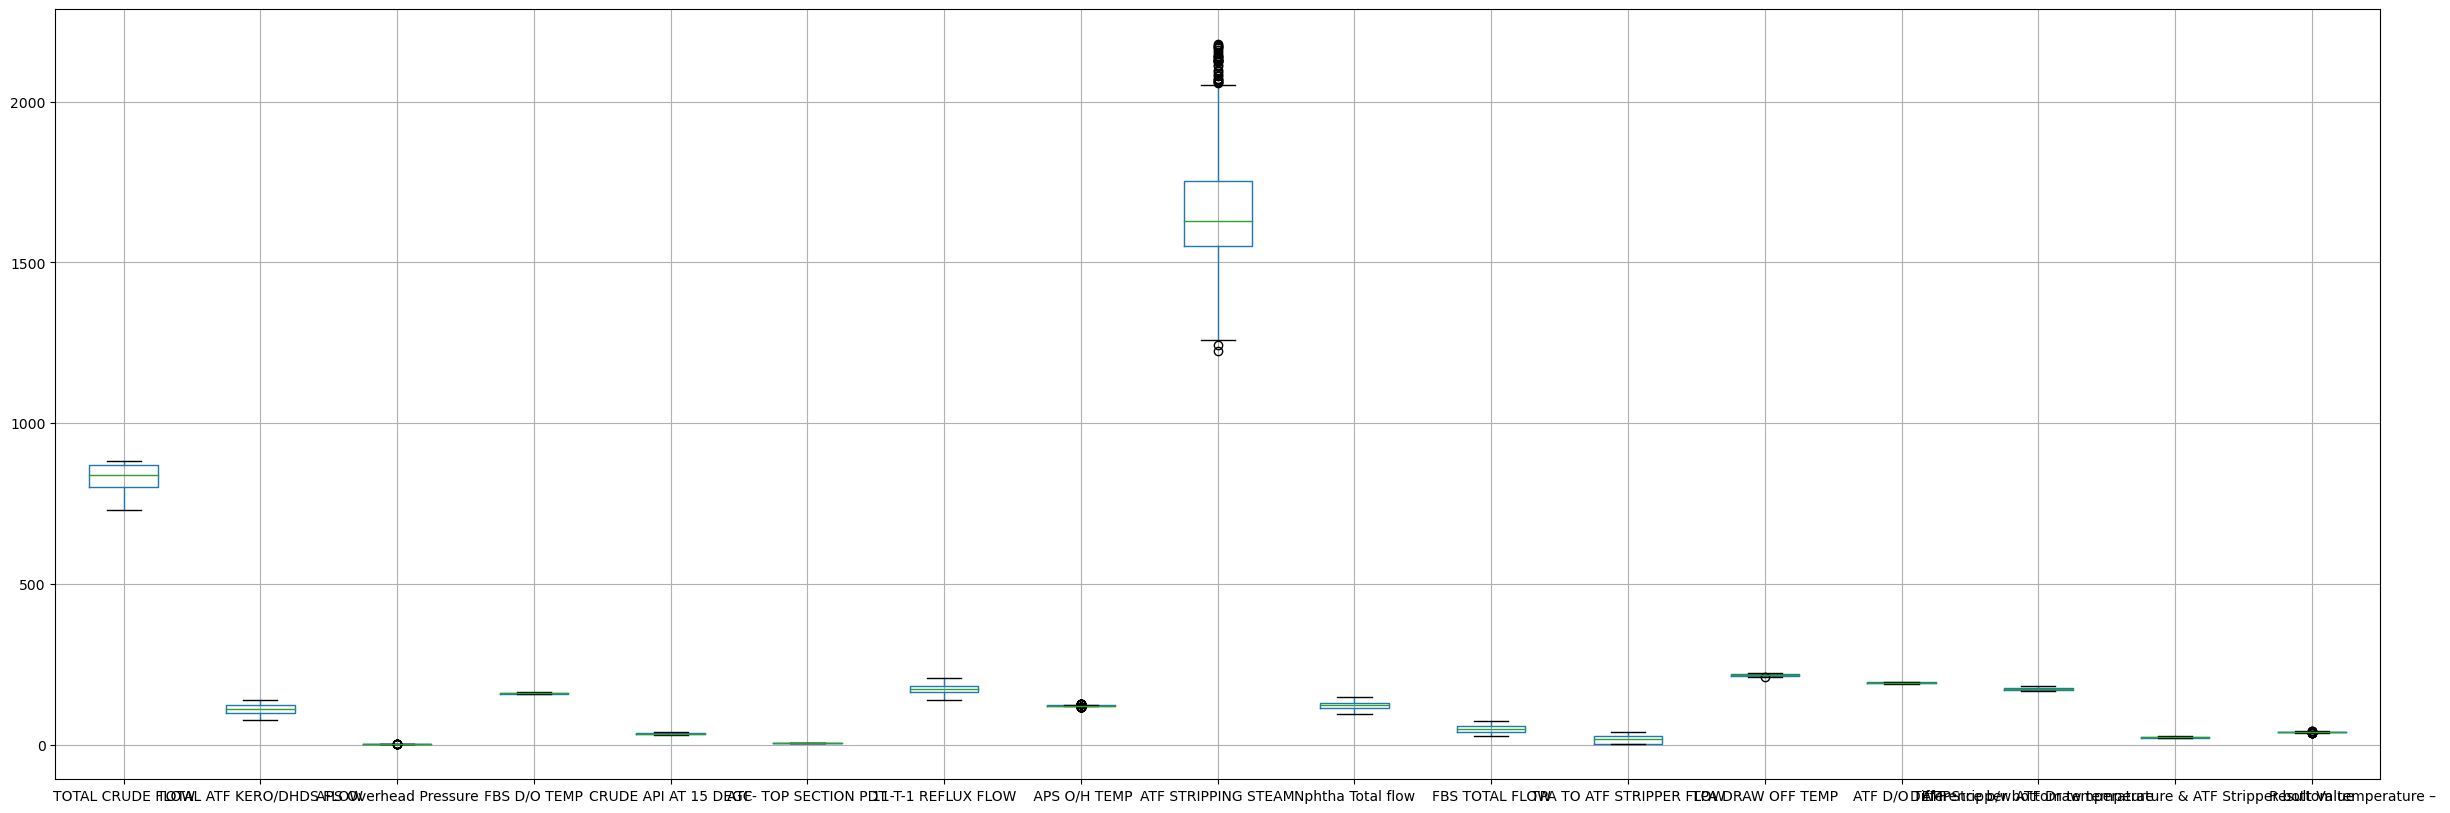

In [1022]:
clean_df.boxplot(figsize = (30,10))
plt.show()

In [1023]:
outliers = []
for col in df_droped_date.columns:
    sorted_col = sorted(df_droped_date[col])
    q1 = np.percentile(df_droped_date[col],25)
    q3 = np.percentile(df_droped_date[col], 75)
    #print(q1,q3)
    IQR = q3 - q1
    lwr_bound = q1 - (1.5*IQR)
    upr_bound = q3 + (1.5*IQR)
    #print(lwr_bound,upr_bound)
    df_cleaned_data =  df_droped_date[(df_droped_date[col] >= lwr_bound) & (df_droped_date[col] <= upr_bound)]

    for i in df_droped_date[col]:
        if (i < lwr_bound or i > upr_bound):
            outliers.append(i)
# print(outliers)
df_cleaned_data

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –,Result Value
0,812.32,131.95,1.66,164.26,38.30,5.82,188.13,123.70,2133.27,143.44,57.89,38.01,220.52,192.96,177.03,23.869034,39.0
1,811.88,132.23,1.65,163.36,38.41,5.73,183.09,123.29,2225.82,143.50,57.93,37.98,219.87,191.51,175.65,24.005752,41.5
2,807.45,131.99,1.64,163.31,38.34,5.70,179.98,123.19,2207.50,145.54,57.99,38.04,219.35,191.37,175.64,23.793938,38.0
3,800.78,134.09,1.63,164.36,38.49,6.03,187.31,124.29,2271.21,146.60,58.54,38.01,222.32,193.59,176.55,25.183988,38.5
4,811.73,133.98,1.63,162.91,38.41,5.85,176.66,123.89,2289.31,148.37,56.95,38.00,220.24,190.97,173.85,25.421687,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,873.93,110.22,1.50,160.69,33.51,5.58,171.22,122.81,1563.09,124.37,47.12,3.38,220.86,194.62,173.03,22.394674,39.0
435,875.07,94.07,1.40,159.79,32.48,5.56,155.03,122.90,1545.17,119.34,43.10,3.39,214.72,191.49,168.74,23.587139,40.0
436,875.58,100.27,1.40,158.46,31.56,5.32,155.82,123.04,1535.01,118.06,34.92,3.29,216.80,192.37,170.28,22.891583,39.0
437,876.73,97.97,1.40,158.44,31.79,5.55,166.03,123.40,1757.03,115.03,34.02,3.14,217.25,191.90,167.37,25.342483,39.5


In [1024]:
df_droped_date

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –,Result Value
0,812.32,131.95,1.66,164.26,38.30,5.82,188.13,123.70,2133.27,143.44,57.89,38.01,220.52,192.96,177.03,23.869034,39.0
1,811.88,132.23,1.65,163.36,38.41,5.73,183.09,123.29,2225.82,143.50,57.93,37.98,219.87,191.51,175.65,24.005752,41.5
2,807.45,131.99,1.64,163.31,38.34,5.70,179.98,123.19,2207.50,145.54,57.99,38.04,219.35,191.37,175.64,23.793938,38.0
3,800.78,134.09,1.63,164.36,38.49,6.03,187.31,124.29,2271.21,146.60,58.54,38.01,222.32,193.59,176.55,25.183988,38.5
4,811.73,133.98,1.63,162.91,38.41,5.85,176.66,123.89,2289.31,148.37,56.95,38.00,220.24,190.97,173.85,25.421687,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,873.93,110.22,1.50,160.69,33.51,5.58,171.22,122.81,1563.09,124.37,47.12,3.38,220.86,194.62,173.03,22.394674,39.0
435,875.07,94.07,1.40,159.79,32.48,5.56,155.03,122.90,1545.17,119.34,43.10,3.39,214.72,191.49,168.74,23.587139,40.0
436,875.58,100.27,1.40,158.46,31.56,5.32,155.82,123.04,1535.01,118.06,34.92,3.29,216.80,192.37,170.28,22.891583,39.0
437,876.73,97.97,1.40,158.44,31.79,5.55,166.03,123.40,1757.03,115.03,34.02,3.14,217.25,191.90,167.37,25.342483,39.5


In [1025]:
df_droped_date.shape

(439, 17)

In [1026]:
df_cleaned_data.shape

(426, 17)

In [1027]:
df_cleaned_data.to_clipboard()

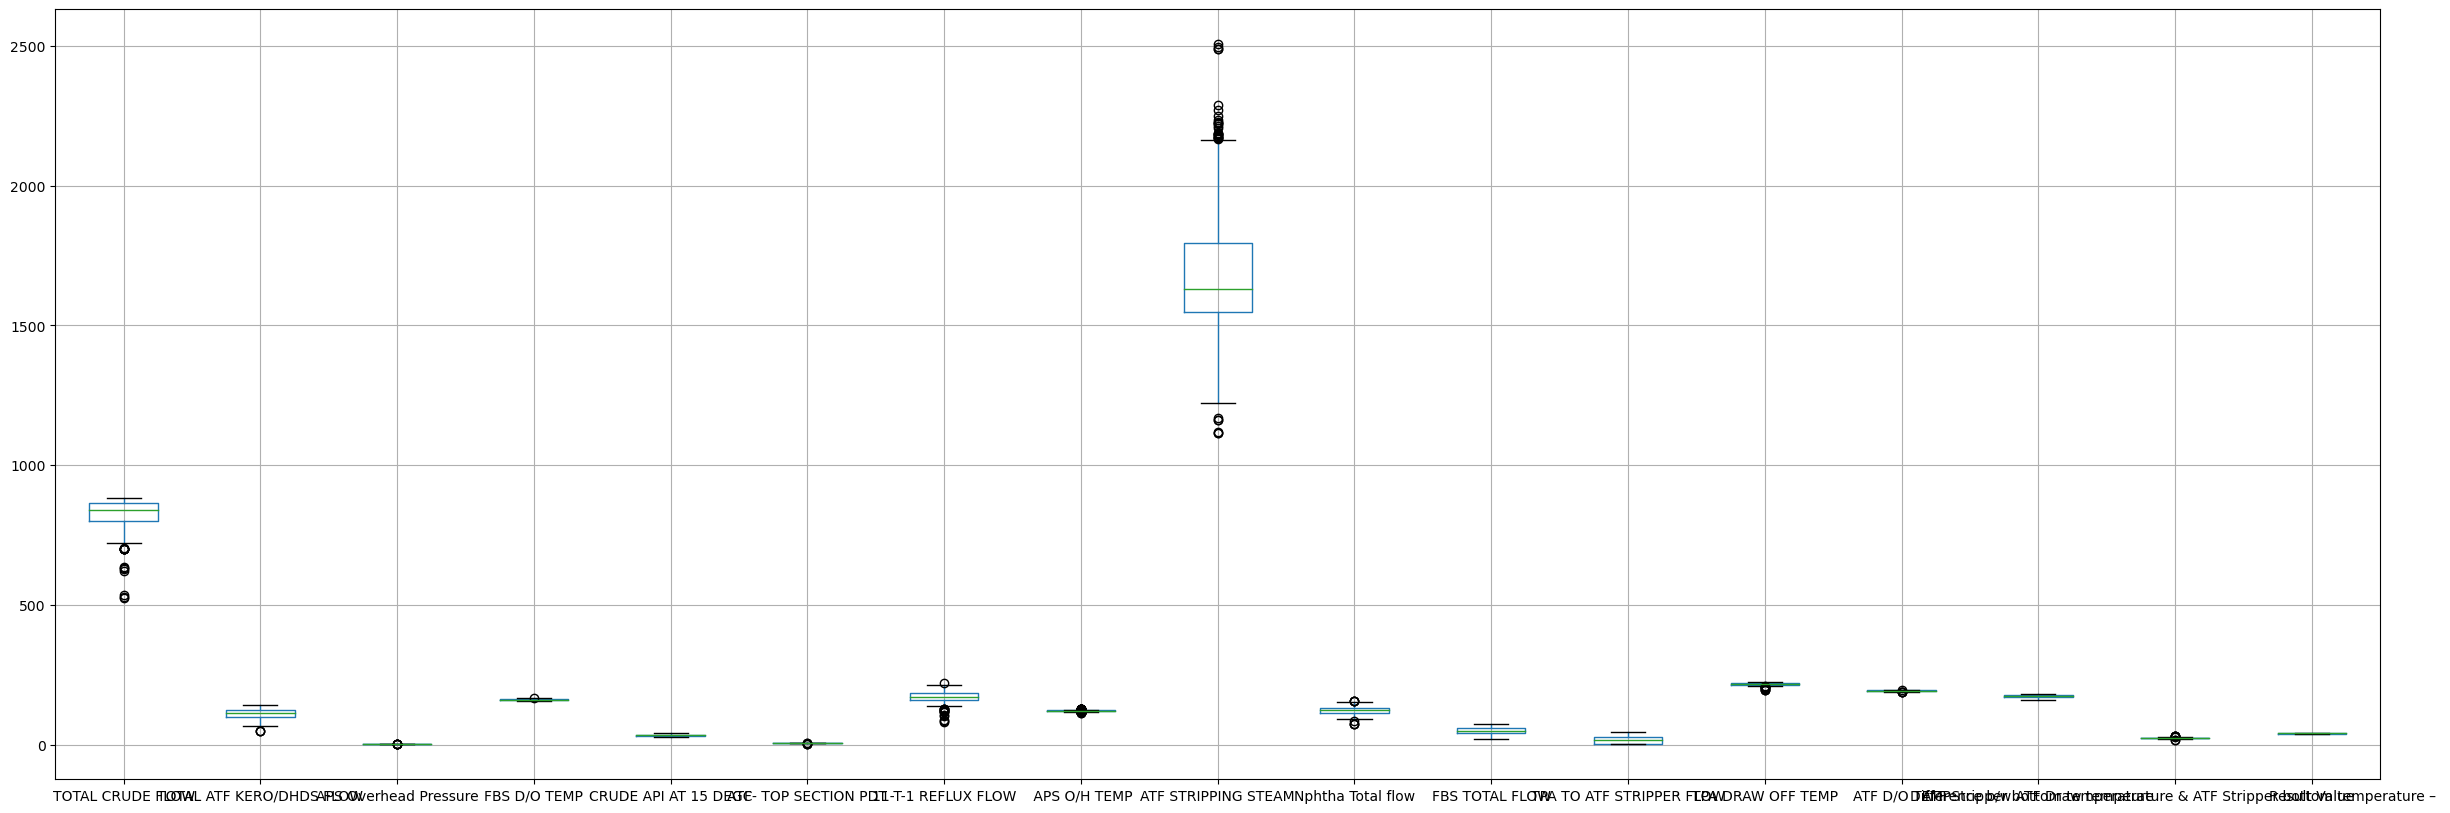

In [1028]:
df_cleaned_data.boxplot(figsize = (30,10))
plt.show()

In [1029]:
len(outliers)

206

In [1375]:
print(len(df_droped_date))

def remove_outliers(df, thresh =3):
    
    for col in df.columns:
        df['dummy_col'] = df[col].apply(lambda x: (x - np.mean(df[col]))/np.std(df[col]) if np.std(df[col]) !=0 else 0 )
        df = df[(df['dummy_col'] < thresh) & (df['dummy_col'] > -thresh)]
    df = df.drop(['dummy_col'], axis = 1)
    return df
d = remove_outliers(df_droped_date, thresh=3)
print(len(d))

439


C:\Users\ajeet\AppData\Local\Temp\ipykernel_2176\2877273246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dummy_col'] = df[col].apply(lambda x: (x - np.mean(df[col]))/np.std(df[col]) if np.std(df[col]) !=0 else 0 )


407


In [1376]:
d.shape

(407, 17)

In [1397]:
#d.to_csv("ATF_wo_outlier_407")

In [1378]:
df_droped_date.shape

(439, 18)

In [1379]:
d.skew()

TOTAL CRUDE FLOW                                                           -1.023535
TOTAL ATF KERO/DHDS FLOW                                                   -0.252371
APS Overhead Pressure                                                       1.066894
FBS D/O TEMP                                                                0.169595
CRUDE API AT 15 DEGC                                                        0.144880
ATF- TOP SECTION PDT                                                       -0.251239
11-T-1 REFLUX FLOW                                                          0.144898
 APS O/H TEMP                                                              -0.565215
ATF STRIPPING STEAM                                                         0.702255
Nphtha Total flow                                                           0.330498
FBS TOTAL FLOW                                                             -0.216052
TPA TO ATF STRIPPER FLOW                                         

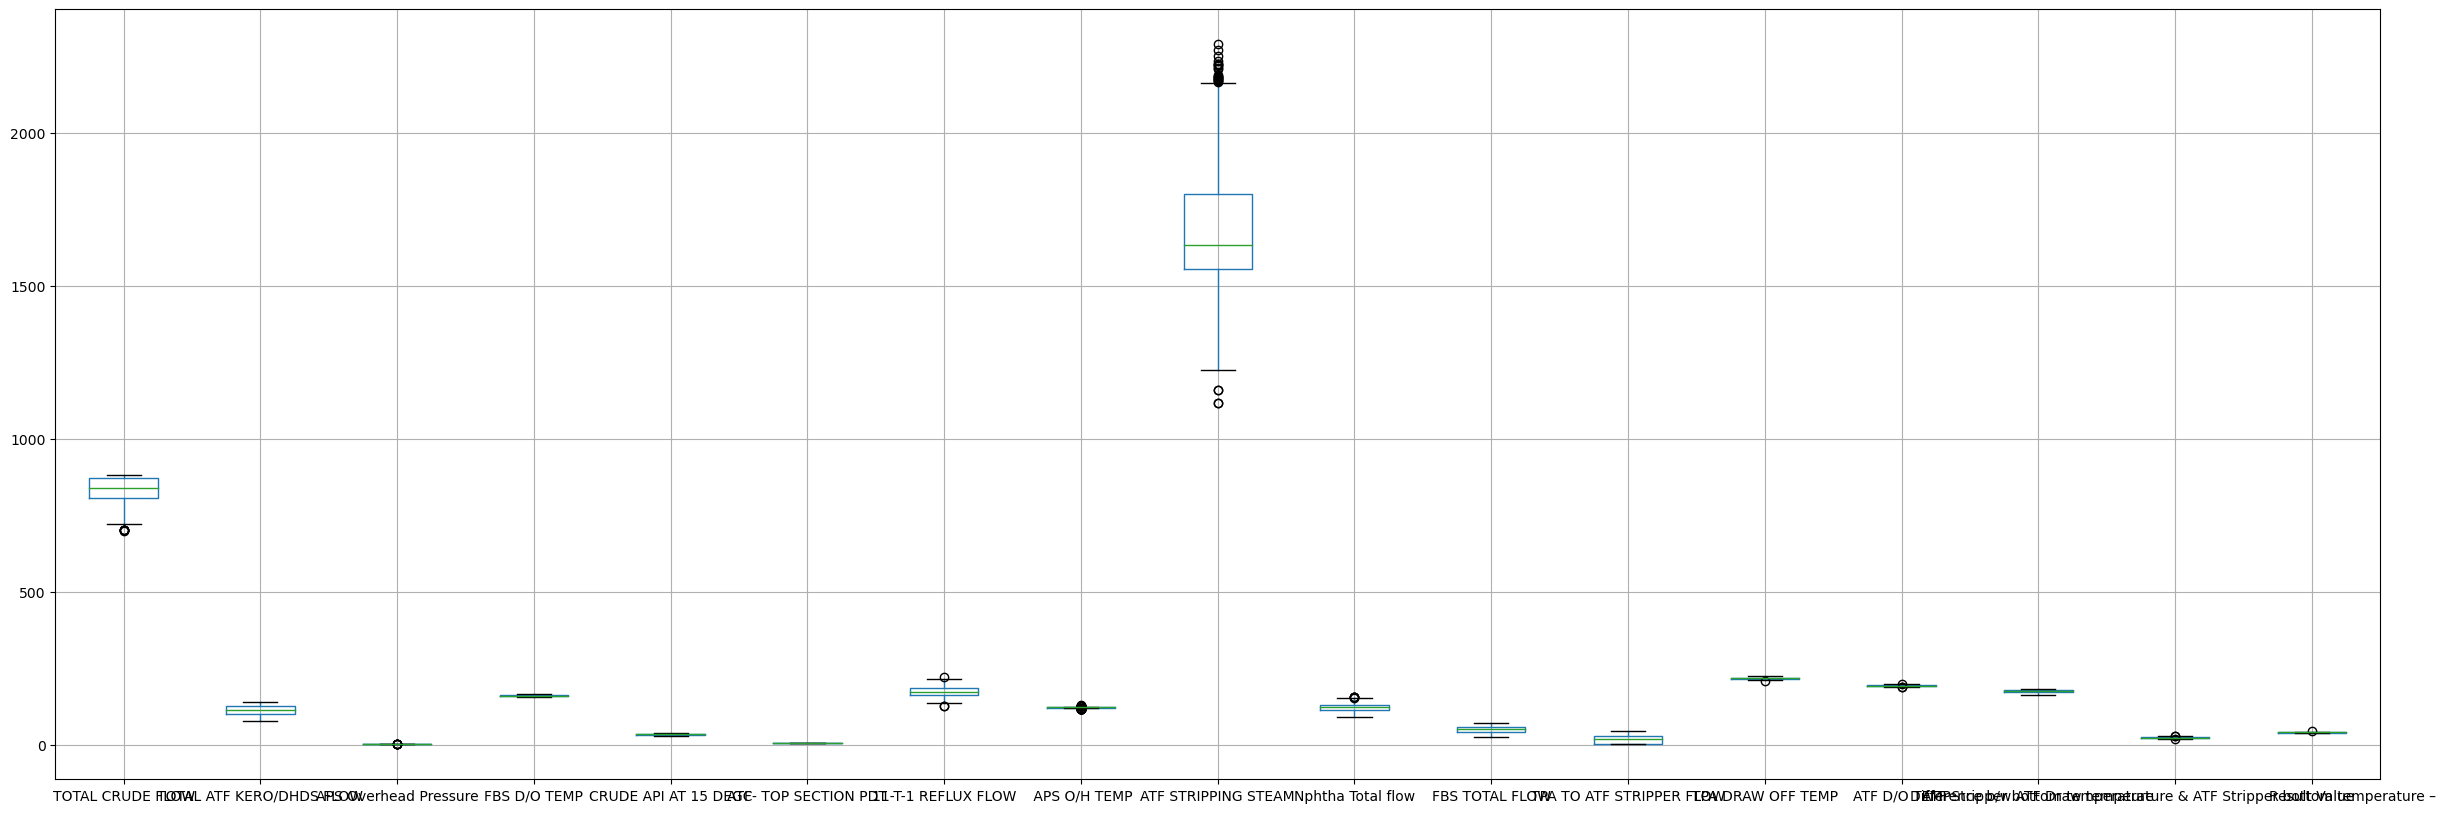

In [1380]:
d.boxplot(figsize = (30,10))
plt.show()

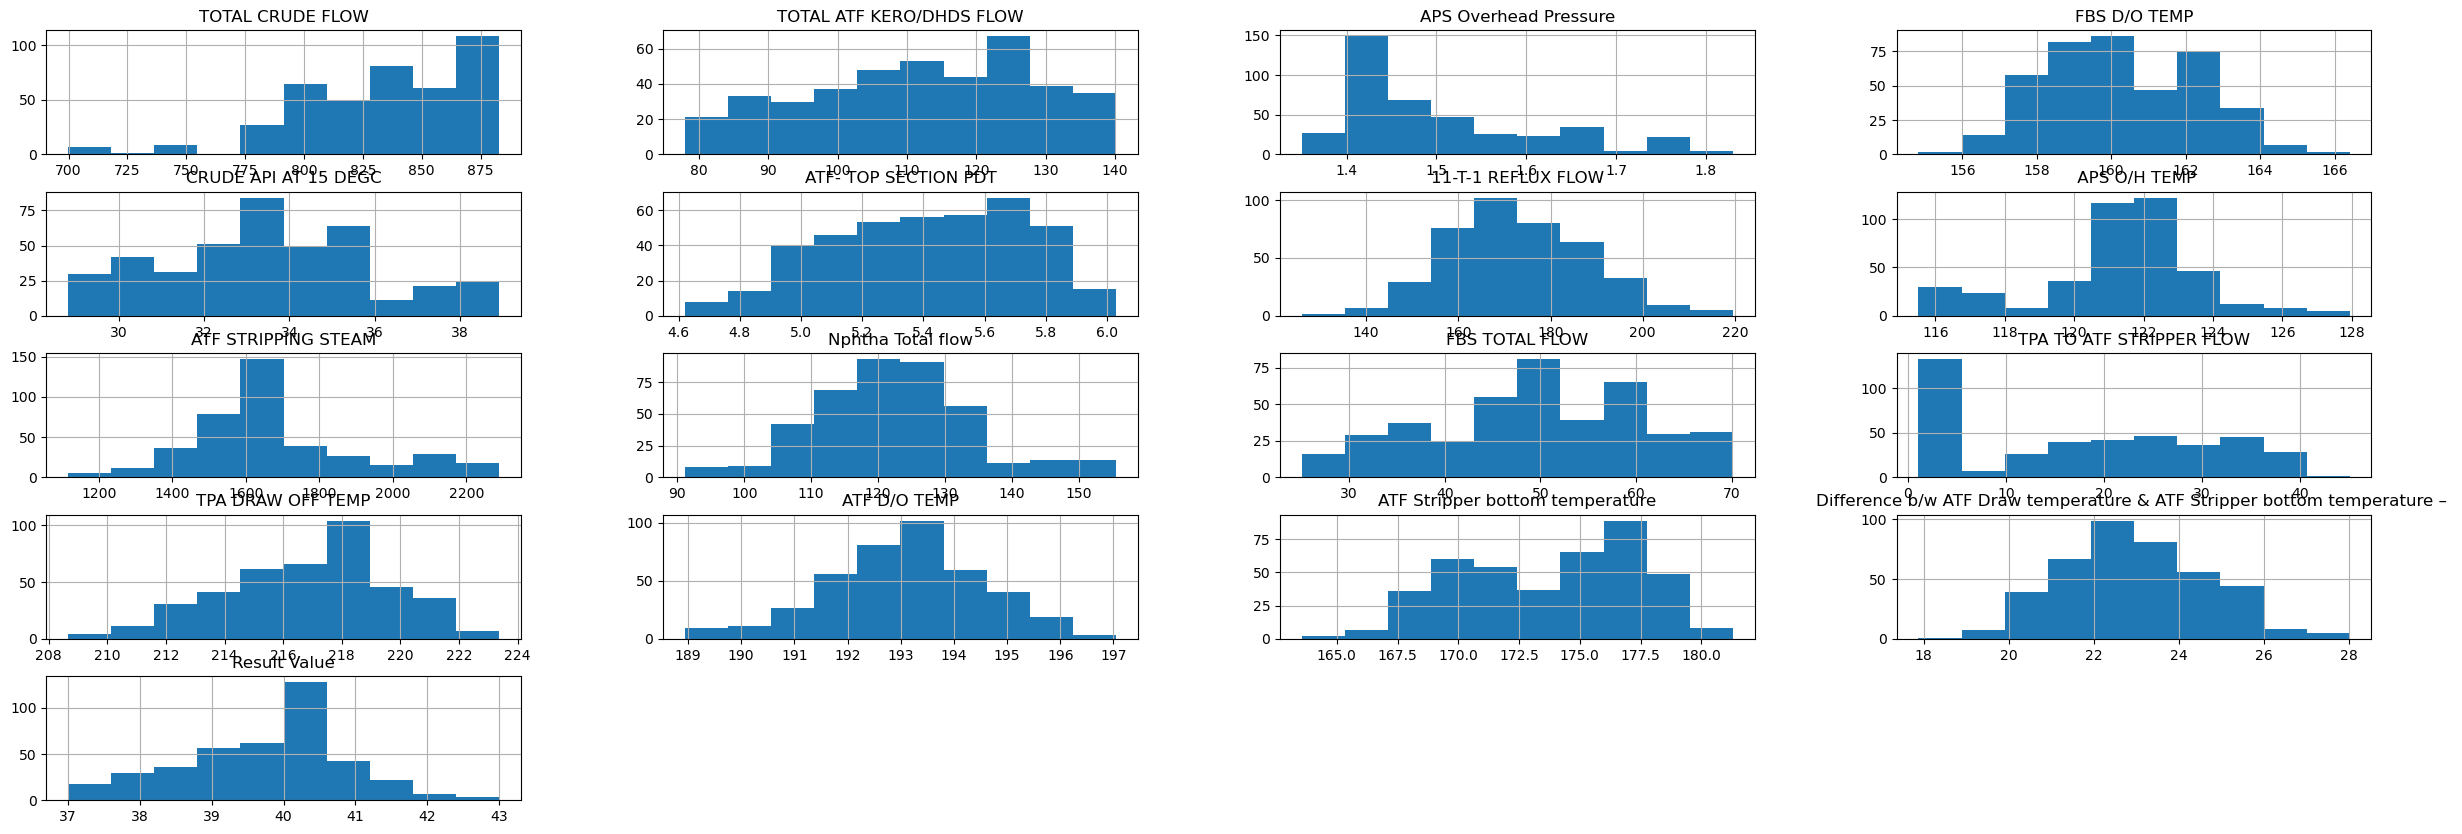

In [1381]:
d.hist(figsize = (30,10))
plt.show()

In [1382]:
def remove_outlier(df):
    df_copy = df.copy()
    for i in range(0,len(df_copy.columns)):
        column=df_copy.iloc[:,i]
        if column.skew()>-0.2 or column.skew()<0.2:
            upper_limit=column.mean()+3*column.std()
            lower_limit=column.mean()-3*column.std()
            column=np.where(column>upper_limit,upper_limit,np.where(column<lower_limit,lower_limit,column))
        else:
            percentile25=column.quantile(0.25)
            percentile75=column.quantile(0.75) 
            iqr=percentile75-percentile25
            upper_limit=percentile75 + 1.5*iqr
            lower_limit=percentile25 - 1.5*iqr
            column=np.where(column>upper_limit,upper_limit,np.where(column<lower_limit,lower_limit,column))
        
    return df_copy

In [1383]:
data_w_o_outlier = remove_outlier(df_droped_date)
data_w_o_outlier

,TOTAL CRUDE FLOW,TOTAL ATF KERO/DHDS FLOW,APS Overhead Pressure,FBS D/O TEMP,CRUDE API AT 15 DEGC,ATF- TOP SECTION PDT,11-T-1 REFLUX FLOW,APS O/H TEMP,ATF STRIPPING STEAM,Nphtha Total flow,FBS TOTAL FLOW,TPA TO ATF STRIPPER FLOW,TPA DRAW OFF TEMP,ATF D/O TEMP,ATF Stripper bottom temperature,Difference b/w ATF Draw temperature & ATF Stripper bottom temperature –,Result Value,dummy_col
0,812.32,131.95,1.66,164.26,38.30,5.82,188.13,123.70,2133.27,143.44,57.89,38.01,220.52,192.96,177.03,23.869034,39.0,-0.342752
1,811.88,132.23,1.65,163.36,38.41,5.73,183.09,123.29,2225.82,143.50,57.93,37.98,219.87,191.51,175.65,24.005752,41.5,-0.352751
2,807.45,131.99,1.64,163.31,38.34,5.70,179.98,123.19,2207.50,145.54,57.99,38.04,219.35,191.37,175.64,23.793938,38.0,-0.453417
3,800.78,134.09,1.63,164.36,38.49,6.03,187.31,124.29,2271.21,146.60,58.54,38.01,222.32,193.59,176.55,25.183988,38.5,-0.604985
4,811.73,133.98,1.63,162.91,38.41,5.85,176.66,123.89,2289.31,148.37,56.95,38.00,220.24,190.97,173.85,25.421687,39.0,-0.356160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,873.93,110.22,1.50,160.69,33.51,5.58,171.22,122.81,1563.09,124.37,47.12,3.38,220.86,194.62,173.03,22.394674,39.0,1.057261
435,875.07,94.07,1.40,159.79,32.48,5.56,155.03,122.90,1545.17,119.34,43.10,3.39,214.72,191.49,168.74,23.587139,40.0,1.083166
436,875.58,100.27,1.40,158.46,31.56,5.32,155.82,123.04,1535.01,118.06,34.92,3.29,216.80,192.37,170.28,22.891583,39.0,1.094756
437,876.73,97.97,1.40,158.44,31.79,5.55,166.03,123.40,1757.03,115.03,34.02,3.14,217.25,191.90,167.37,25.342483,39.5,1.120888


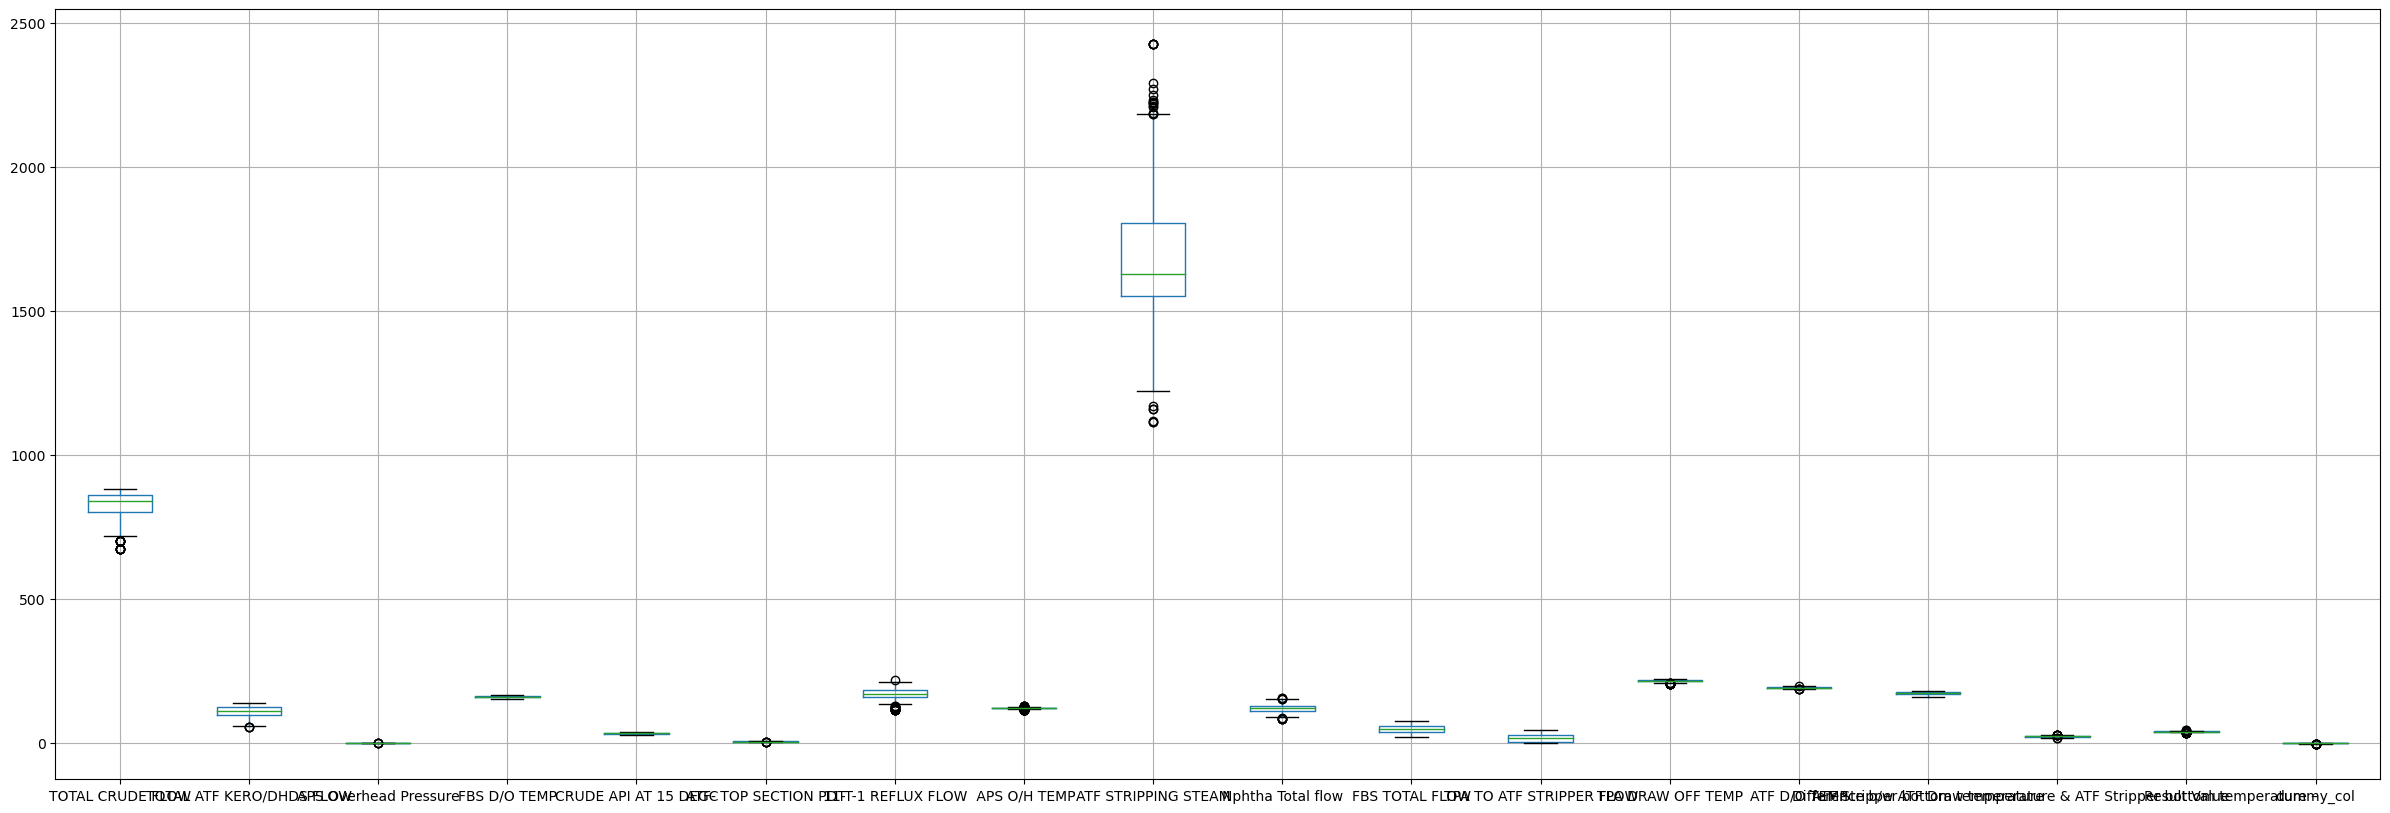

In [1384]:
data_w_o_outlier.boxplot(figsize = (30,10))
plt.show()

In [1385]:
data_w_o_outlier.shape

(439, 18)

In [1386]:
df_droped_date.shape

(439, 18)

In [1387]:
for column in df_droped_date.columns:
    print(column, end = "")

TOTAL CRUDE FLOWTOTAL ATF KERO/DHDS FLOWAPS Overhead PressureFBS D/O TEMPCRUDE API AT 15 DEGCATF- TOP SECTION PDT11-T-1 REFLUX FLOW APS O/H TEMPATF STRIPPING STEAMNphtha Total flowFBS TOTAL FLOWTPA TO ATF STRIPPER FLOWTPA DRAW OFF TEMPATF D/O TEMPATF Stripper bottom temperatureDifference b/w ATF Draw temperature & ATF Stripper bottom temperature – Result Valuedummy_col

In [1388]:

def remove_outliers(df):
    for column in df_droped_date.columns:
        if df_droped_date[column].skew()>-0.2 or df_droped_date[column].skew()<0.2:
            upper_limit=df_droped_date[column].mean()+3*df_droped_date[column].std()
            lower_limit=df_droped_date[column].mean()-3*df_droped_date[column].std()
            df_droped_date[column]=np.where(df_droped_date[column]>upper_limit
                                            ,upper_limit,np.where(df_droped_date[column]<lower_limit,
                                                                  lower_limit,df_droped_date[column]))
        else:
            percentile25=df_droped_date.column.quantile(0.25)
            percentile75=df_droped_date.column.quantile(0.75) 
            iqr=percentile75-percentile25
            upper_limit=percentile75 + 1.5*iqr
            lower_limit=percentile25 - 1.5*iqr
            df_droped_date[column]=np.where(df_droped_date[column]>upper_limit,
                                            upper_limit,np.where(df_droped_date[column]<lower_limit,
                                                                 lower_limit,df_droped_date.column))
        
    return df

In [1389]:
dd = remove_outliers(df_droped_date)

In [1390]:
dd.shape

(439, 18)

In [1391]:
df_droped_date.shape

(439, 18)

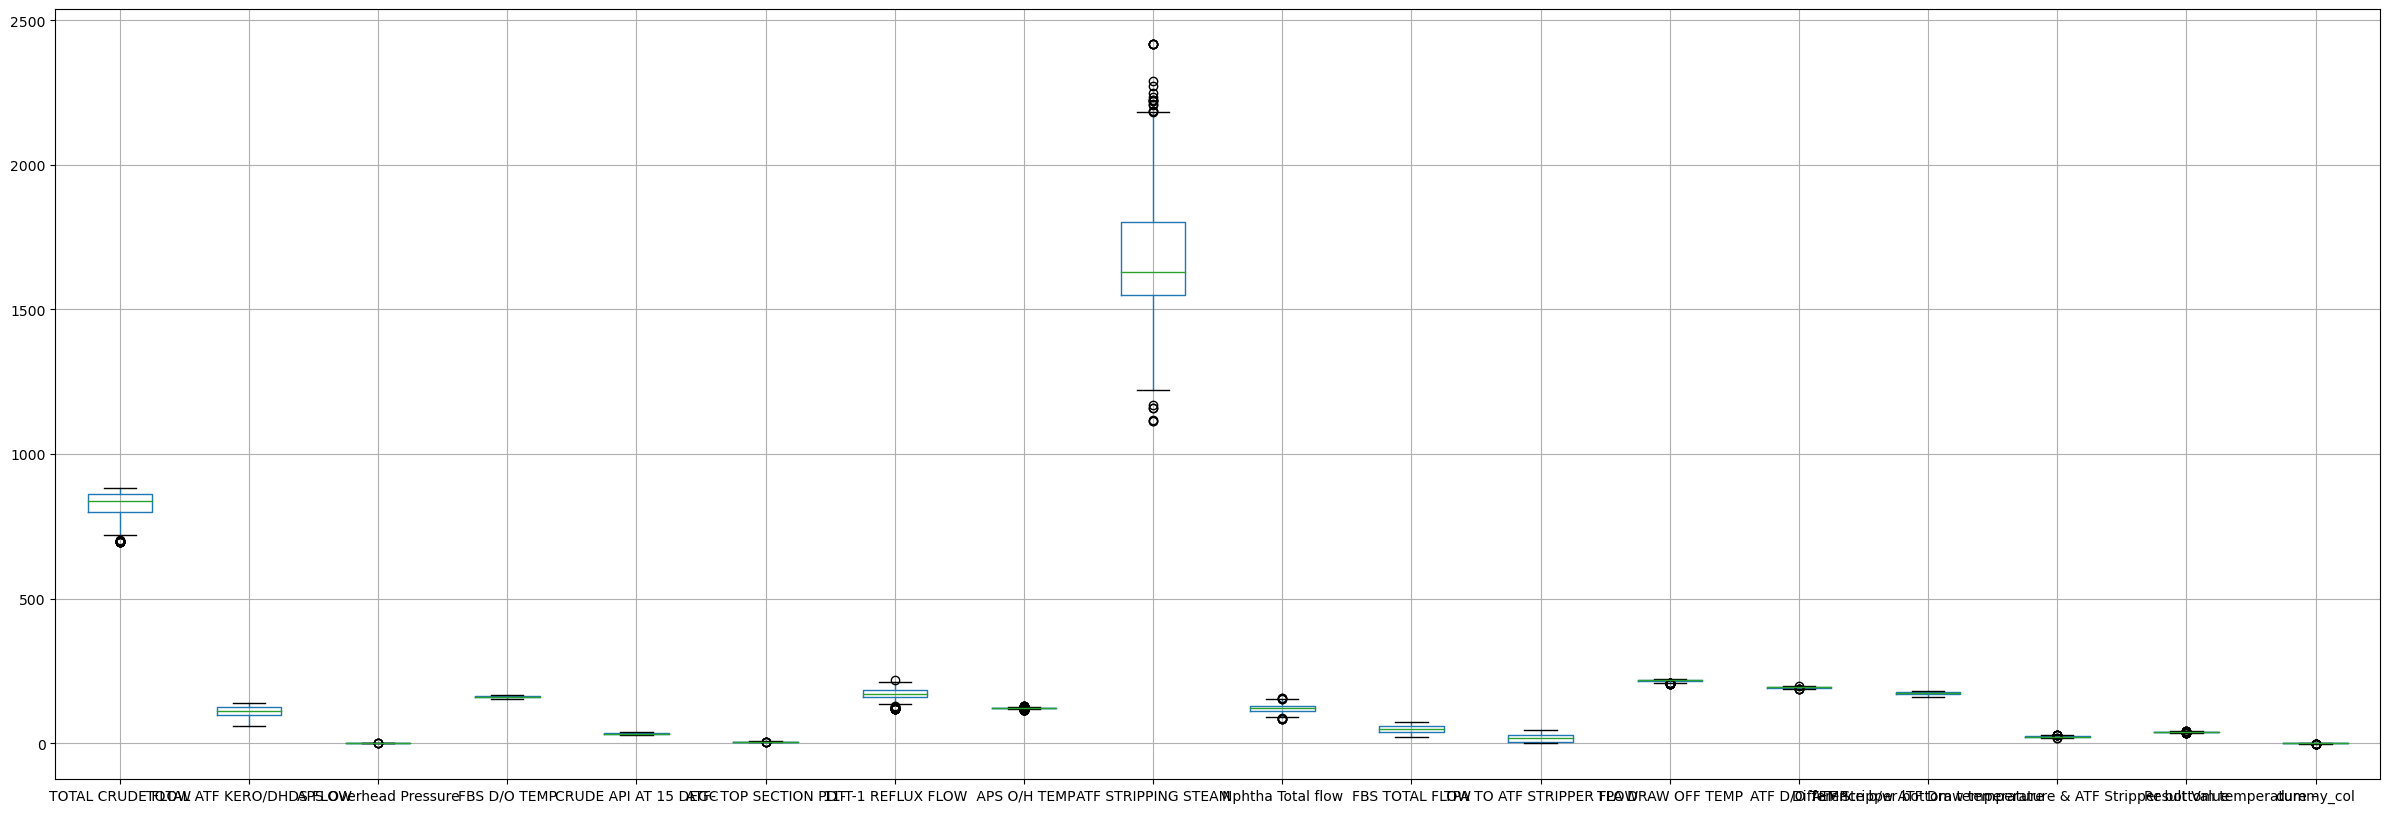

In [1392]:
dd.boxplot(figsize =(30,10))
plt.show()

In [1393]:
#normal dist and std dist

In [1394]:
data_w_o_outlier.drop(columns = "dummy_col", inplace = True )

In [1395]:
df = data_w_o_outlier
N = int( len(df)*0.9)
df = df.sample(frac = 1)
df_test = df.iloc[N:]
df_train = df.iloc[0:N]
x_train, y_train = df_train.drop(['Result Value'], axis = 1),  df_train[['Result Value']]
x_test, y_test = df_test.drop(['Result Value'], axis = 1), df_test[['Result Value']]
mdl = random_forest(n_estimators=1000)
mdl.fit(x_train, y_train)

[DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTreeRegressor(),
 DecisionTre

In [1396]:
y_pred = mdl.predict(X_test)

In [1351]:
mean_absolute_error(y_test["Result Value"], y_pred)
get_model_evaluation(mdl,y_test["Result Value"], y_pred)

Mean Squared Error = 2.408
Mean Absolute Error = 1.276
Root Mean Squared Error = 1.552
R2_Score Value = 0.396


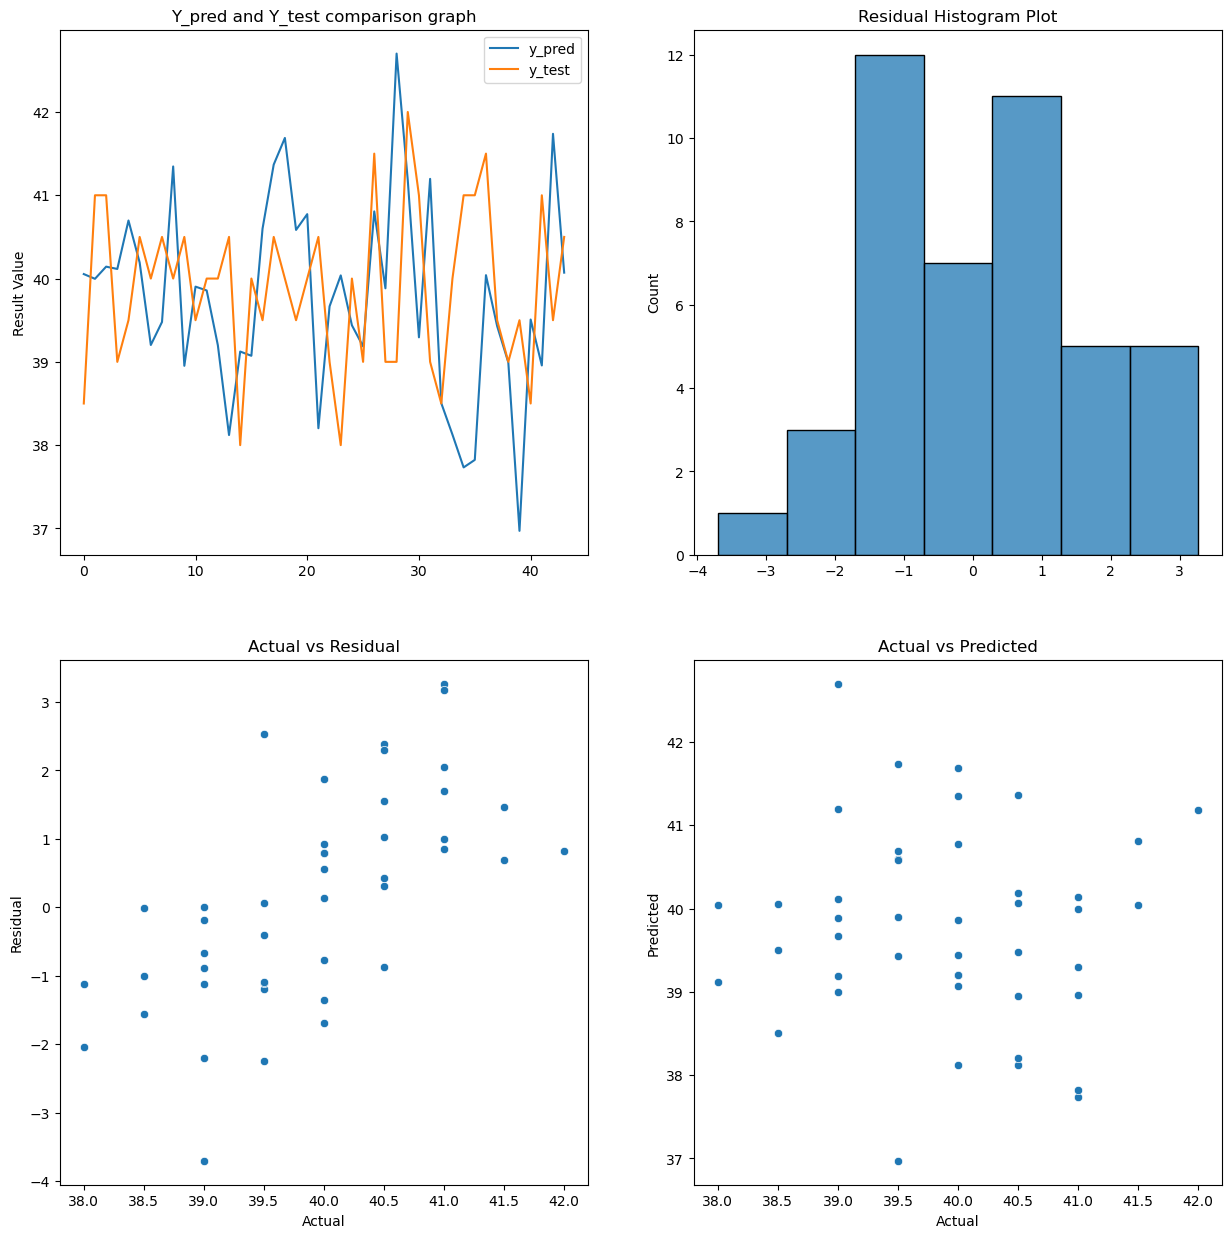

In [1053]:
plot_graph(y_test["Result Value"], y_pred)

fitting random forrest after dealing with outlier

In [1352]:
X = data_w_o_outlier.drop(columns = "Result Value")
y = data_w_o_outlier["Result Value"]

In [1353]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.10,random_state = 0)

In [1354]:
regressor  = RandomForestRegressor()

In [1355]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [1356]:
y_pred = regressor.predict(X_test)

In [1359]:
mse = mean_absolute_error(y_test, y_pred)
mse
get_model_evaluation(regressor, y_test, y_pred)

Mean Squared Error = 1.38
Mean Absolute Error = 0.901
Root Mean Squared Error = 1.175
R2_Score Value = 0.396


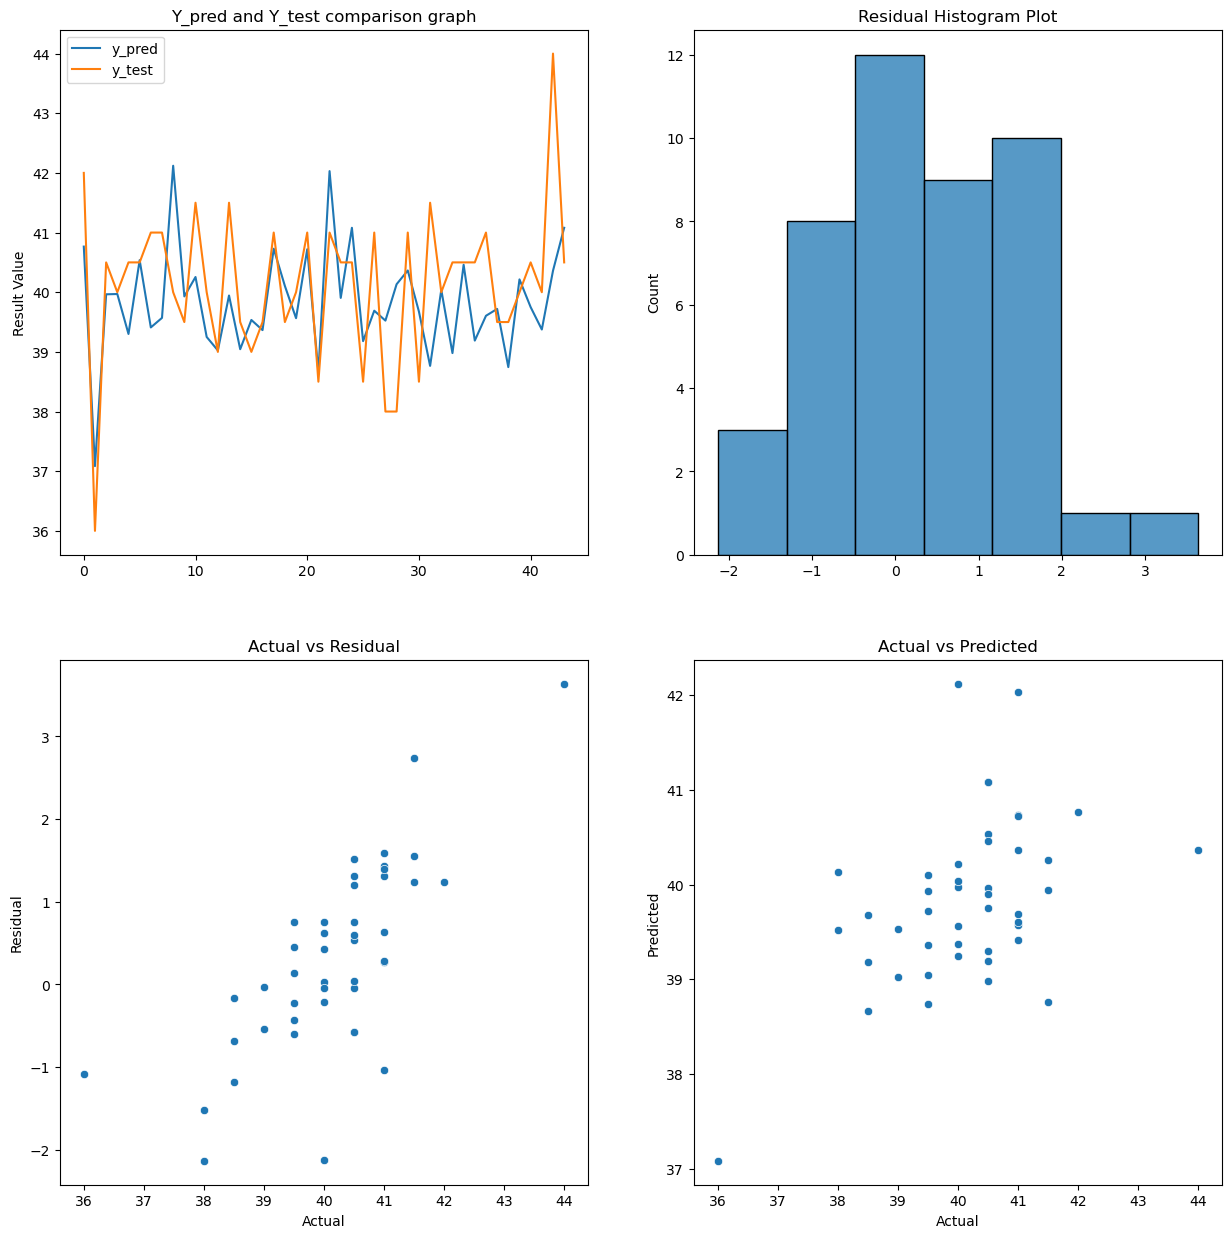

In [1358]:
plot_graph(y_test, y_pred)

BAGGING REGRESSOR

In [1360]:
#creating a bagging regressor with decision tree as base estimator
base_estimator = DecisionTreeRegressor()
bagging_model = BaggingRegressor(base_estimator, n_estimators = 10, random_state = 0)

#fit the model to the training data
bagging_model.fit(X_train, y_train)

#make predictions
y_pred = bagging_model.predict(X_test)

#

In [1361]:
get_model_evaluation(bagging_model, y_test, y_pred)

Mean Squared Error = 1.518
Mean Absolute Error = 0.966
Root Mean Squared Error = 1.232
R2_Score Value = 0.396


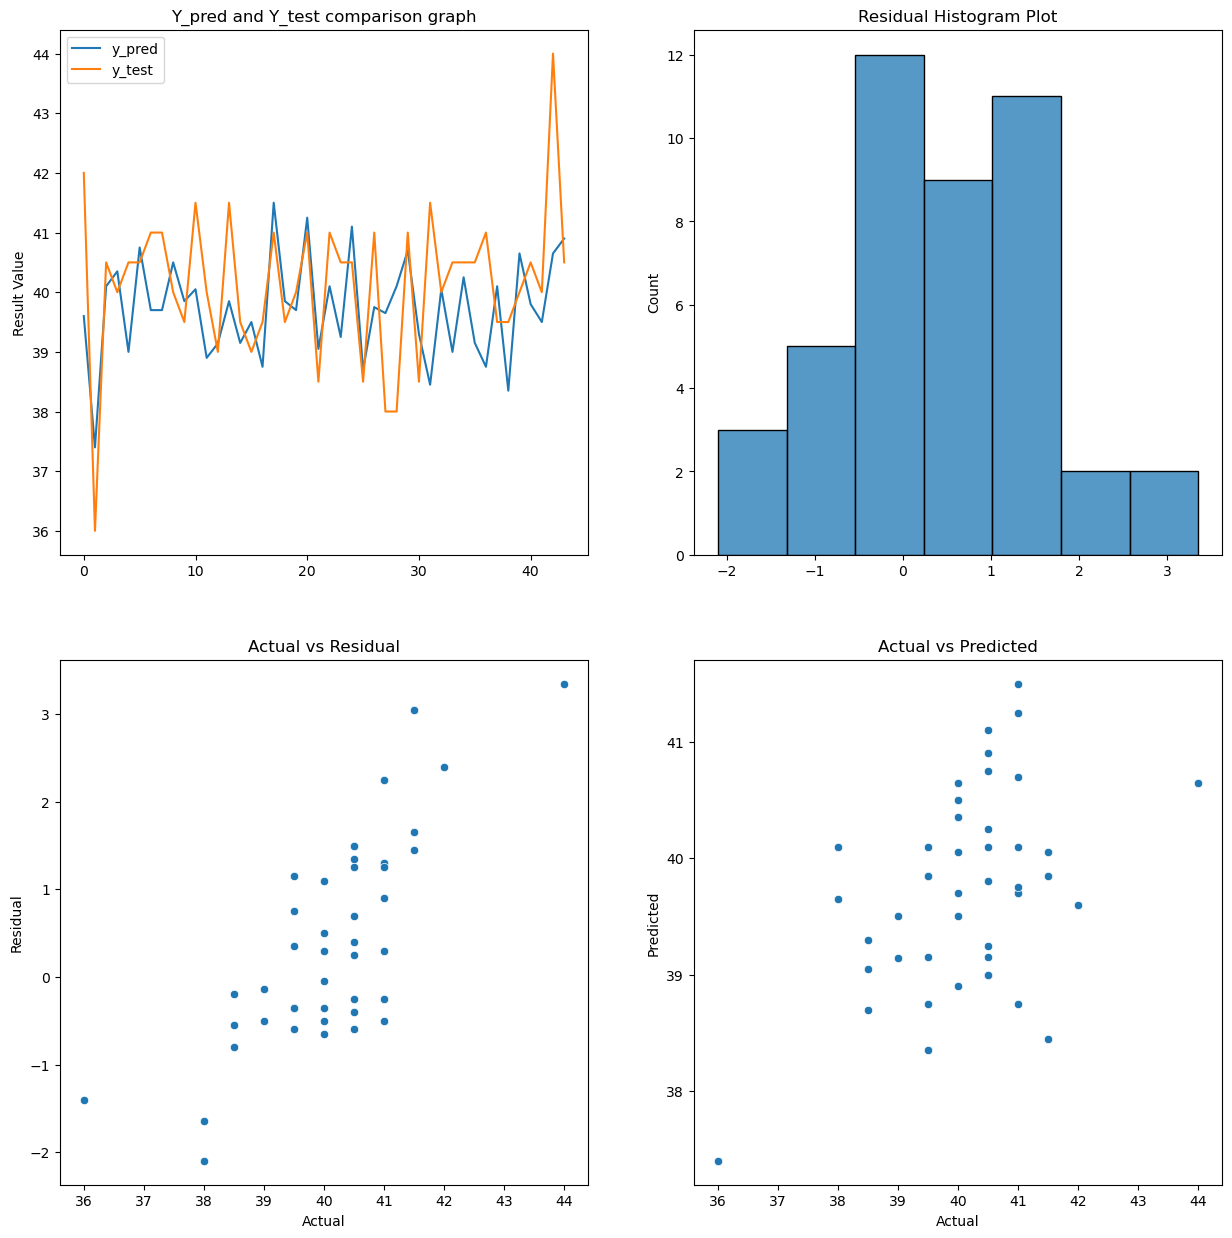

In [1363]:
plot_graph(y_test, y_pred)

Using Gradient boosting Regressor

In [1364]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
y_pred

array([39.99003944, 37.63383645, 39.60520177, 39.76689072, 39.09862404,
       41.0919697 , 39.74420162, 39.27896118, 40.84334193, 40.13446655,
       40.23492624, 39.54282574, 39.22629909, 39.74946819, 38.78972558,
       39.22914501, 39.20028913, 41.17644146, 39.89371149, 39.53986614,
       40.79275826, 37.90564195, 44.32438551, 39.61499554, 41.16470175,
       38.95628876, 39.7800234 , 38.89375553, 39.78882535, 39.66528228,
       39.29060527, 38.71758923, 40.02932356, 39.27681167, 40.2808531 ,
       39.15707063, 39.99637661, 39.68801455, 39.17115255, 39.78384857,
       39.90354478, 39.37620377, 41.04338195, 42.32040224])

In [1365]:
get_model_evaluation(gbr, y_test, y_pred)

Mean Squared Error = 1.531
Mean Absolute Error = 0.97
Root Mean Squared Error = 1.237
R2_Score Value = 0.396


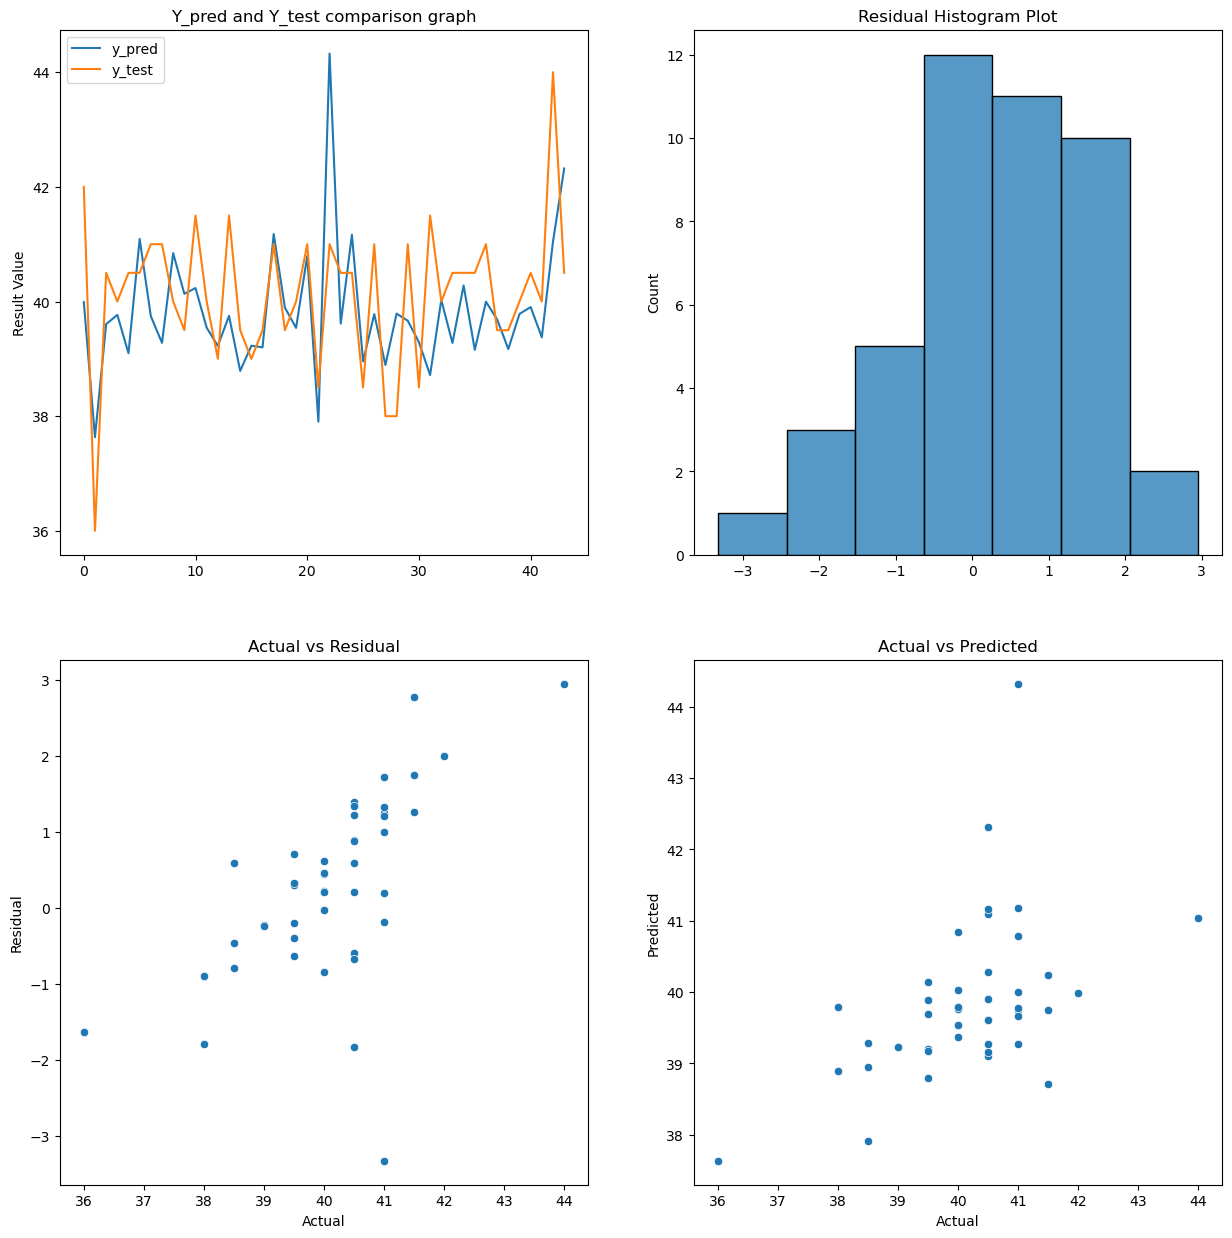

In [1367]:
plot_graph(y_test, y_pred)

pipeline

In [1368]:
pipeline = Pipeline([
    ('scaler',MinMaxScaler()),
    ('model', BaggingRegressor())
    
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', BaggingRegressor())])

In [1369]:
y_pred = pipeline.predict(X_test)
y_pred

array([43.65      , 36.2       , 40.25      , 40.15      , 39.35      ,
       39.65      , 39.05      , 38.8       , 43.85      , 39.95      ,
       40.15      , 38.9       , 38.85890931, 39.75      , 39.3       ,
       39.25      , 38.9       , 40.85      , 40.6       , 39.75      ,
       40.95      , 38.95      , 44.        , 39.45      , 41.15      ,
       39.        , 39.9       , 39.1125    , 40.35      , 40.3       ,
       39.4       , 38.9       , 39.7       , 39.2       , 40.75      ,
       39.090625  , 39.1       , 39.9       , 41.85      , 40.45      ,
       39.7       , 39.55      , 40.5       , 40.85      ])

In [1370]:
pipeline.score(X_test, y_test)

-0.27304875620085256

In [1371]:
get_model_evaluation(pipeline, y_test, y_pred)

Mean Squared Error = 2.045
Mean Absolute Error = 1.08
Root Mean Squared Error = 1.43
R2_Score Value = 0.396


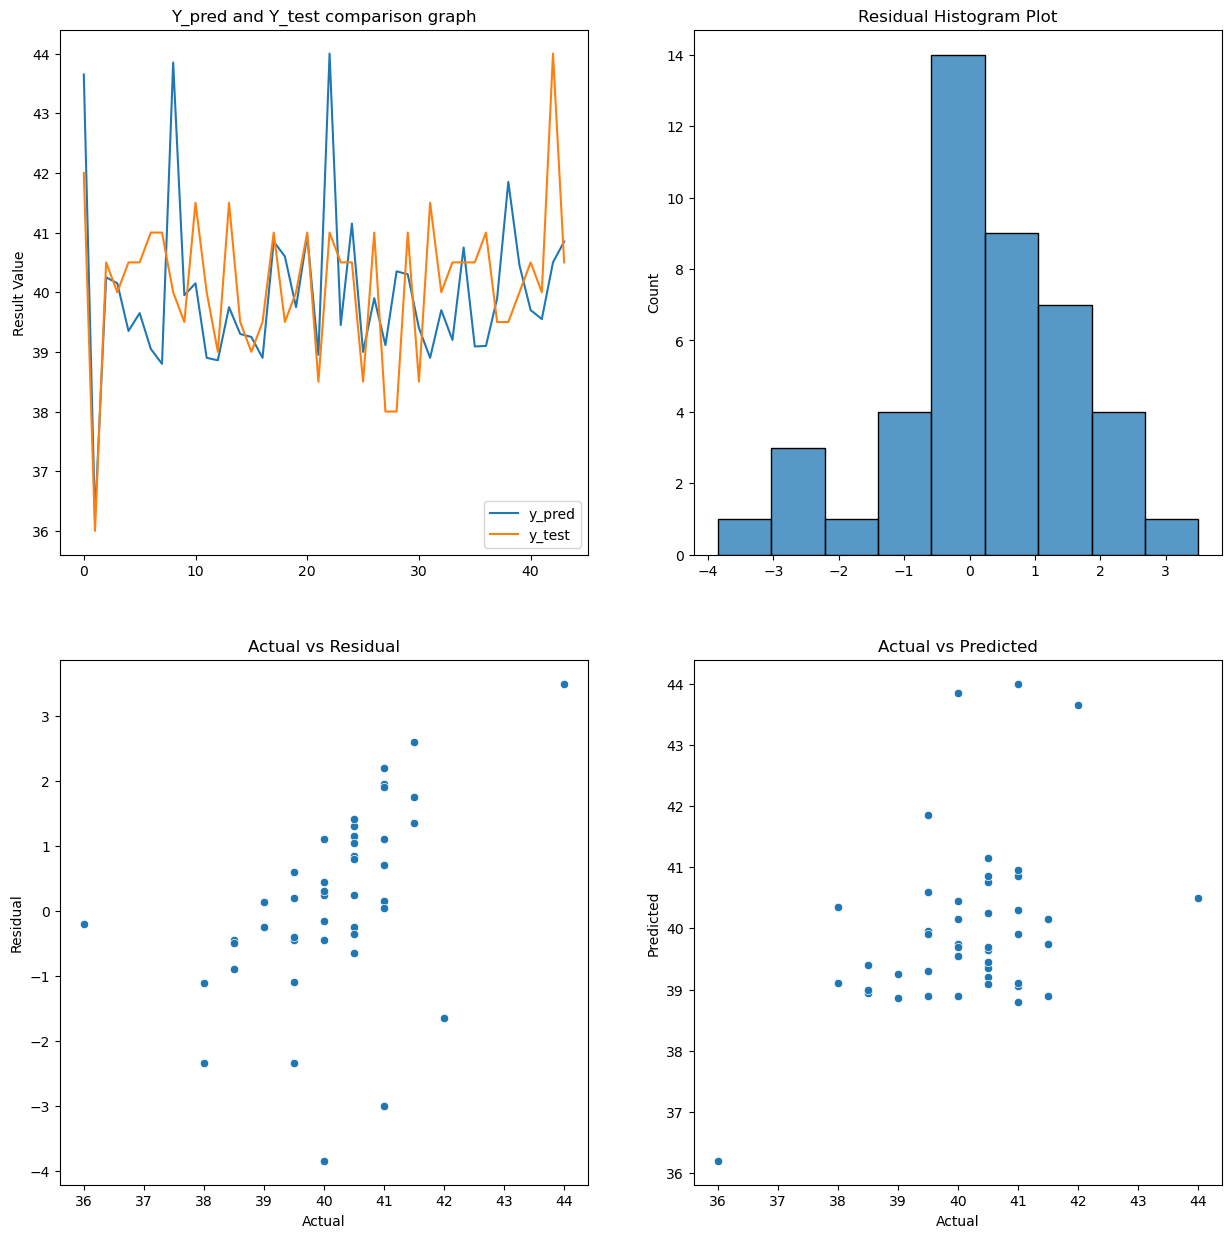

In [1372]:
plot_graph(y_test, y_pred)

varience inflation 

In [1072]:
def get_vif(df):
    d={}
    for i in range(df.shape[1]):
        d[df.columns[i]]=variance_inflation_factor(df.values,i)
    return d 
get_vif(data_w_o_outlier)

{'TOTAL CRUDE FLOW': 1306.9898126332141,
 'TOTAL ATF KERO/DHDS FLOW': 1677.9727093626905,
 'APS Overhead Pressure': 1070.4827558448112,
 'FBS D/O TEMP': 52682.25304851877,
 'CRUDE API AT 15 DEGC': 2937.7035472226494,
 'ATF- TOP SECTION PDT': 2341.667571727322,
 '11-T-1 REFLUX FLOW': 758.7164027486077,
 ' APS O/H TEMP': 12402.706137097422,
 'ATF STRIPPING STEAM': 426.26960698016126,
 'Nphtha Total flow': 669.9512495927027,
 'FBS TOTAL FLOW': 159.2643815737309,
 'TPA TO ATF STRIPPER FLOW': 871.3003140395006,
 'TPA DRAW OFF TEMP': 91392.63096551617,
 'ATF D/O TEMP': 1221577.499334614,
 'ATF Stripper bottom temperature': 1396657.3986283357,
 'Difference b/w ATF Draw temperature & ATF Stripper bottom temperature – ': 26755.36922524841,
 'Result Value': 478.973019516262}

In [1073]:
df3 = data_w_o_outlier.drop(columns = ['ATF Stripper bottom temperature'])
get_vif(df3)

{'TOTAL CRUDE FLOW': 1277.7510688240782,
 'TOTAL ATF KERO/DHDS FLOW': 1349.4849025899205,
 'APS Overhead Pressure': 961.7398194805003,
 'FBS D/O TEMP': 43642.95421756895,
 'CRUDE API AT 15 DEGC': 2917.7079545117895,
 'ATF- TOP SECTION PDT': 2340.4944866450255,
 '11-T-1 REFLUX FLOW': 757.8869656154544,
 ' APS O/H TEMP': 11268.513580849552,
 'ATF STRIPPING STEAM': 422.5770655586322,
 'Nphtha Total flow': 652.3544714285305,
 'FBS TOTAL FLOW': 158.36278269939828,
 'TPA TO ATF STRIPPER FLOW': 28.199079141650028,
 'TPA DRAW OFF TEMP': 43313.75027972082,
 'ATF D/O TEMP': 77871.99279414142,
 'Difference b/w ATF Draw temperature & ATF Stripper bottom temperature – ': 1292.9058209512953,
 'Result Value': 478.8432133516939}

In [1074]:
X = df3.drop(columns = "Result Value")
y = df3["Result Value"]

In [1075]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.10,random_state = 0)

fitting pipeline after removing column with high VIF

In [1076]:
pipeline = Pipeline([
    ('scaler',MinMaxScaler()),
    ('pca', PCA(n_components = 2)),
    ('model', DecisionTreeRegressor())
    
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca', PCA(n_components=2)),
                ('model', DecisionTreeRegressor())])

In [1077]:
y_pred = pipeline.predict(X_test)
y_pred

array([39.  , 38.5 , 40.  , 40.5 , 39.5 , 41.  , 40.  , 39.5 , 38.  ,
       40.5 , 39.  , 40.  , 39.05, 40.5 , 39.5 , 39.5 , 39.5 , 39.  ,
       40.  , 40.  , 41.5 , 38.5 , 40.5 , 40.5 , 40.  , 41.  , 40.  ,
       38.  , 40.  , 39.  , 39.  , 39.5 , 40.  , 40.  , 38.5 , 39.5 ,
       38.5 , 38.5 , 41.5 , 38.5 , 39.5 , 40.  , 38.5 , 40.5 ])

In [1078]:
get_model_evaluation(pipeline, y_test, y_pred)

Mean Squared Error = 2.438
Mean Absolute Error = 1.103
Root Mean Squared Error = 1.561
R2_Score Value = 0.396


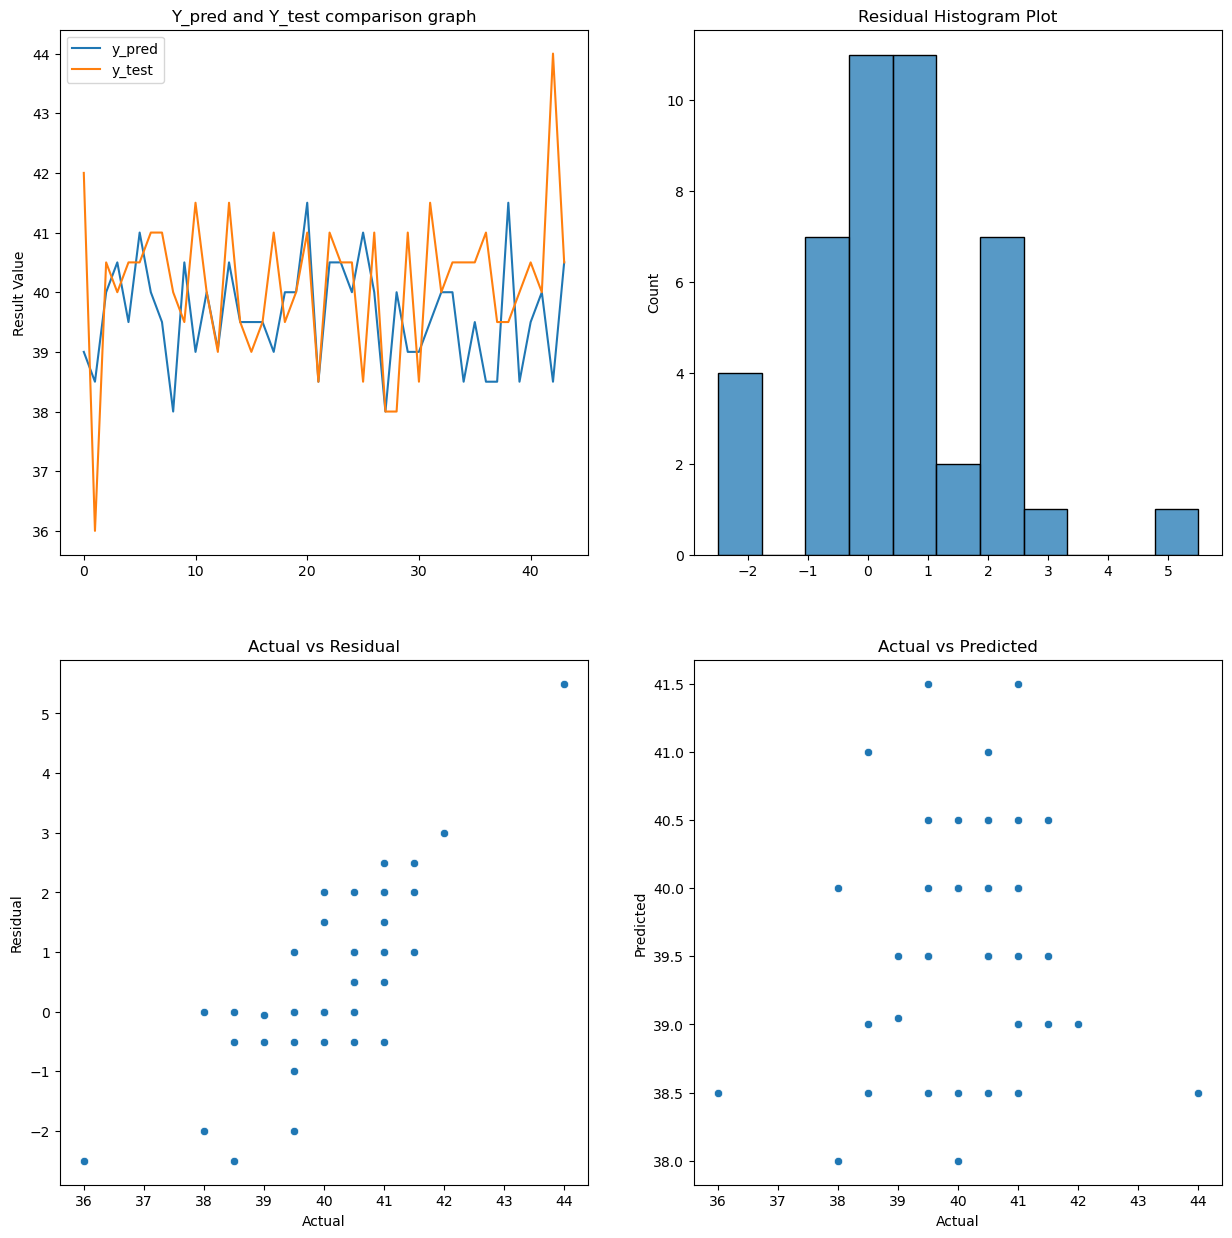

In [1079]:
plot_graph(y_test, y_pred)

In [1398]:
#knn 

In [1399]:
#try merging 2 3 columns and see the results